# Install

In [1]:
!pip install biodivine_aeon==1.3.0a3
!pip install SPARQLWrapper networkx matplotlib
!apt-get install graphviz graphviz-dev -y
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


# Import

In [2]:
from biodivine_aeon import *
import requests

In [3]:
from EnrichmentClasses import (EnrichmentPSBN)

In [4]:
from Visualization import (
    get_quickgo_terms_batch,
    set_nodes_for_graph,
    make_graph,
    visualize_subgraphs,
    get_roots_and_leafs,
    sort_roots_and_leafs,
    visualize_subgraphs_on_whole_net,
    print_roots_and_leafs_on_whole_net,
    visualize_subgraphs_on_each_instance,
    print_roots_and_leafs_per_instance,
)

In [5]:
from Pipeline import pipeline

In [6]:
from CheckFixedPoints import print_fixed_points_on_new_stg

# Data + reference genome

In [7]:
network = BooleanNetwork.from_file("test_case.aeon")

In [8]:
human_id = "9606"

# Test case

In [9]:
psbn = EnrichmentPSBN([])
pipeline(psbn, network, human_id, "test_case")

Goterm intersection on instance: {'cellular response to cytokine stimulus', 'protein localization to membrane', 'gland morphogenesis', 'regulation of response to stress', 'MAPK cascade', 'positive regulation of miRNA metabolic process', 'regulation of vitamin metabolic process', 'cellular response to environmental stimulus', 'positive regulation of translational initiation by iron', 'response to gold nanoparticle', 'positive regulation of metabolic process', 'positive regulation of immune system process', 'response to chemical', 'positive regulation of vitamin D biosynthetic process', 'positive regulation of nucleobase-containing compound metabolic process', 'regulation of amide metabolic process', 'positive regulation of signaling', 'intracellular signal transduction', 'response to Gram-negative bacterium', 'chronic inflammatory response to antigenic stimulus', 'intracellular signaling cassette', 'regulation of developmental process', 'regulation of macrophage derived foam cell differ

In [10]:
print(psbn.instances[0].attractors[0].unmapped_ids_set)
print(psbn.instances[1].attractors[0].unmapped_ids_set)
print(psbn.instances[0].attractors[0].mapped_ids)
print(psbn.instances[1].attractors[0].mapped_ids)

{'Apoptosis'}
{'Infliximab_drug', 'Survival'}
IKBKB,CASP8,TNF,NFKB1,TNFRSF1A
NFKBIA


## Terms frequencies

In [11]:
print(f"In total number of attractors: {psbn.count_attractors()} frequencies are: {psbn.count_goterms_frequencies_on_all_instances()}")

In total number of attractors: 2 frequencies are: {+response to tumor necrosis factor: 1, +canonical NF-kappaB signal transduction: 1, +tumor necrosis factor-mediated signaling pathway: 1, +regulation of establishment of endothelial barrier: 1, +regulation of endothelial cell development: 1, +cellular response to tumor necrosis factor: 1, +inflammatory response: 1, +regulation of endothelial cell differentiation: 1, +response to mechanical stimulus: 1, +positive regulation of canonical NF-kappaB signal transduction: 1, +extrinsic apoptotic signaling pathway via death domain receptors: 1, +response to cytokine: 1, +regulation of defense response: 1, +response to peptide: 1, +regulation of canonical NF-kappaB signal transduction: 1, +cellular response to abiotic stimulus: 1, +cellular response to environmental stimulus: 1, +regulation of cytokine production involved in inflammatory response: 1, +regulation of tumor necrosis factor-mediated signaling pathway: 1, +negative regulation of bi

## Graphs

In [12]:
visualize_subgraphs_on_whole_net(psbn)

0: ColorModel({'Infliximab_drug': 'false'})


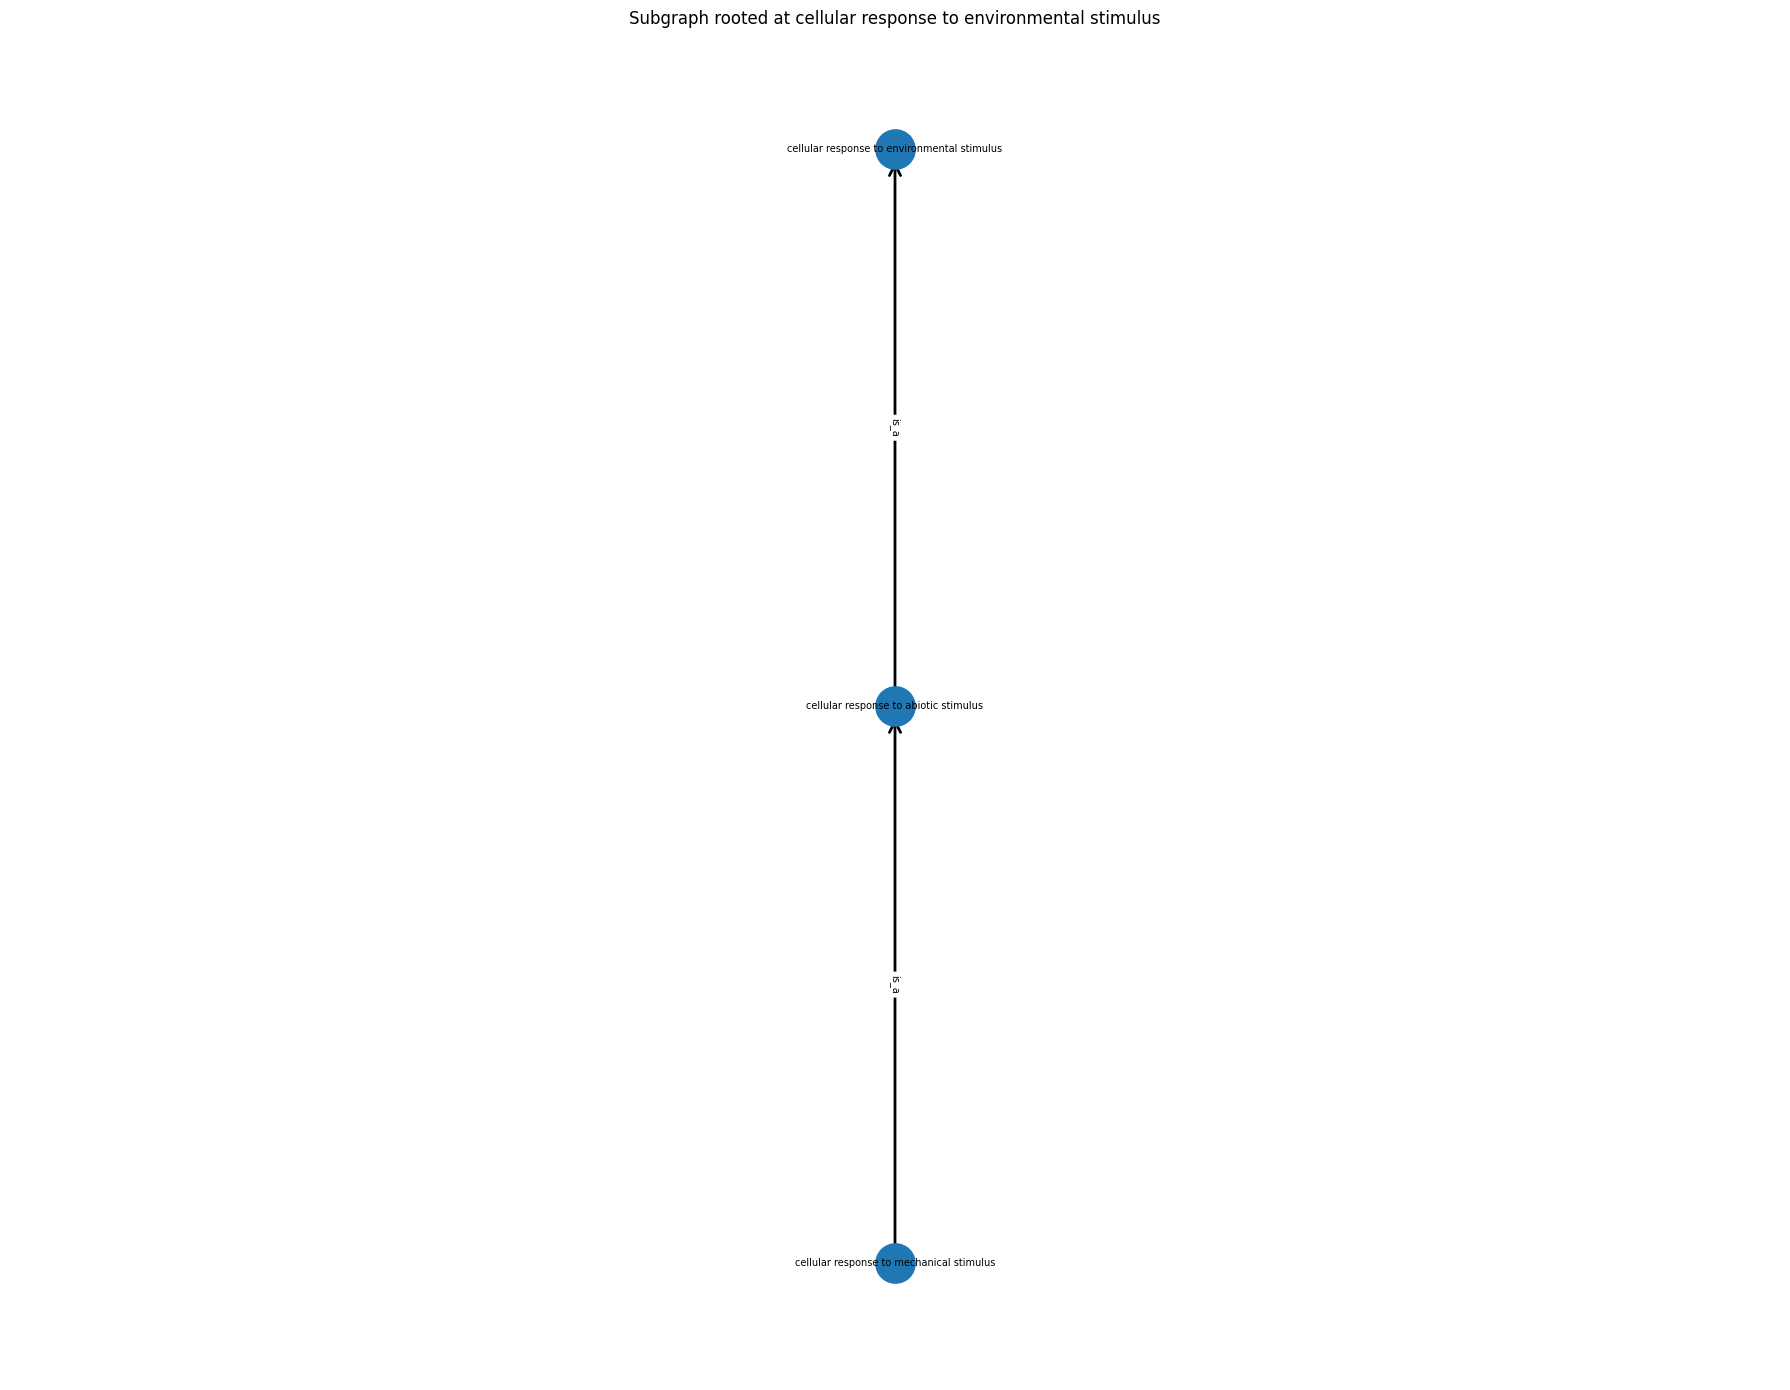

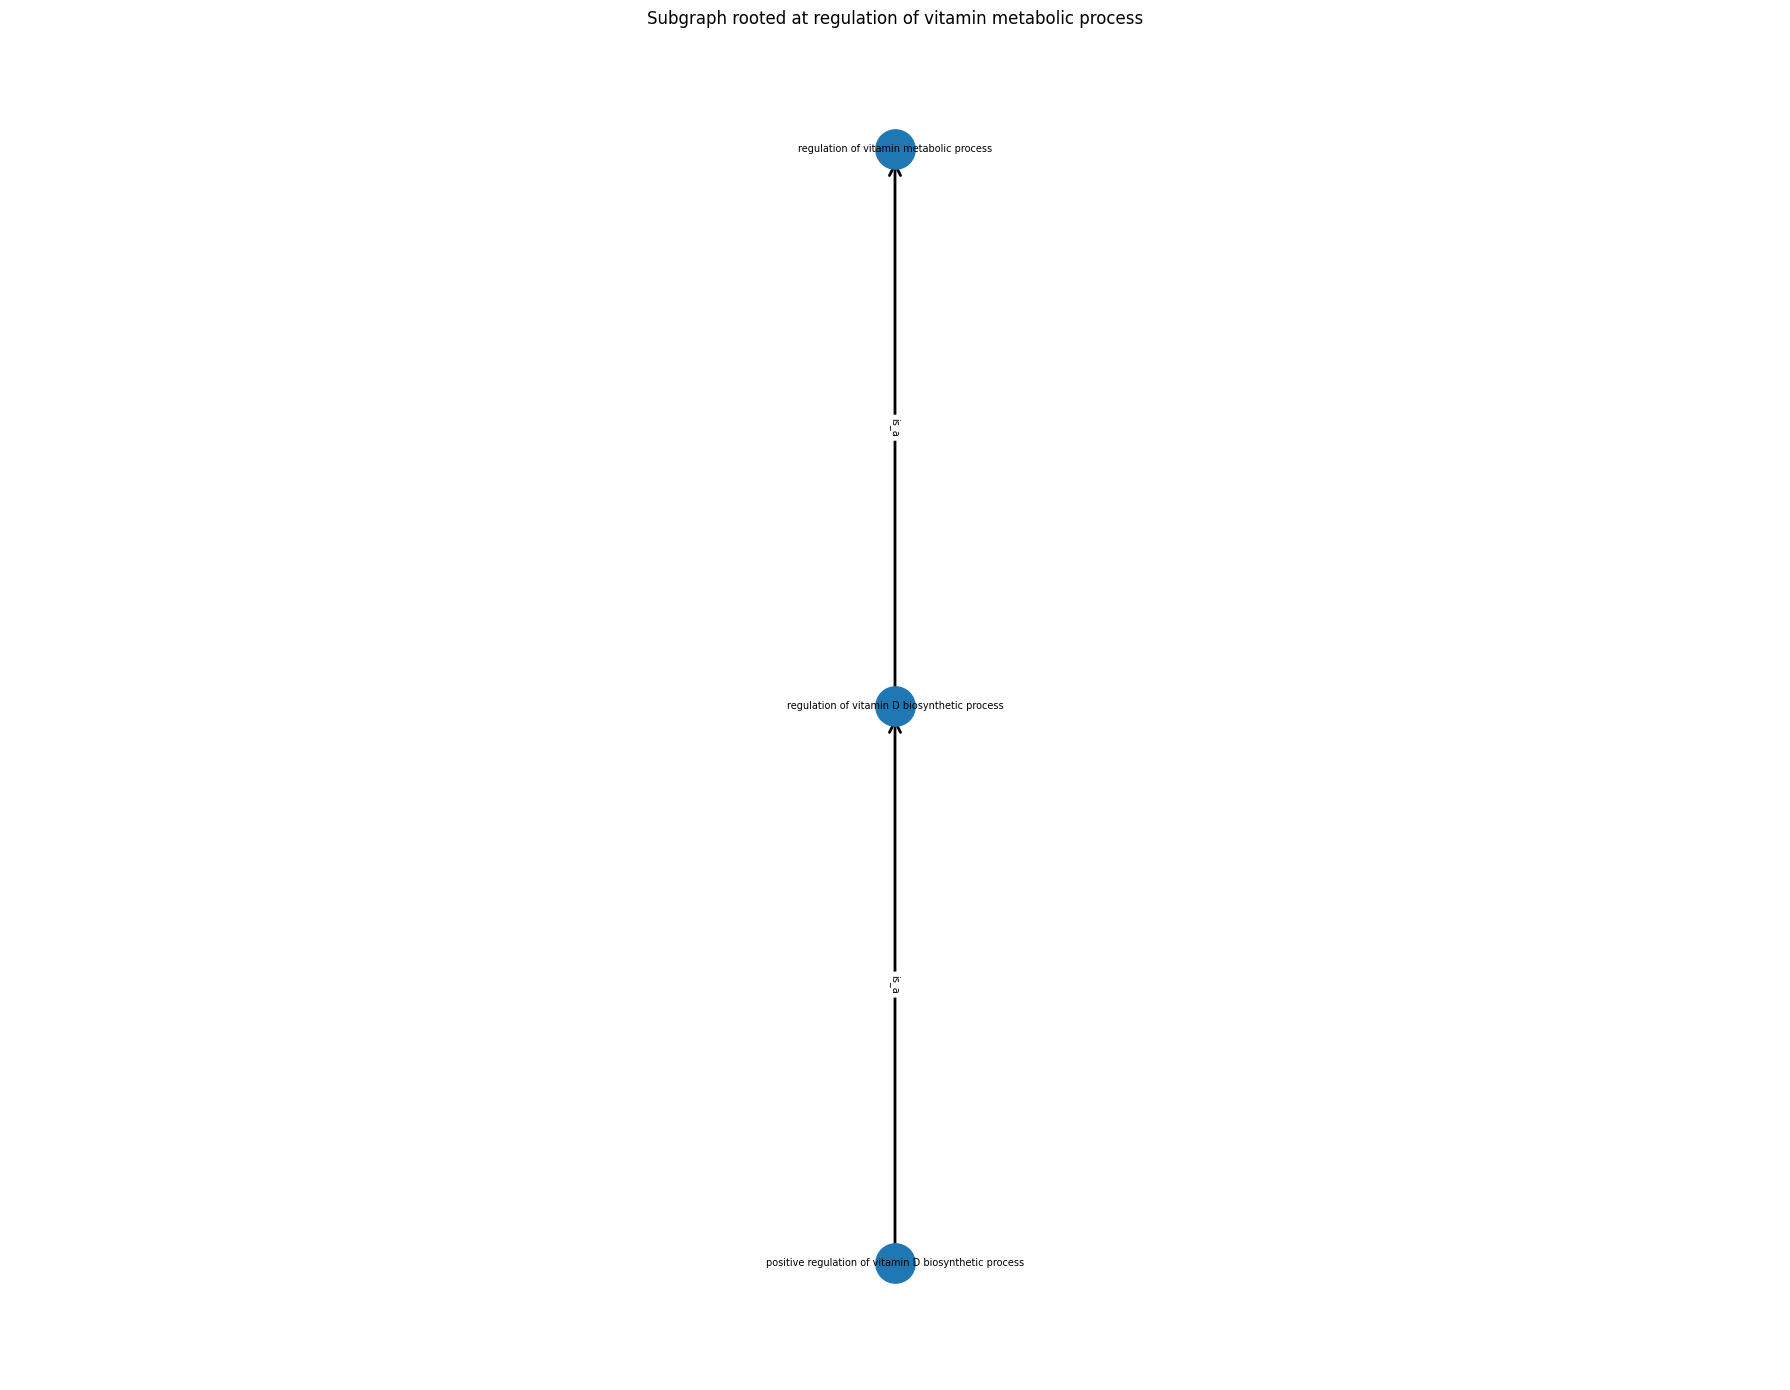

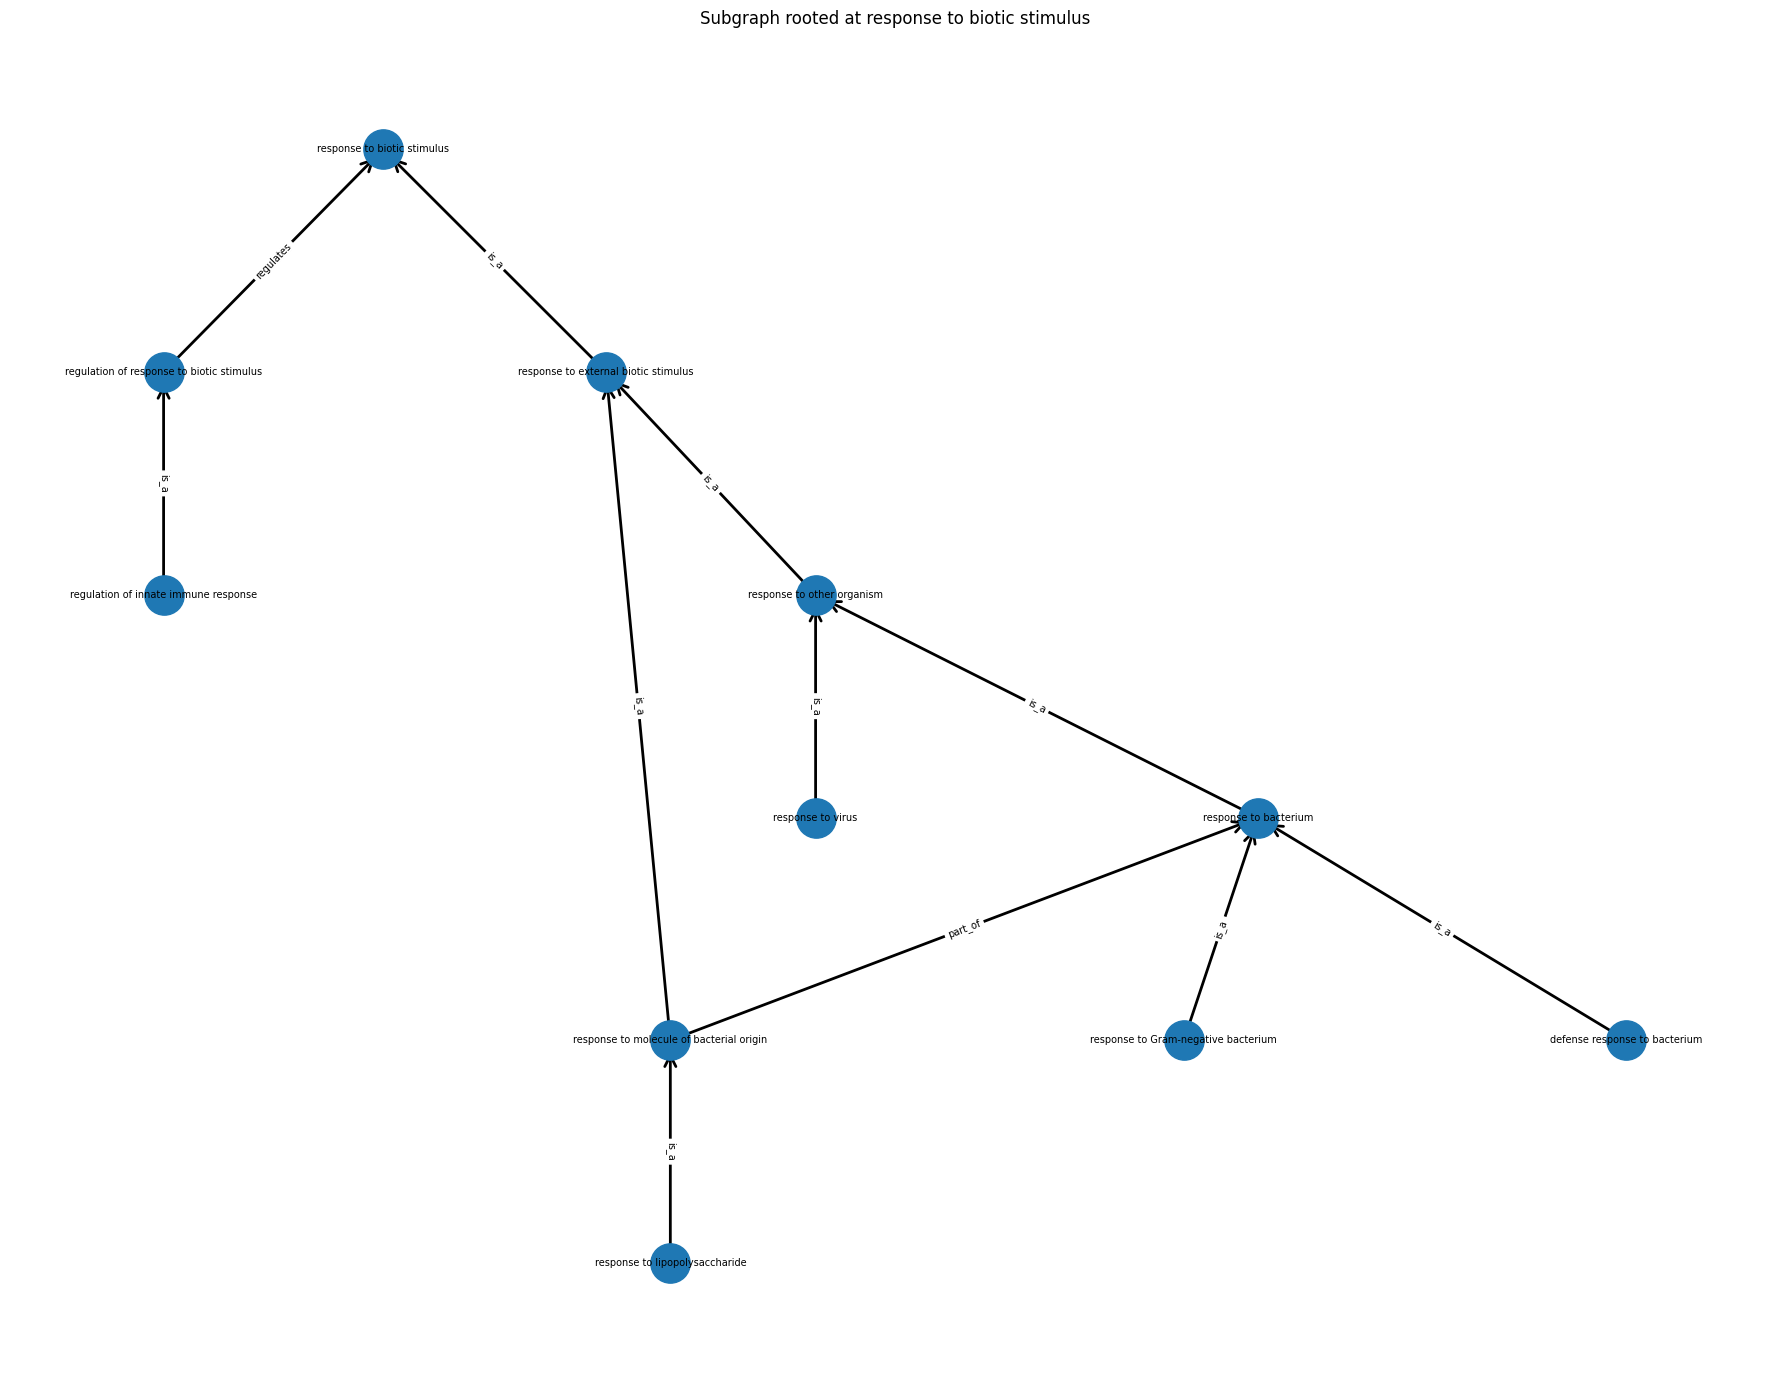

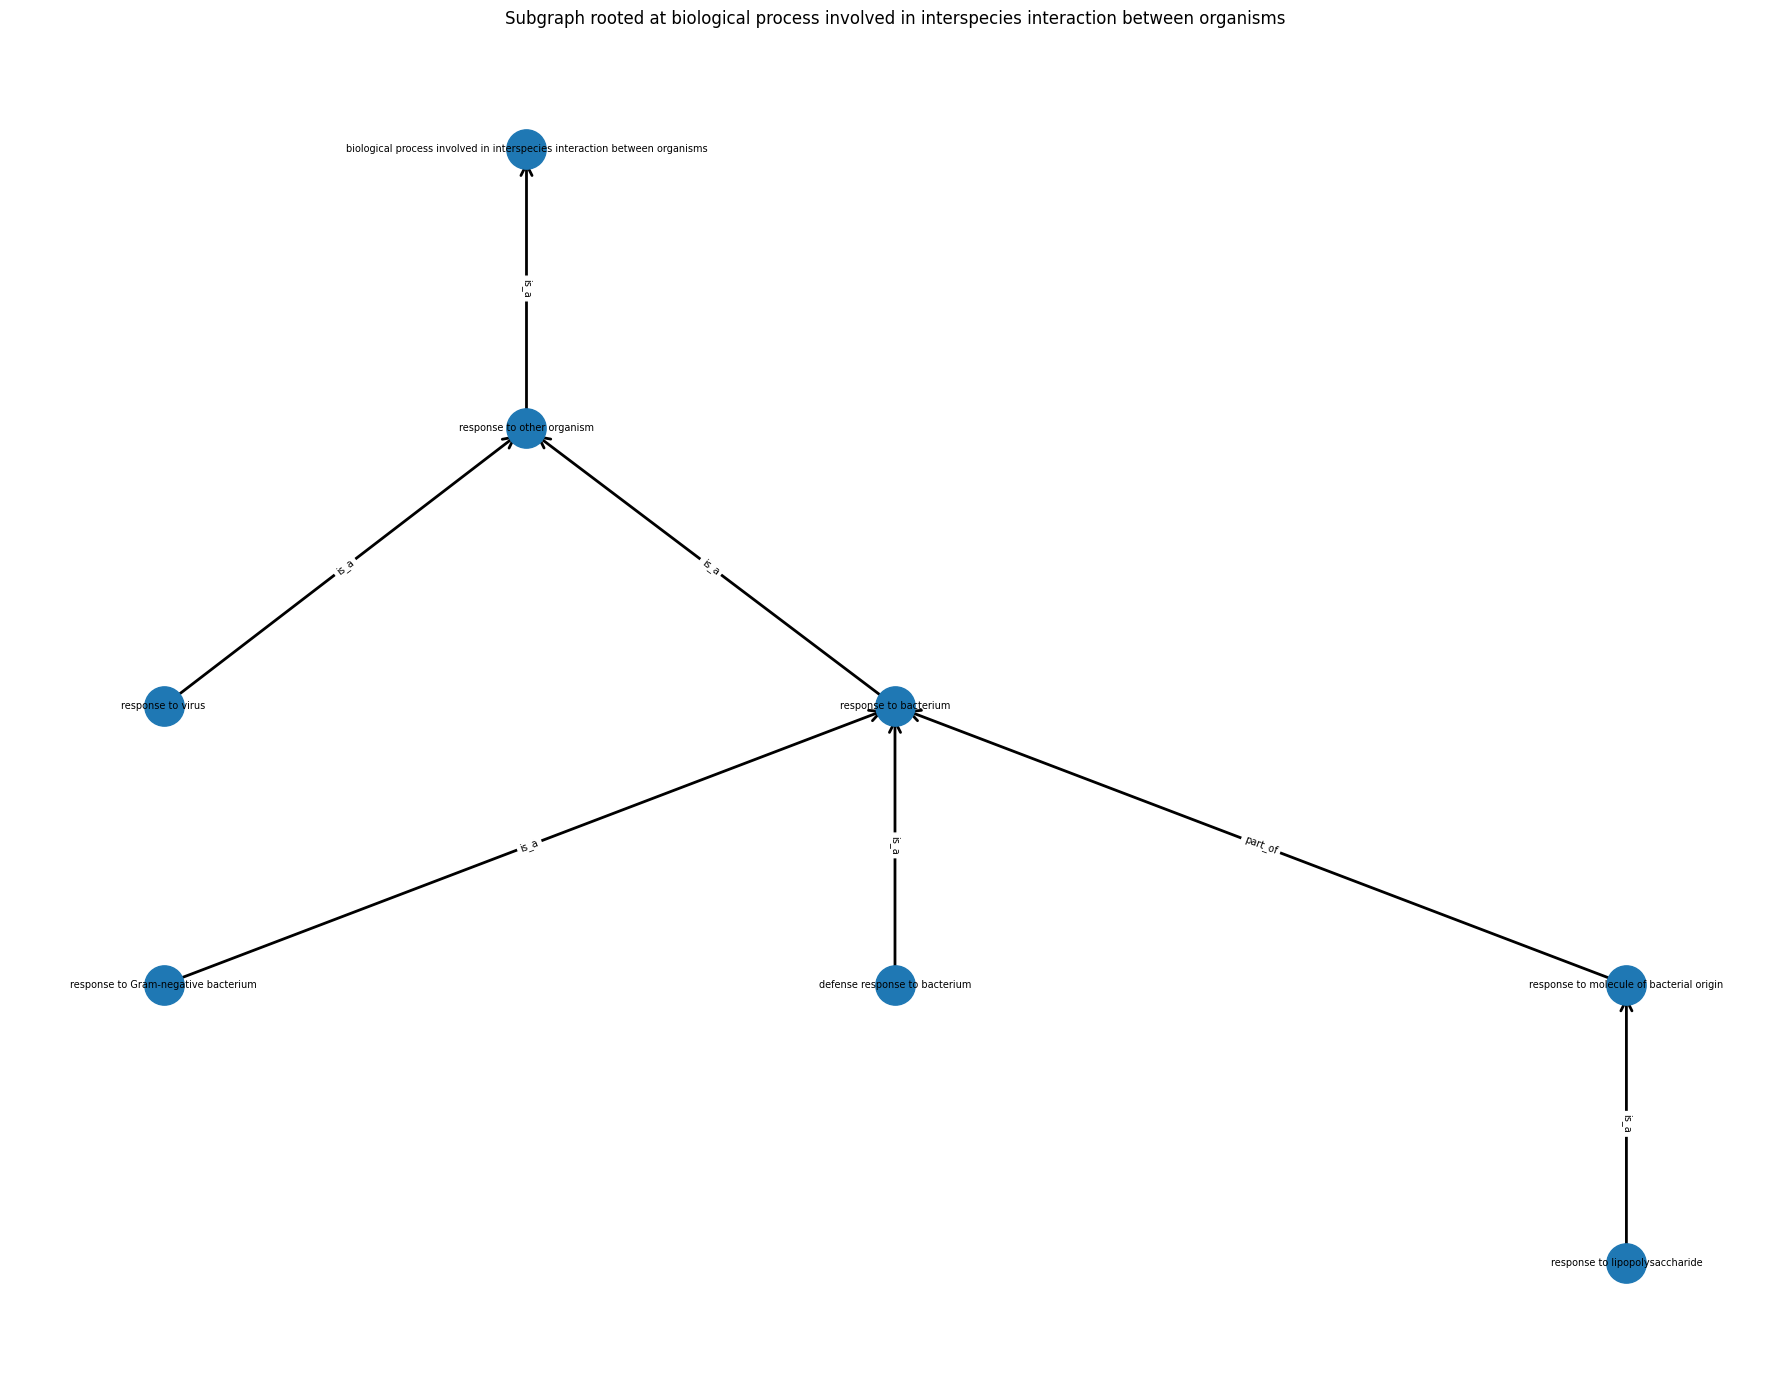

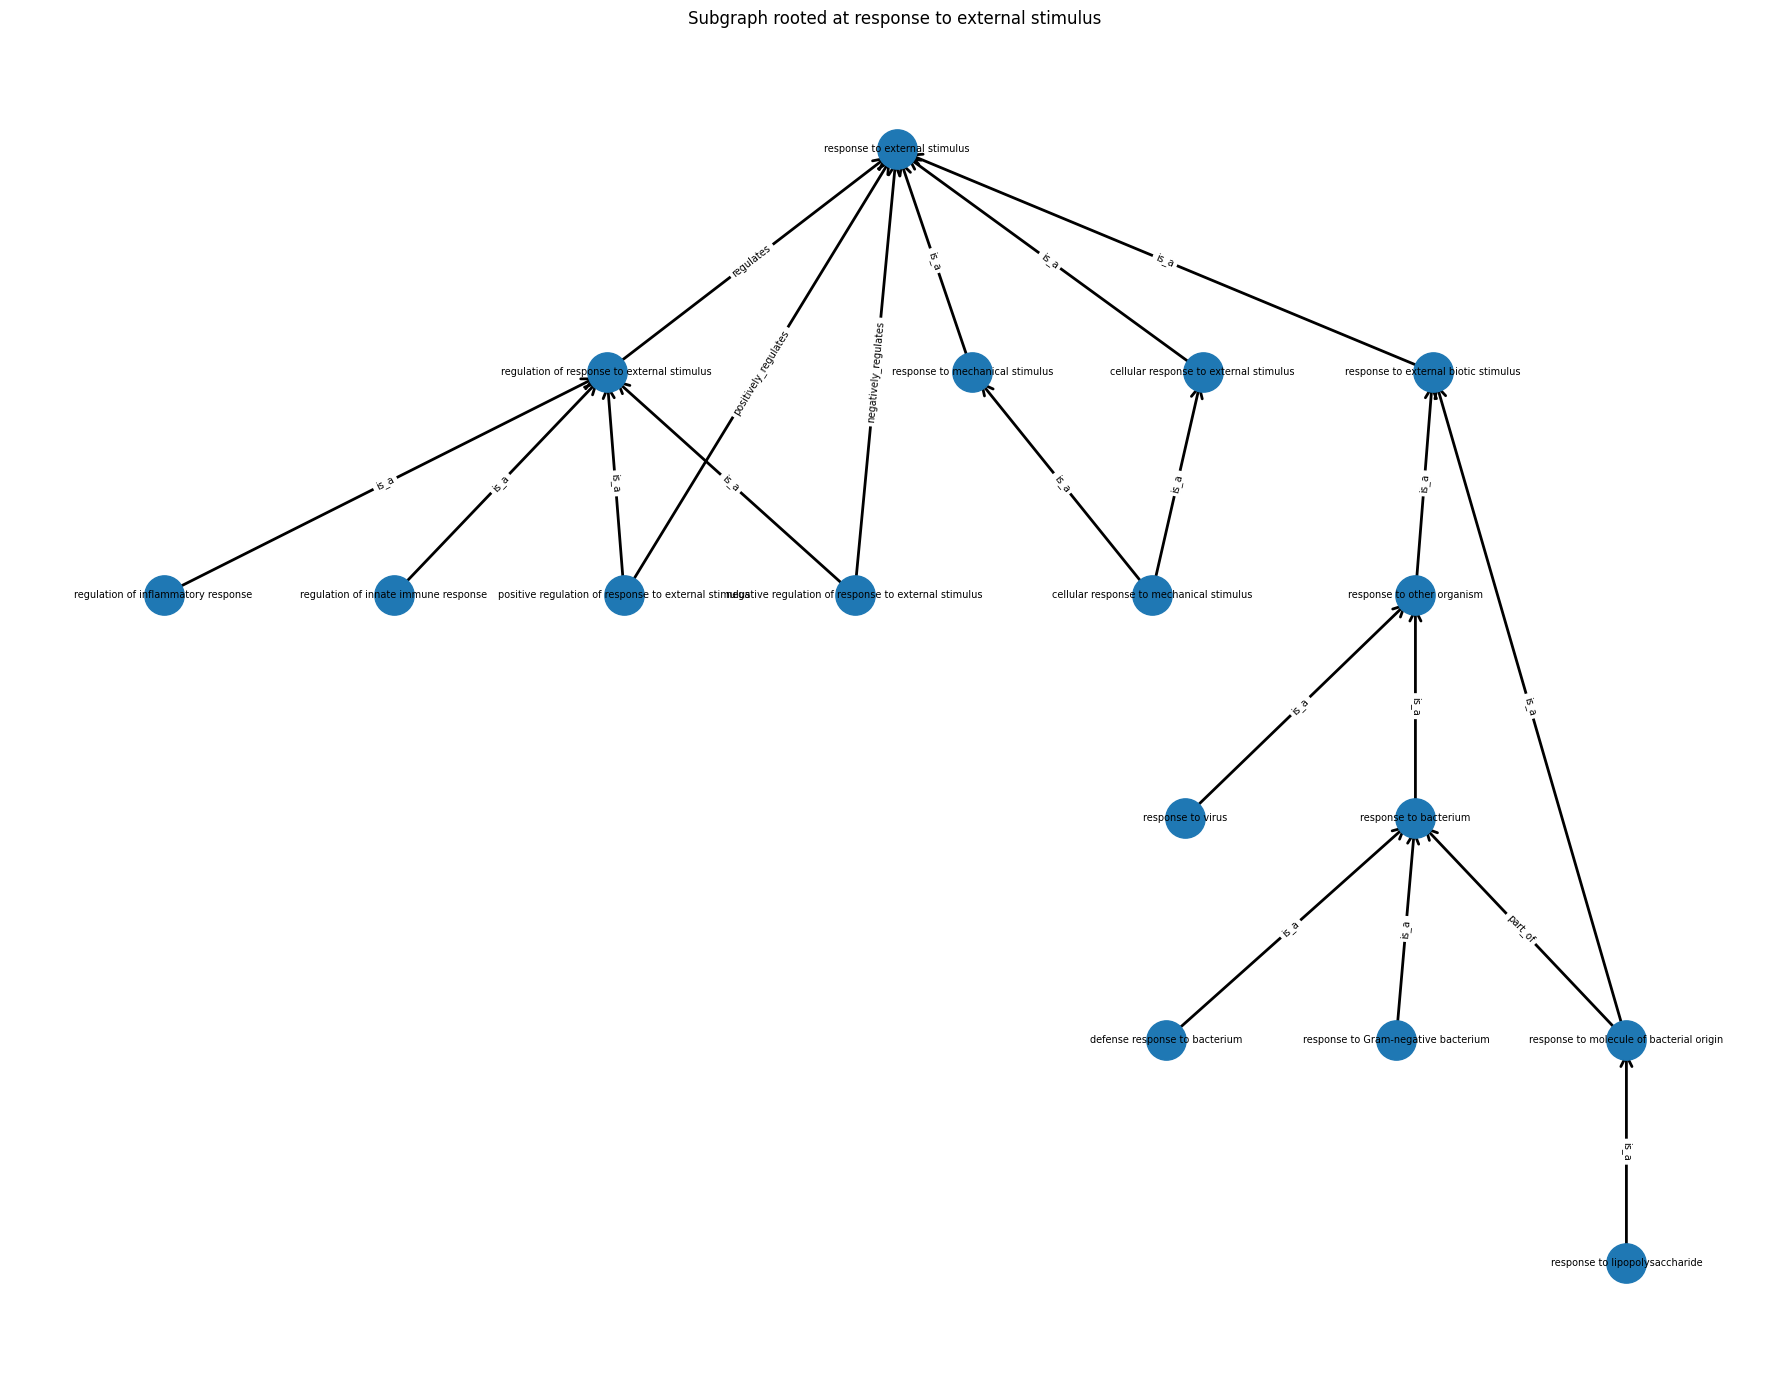

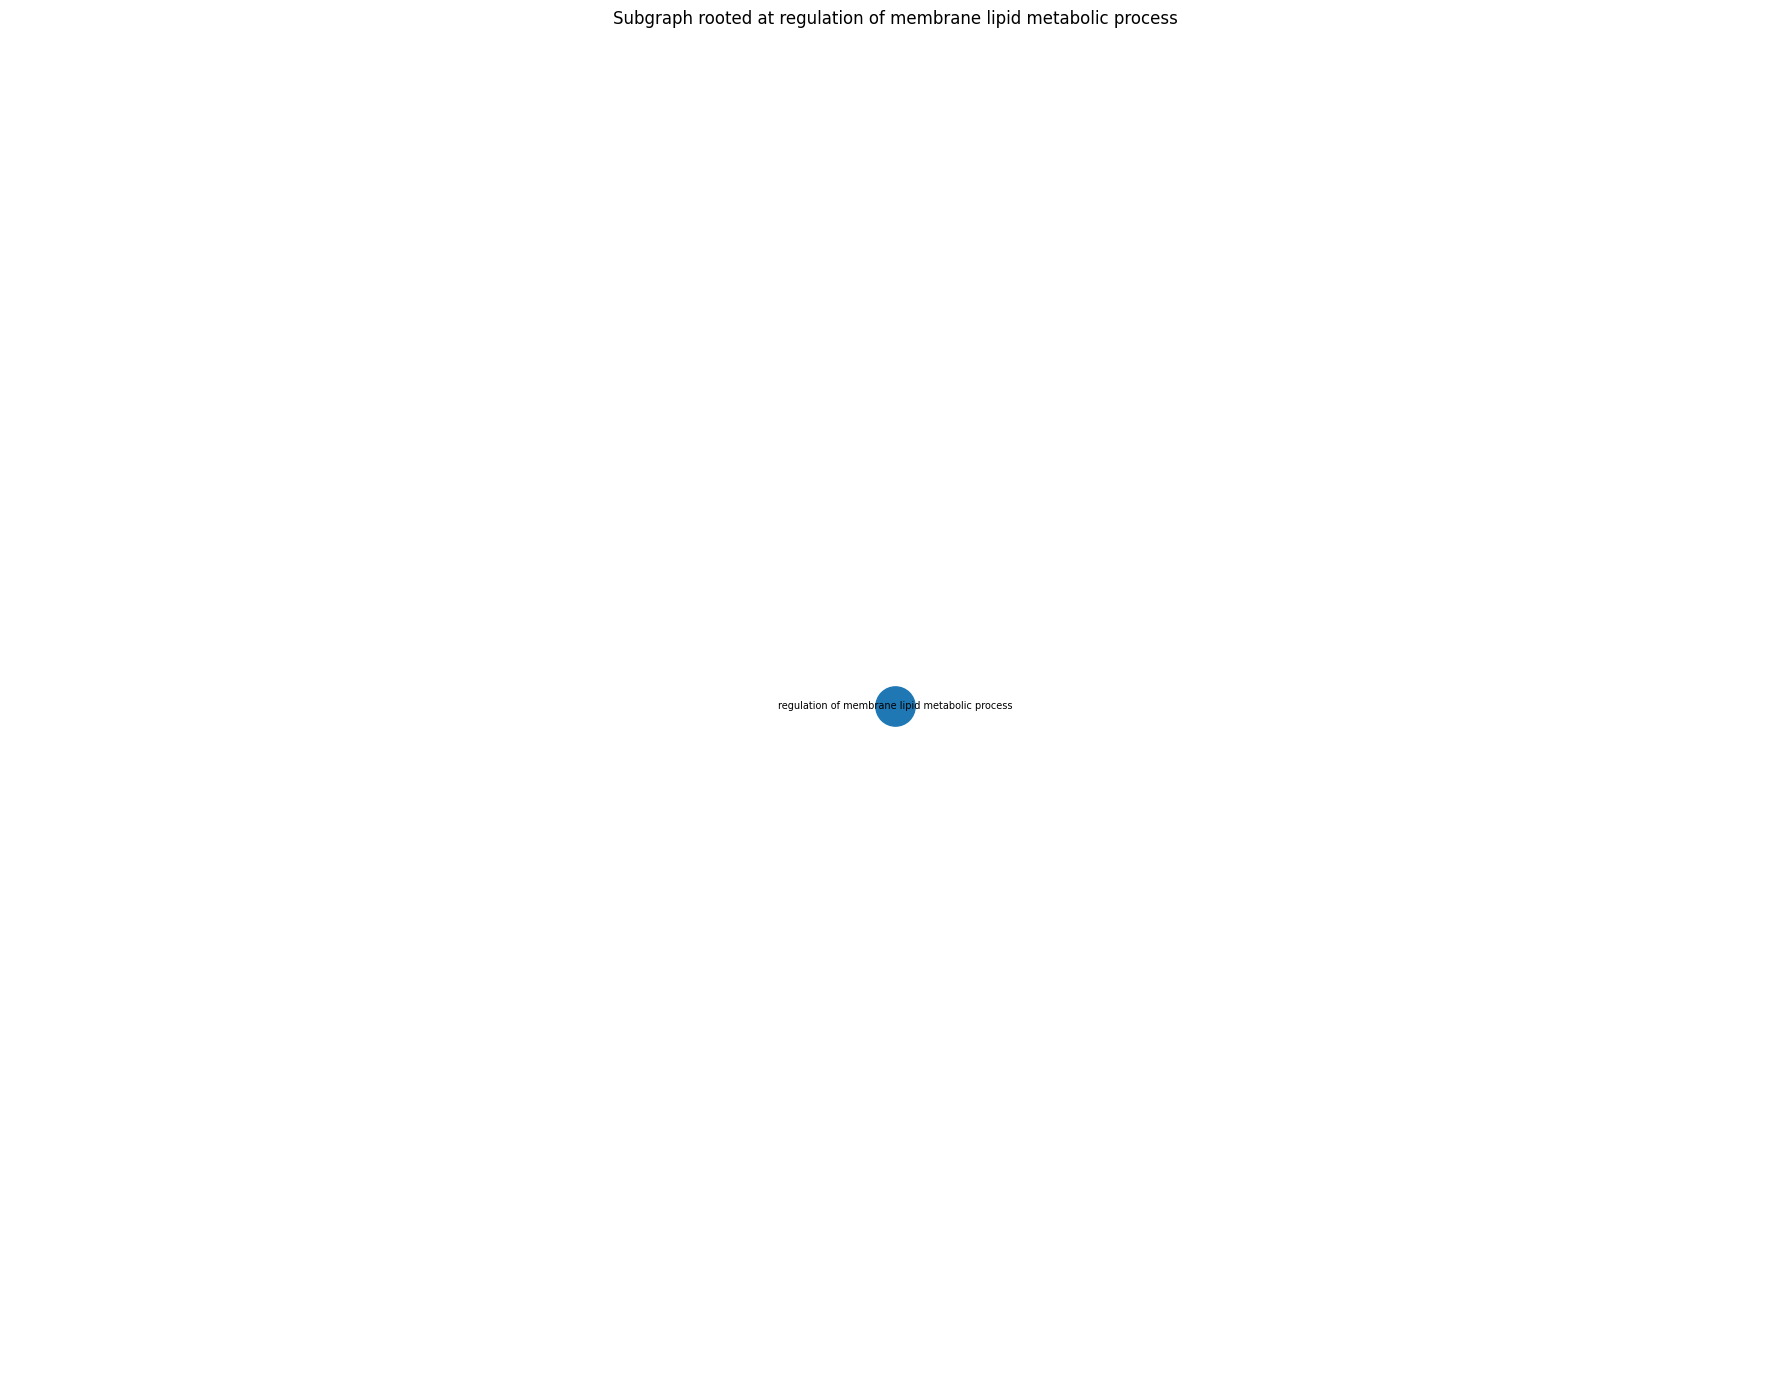

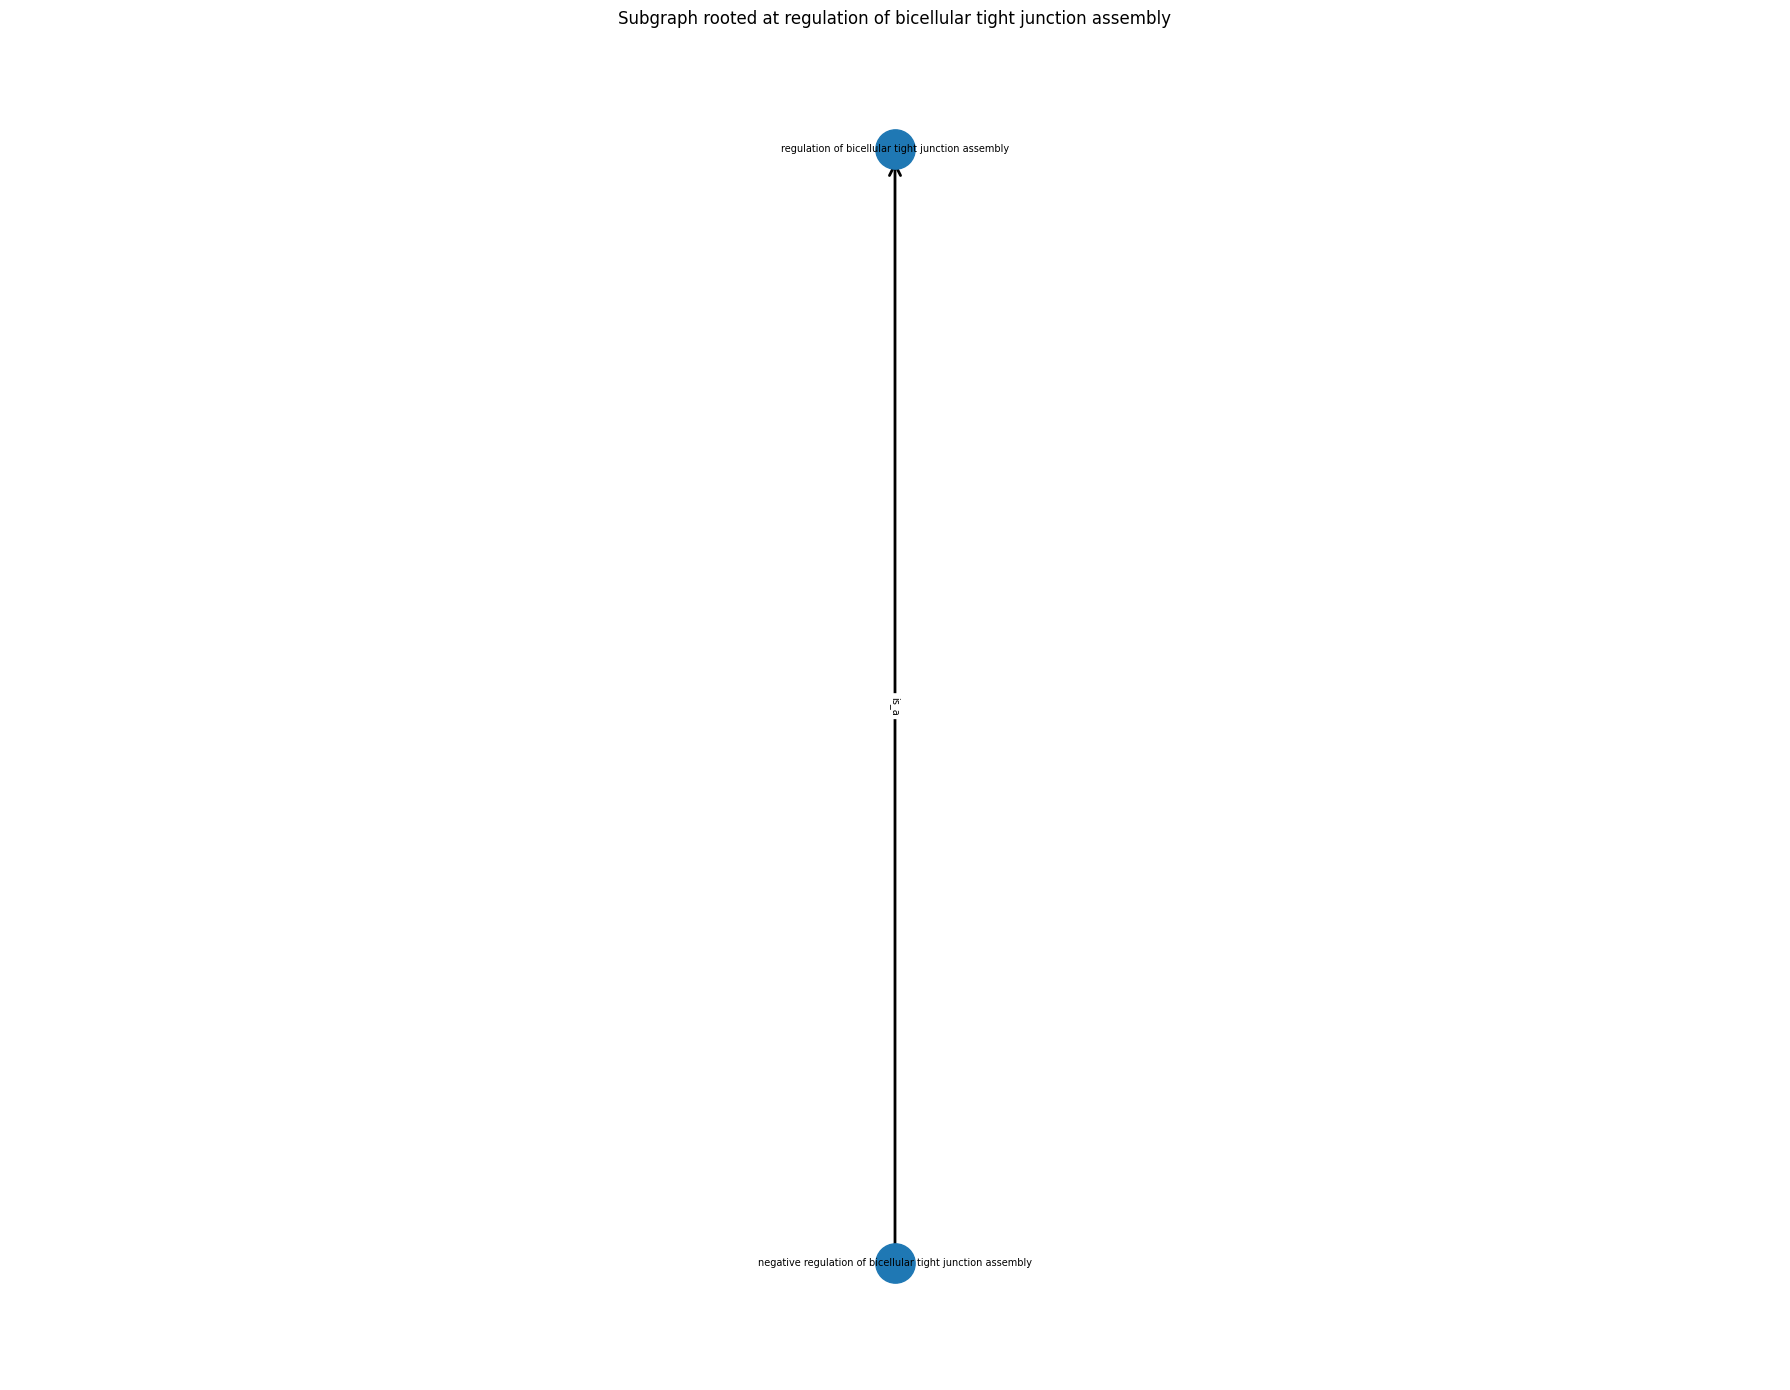

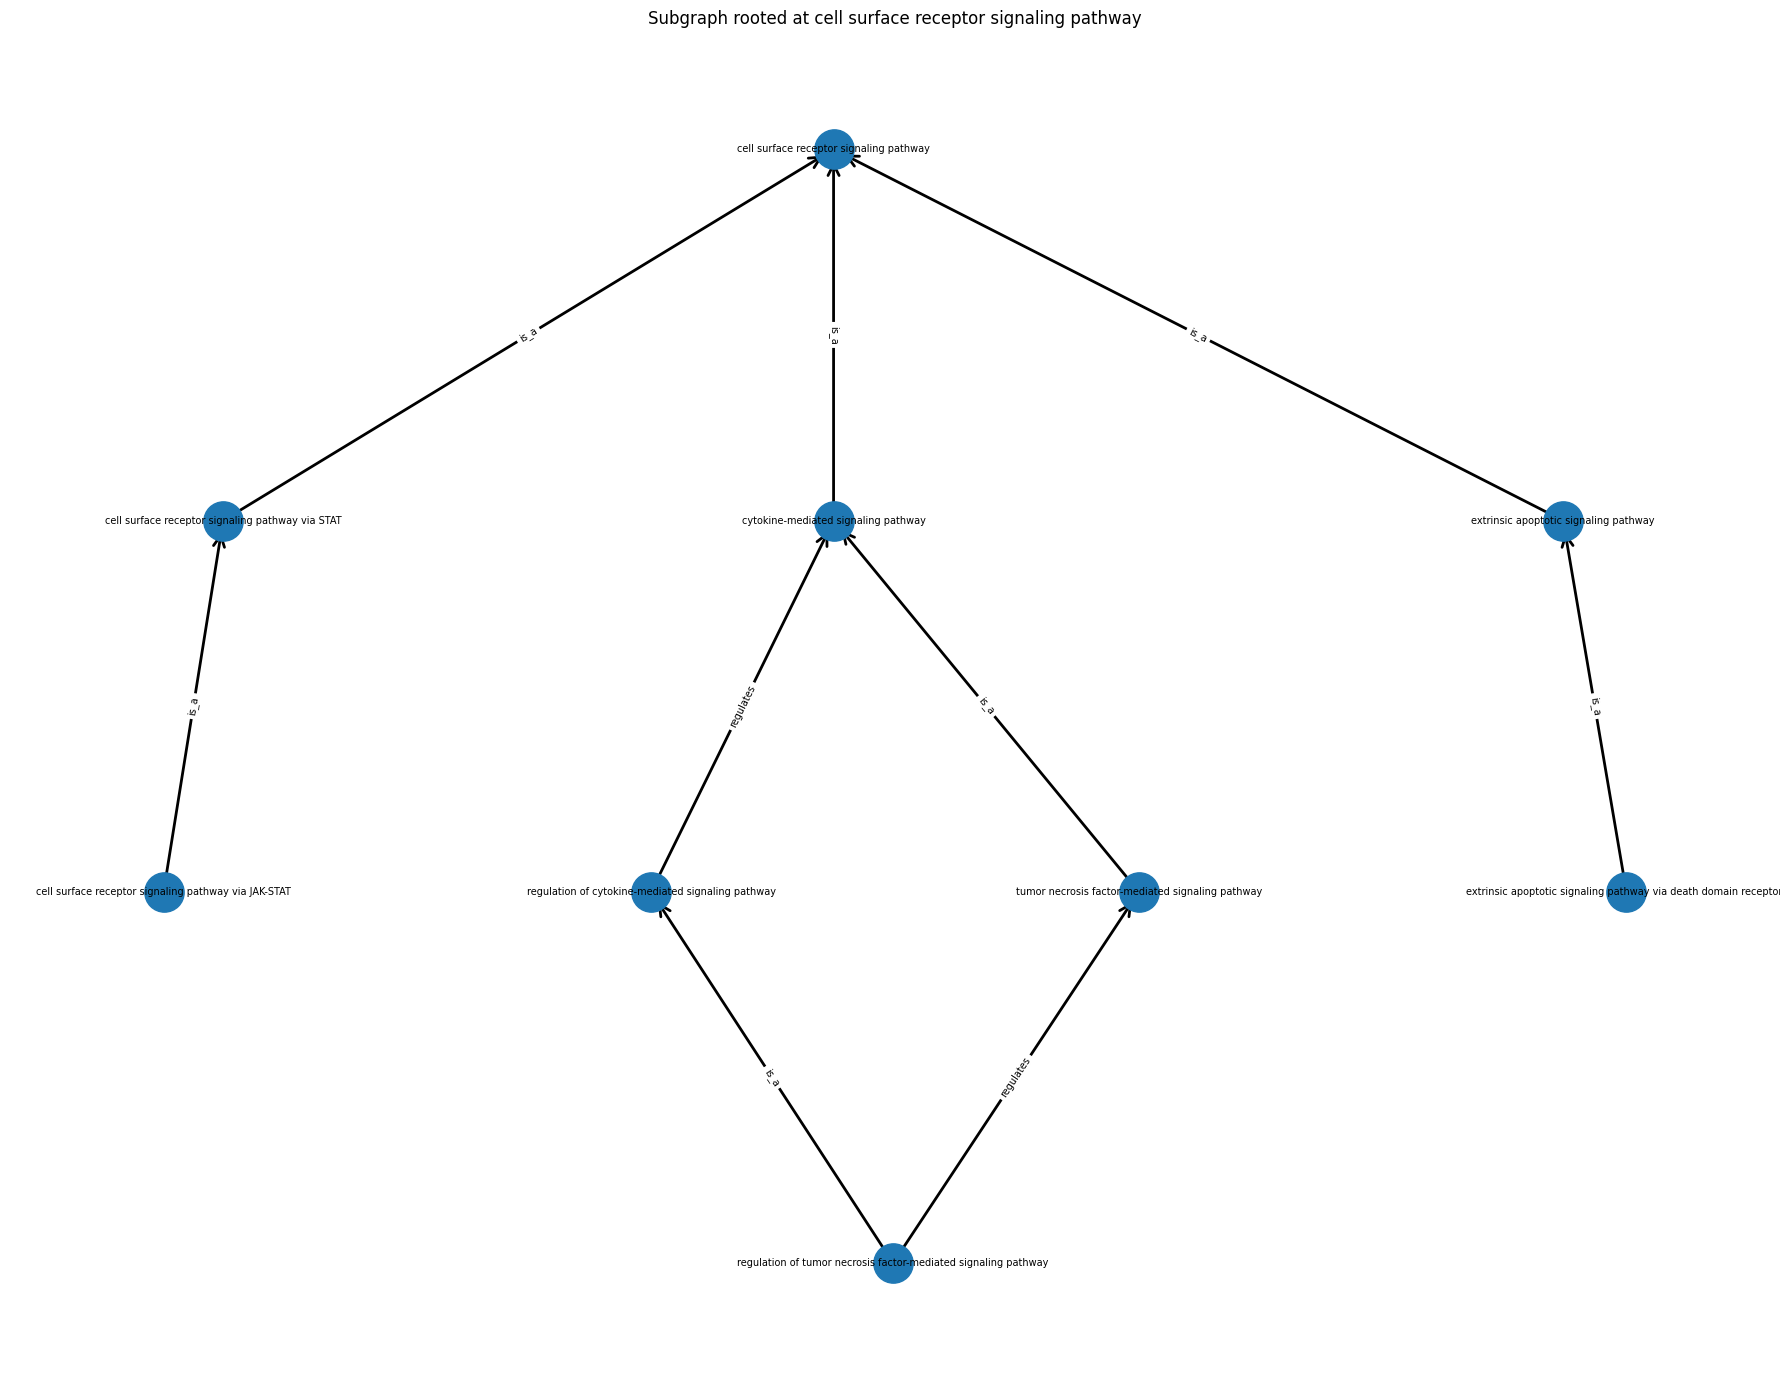

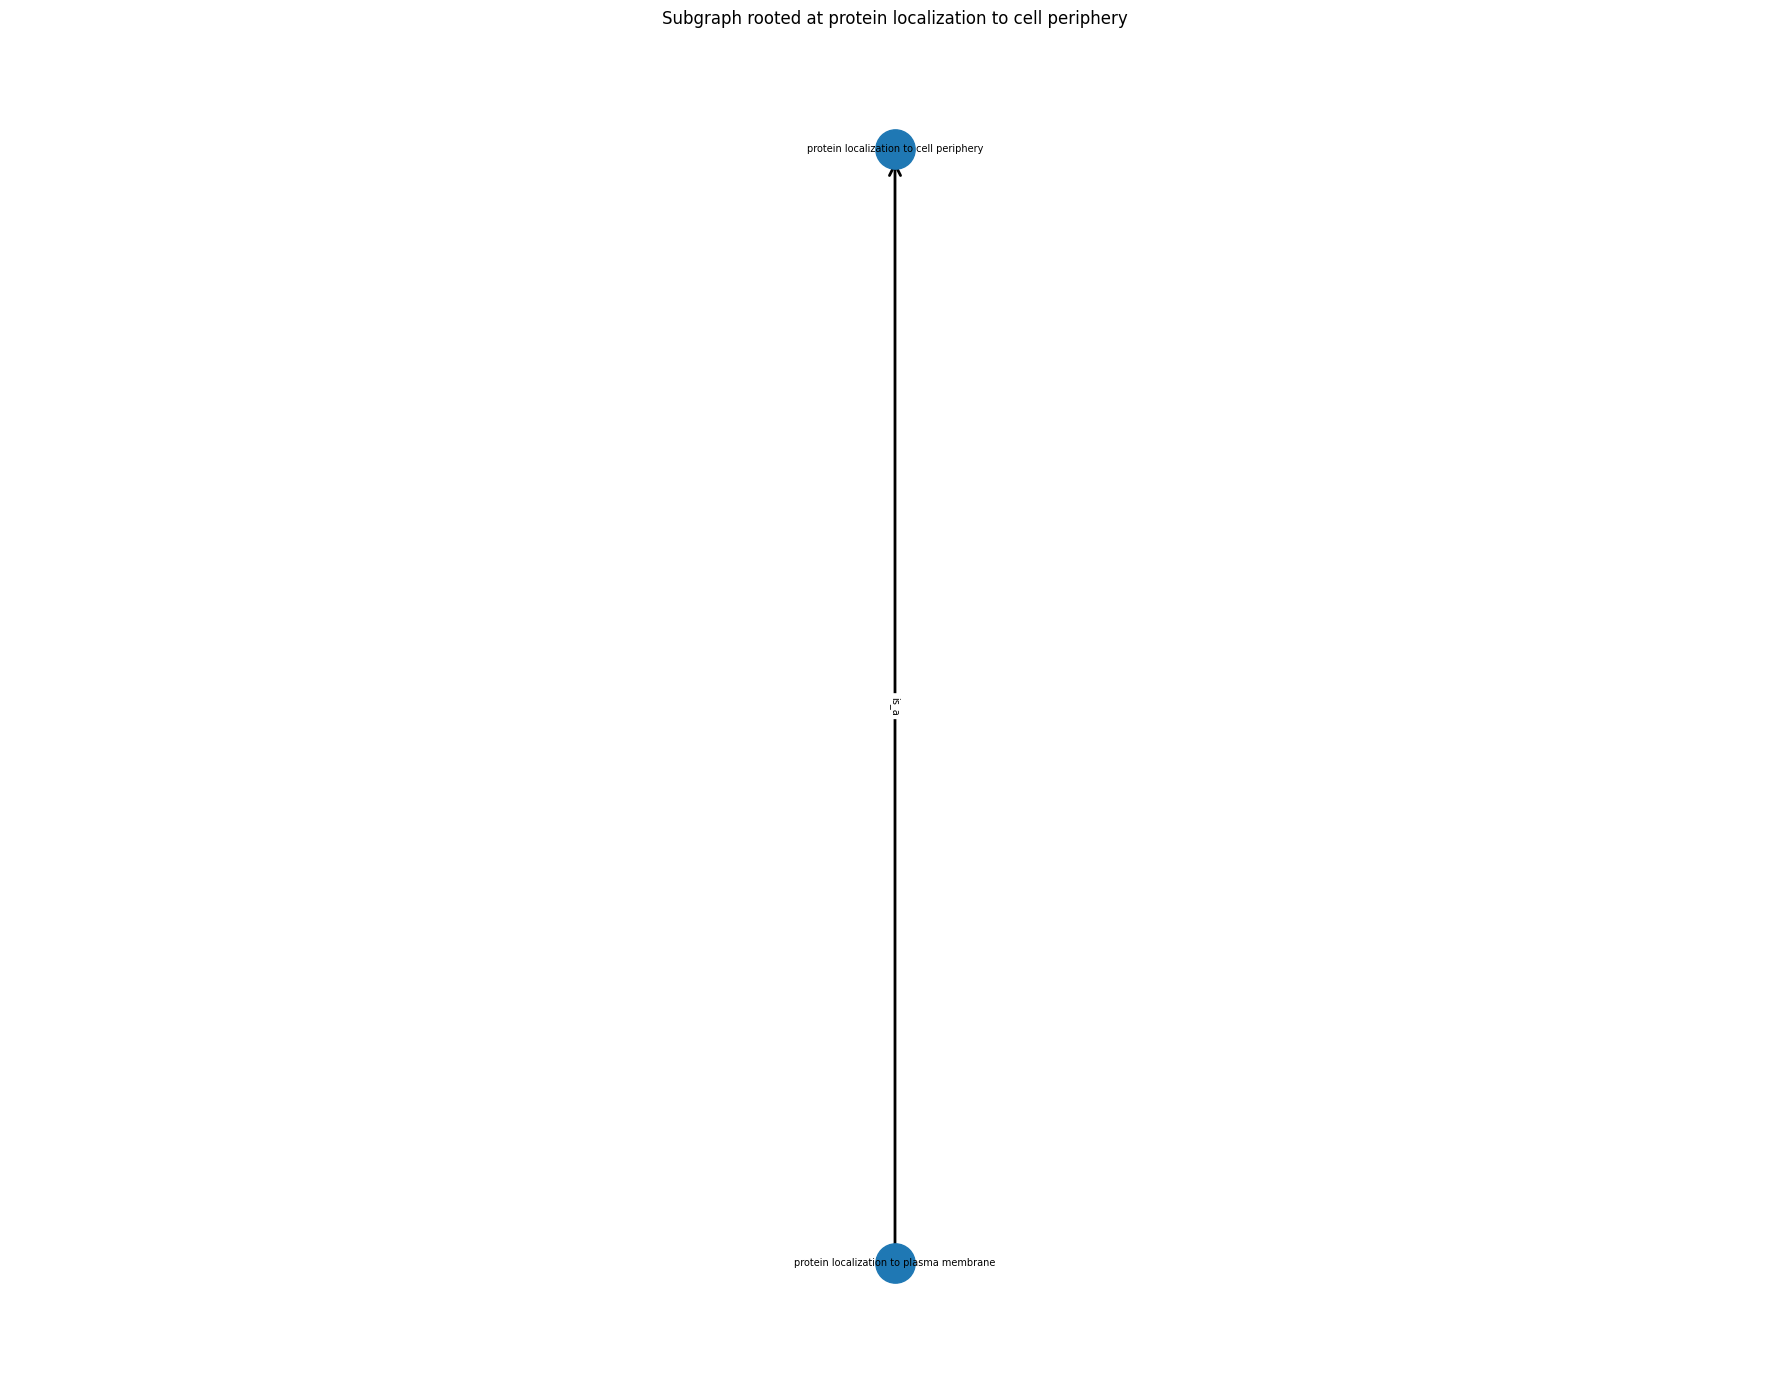

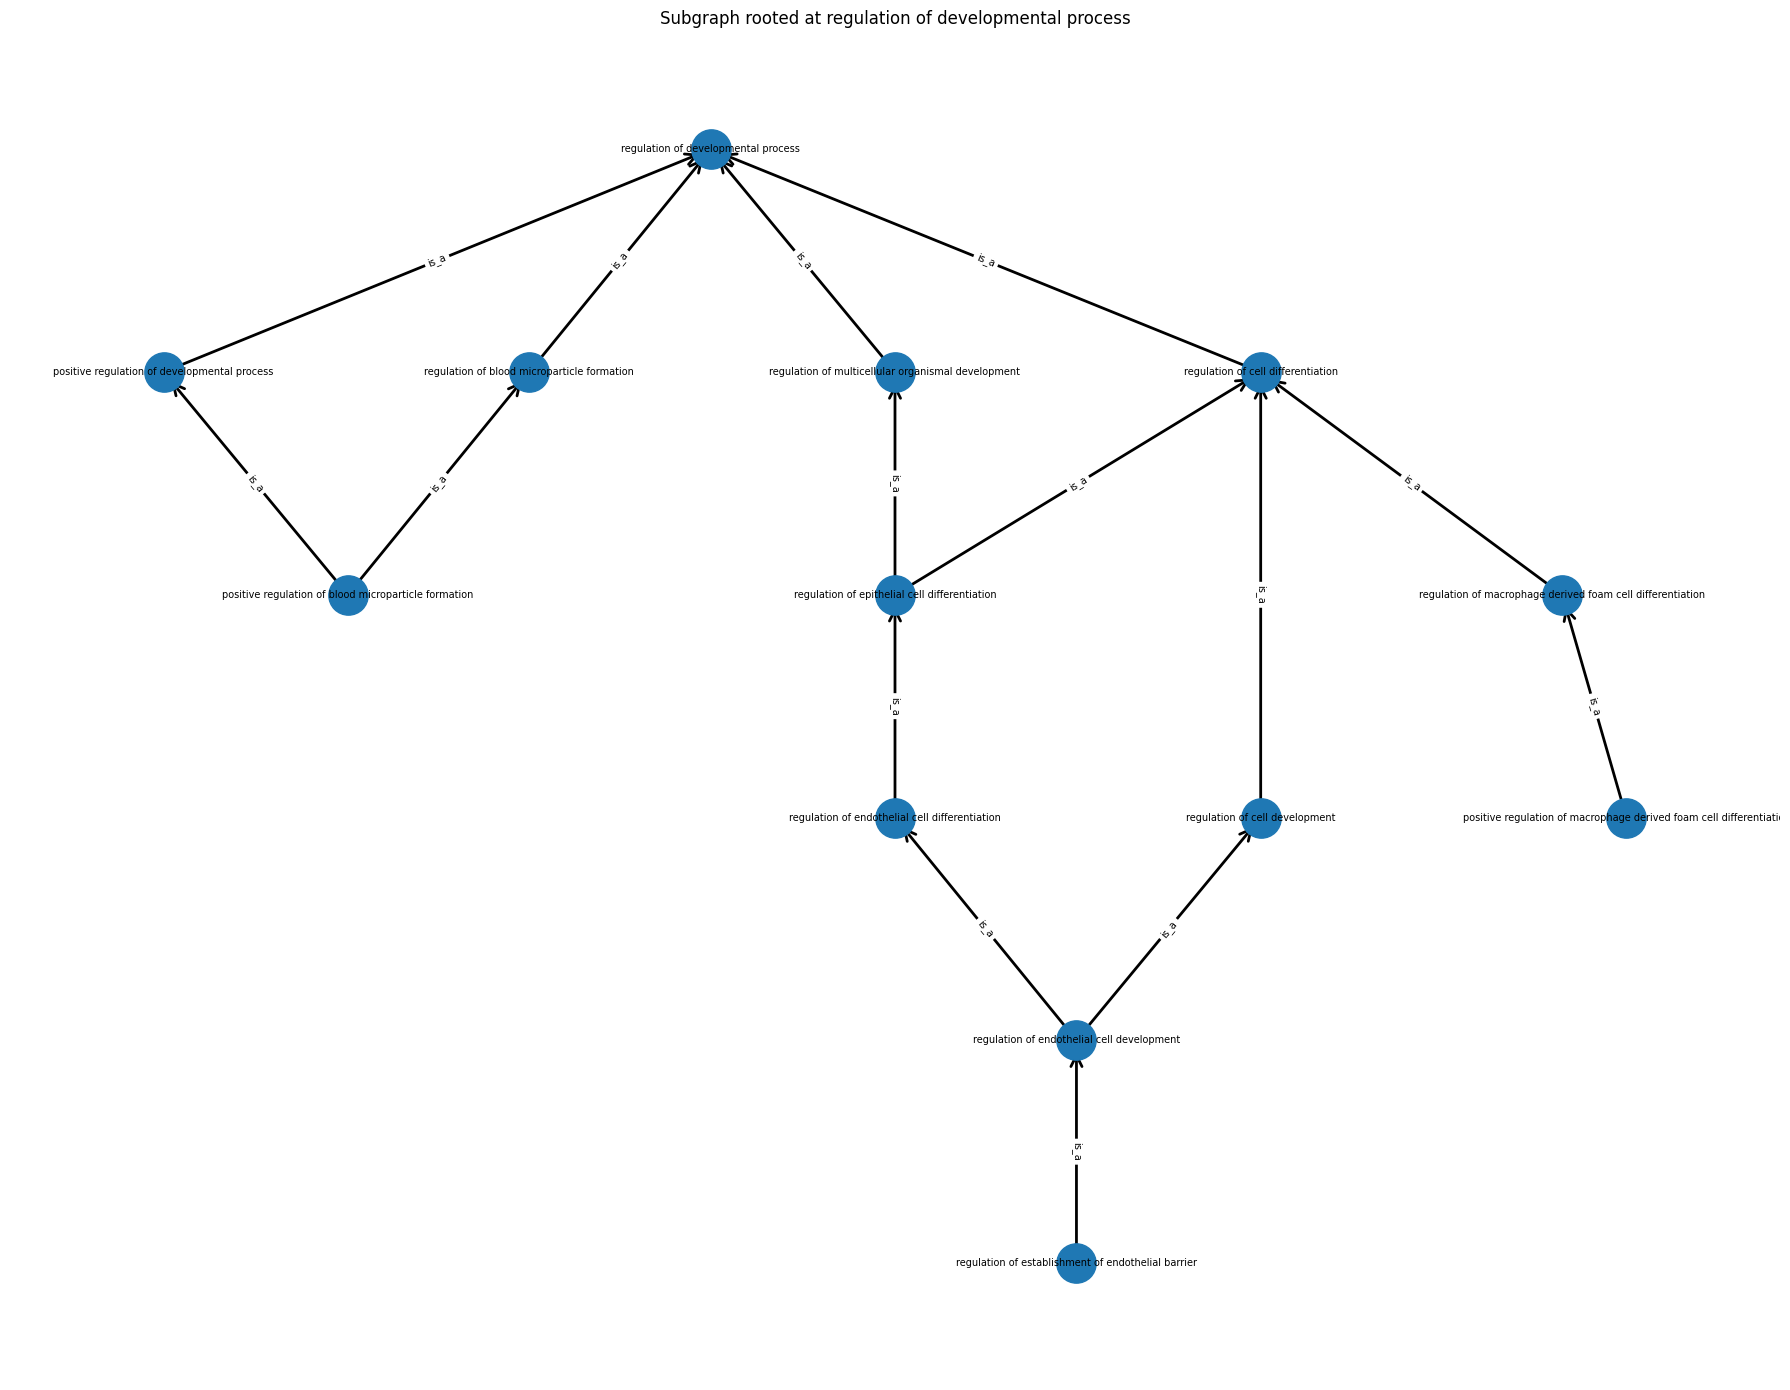

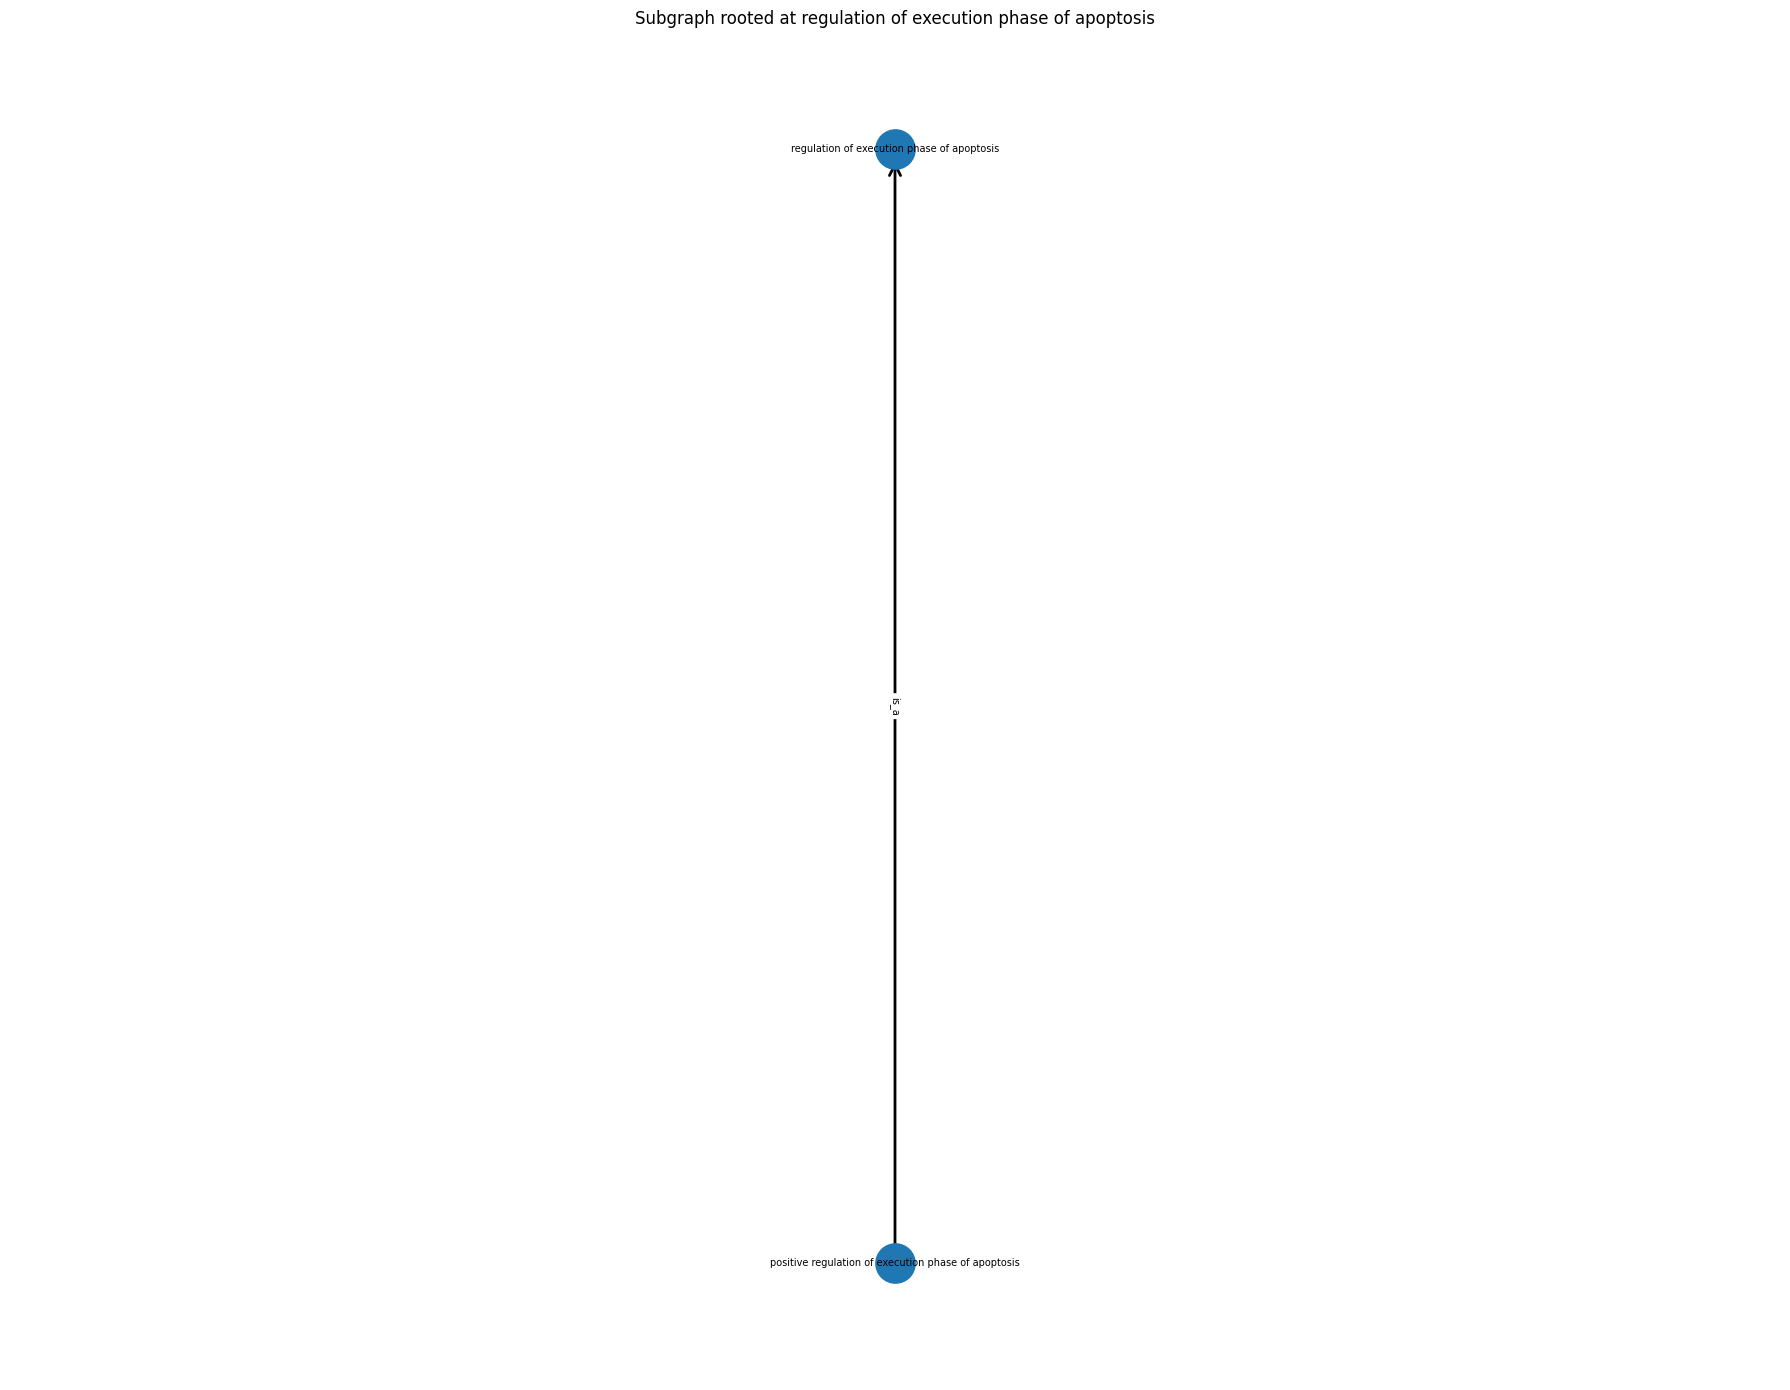

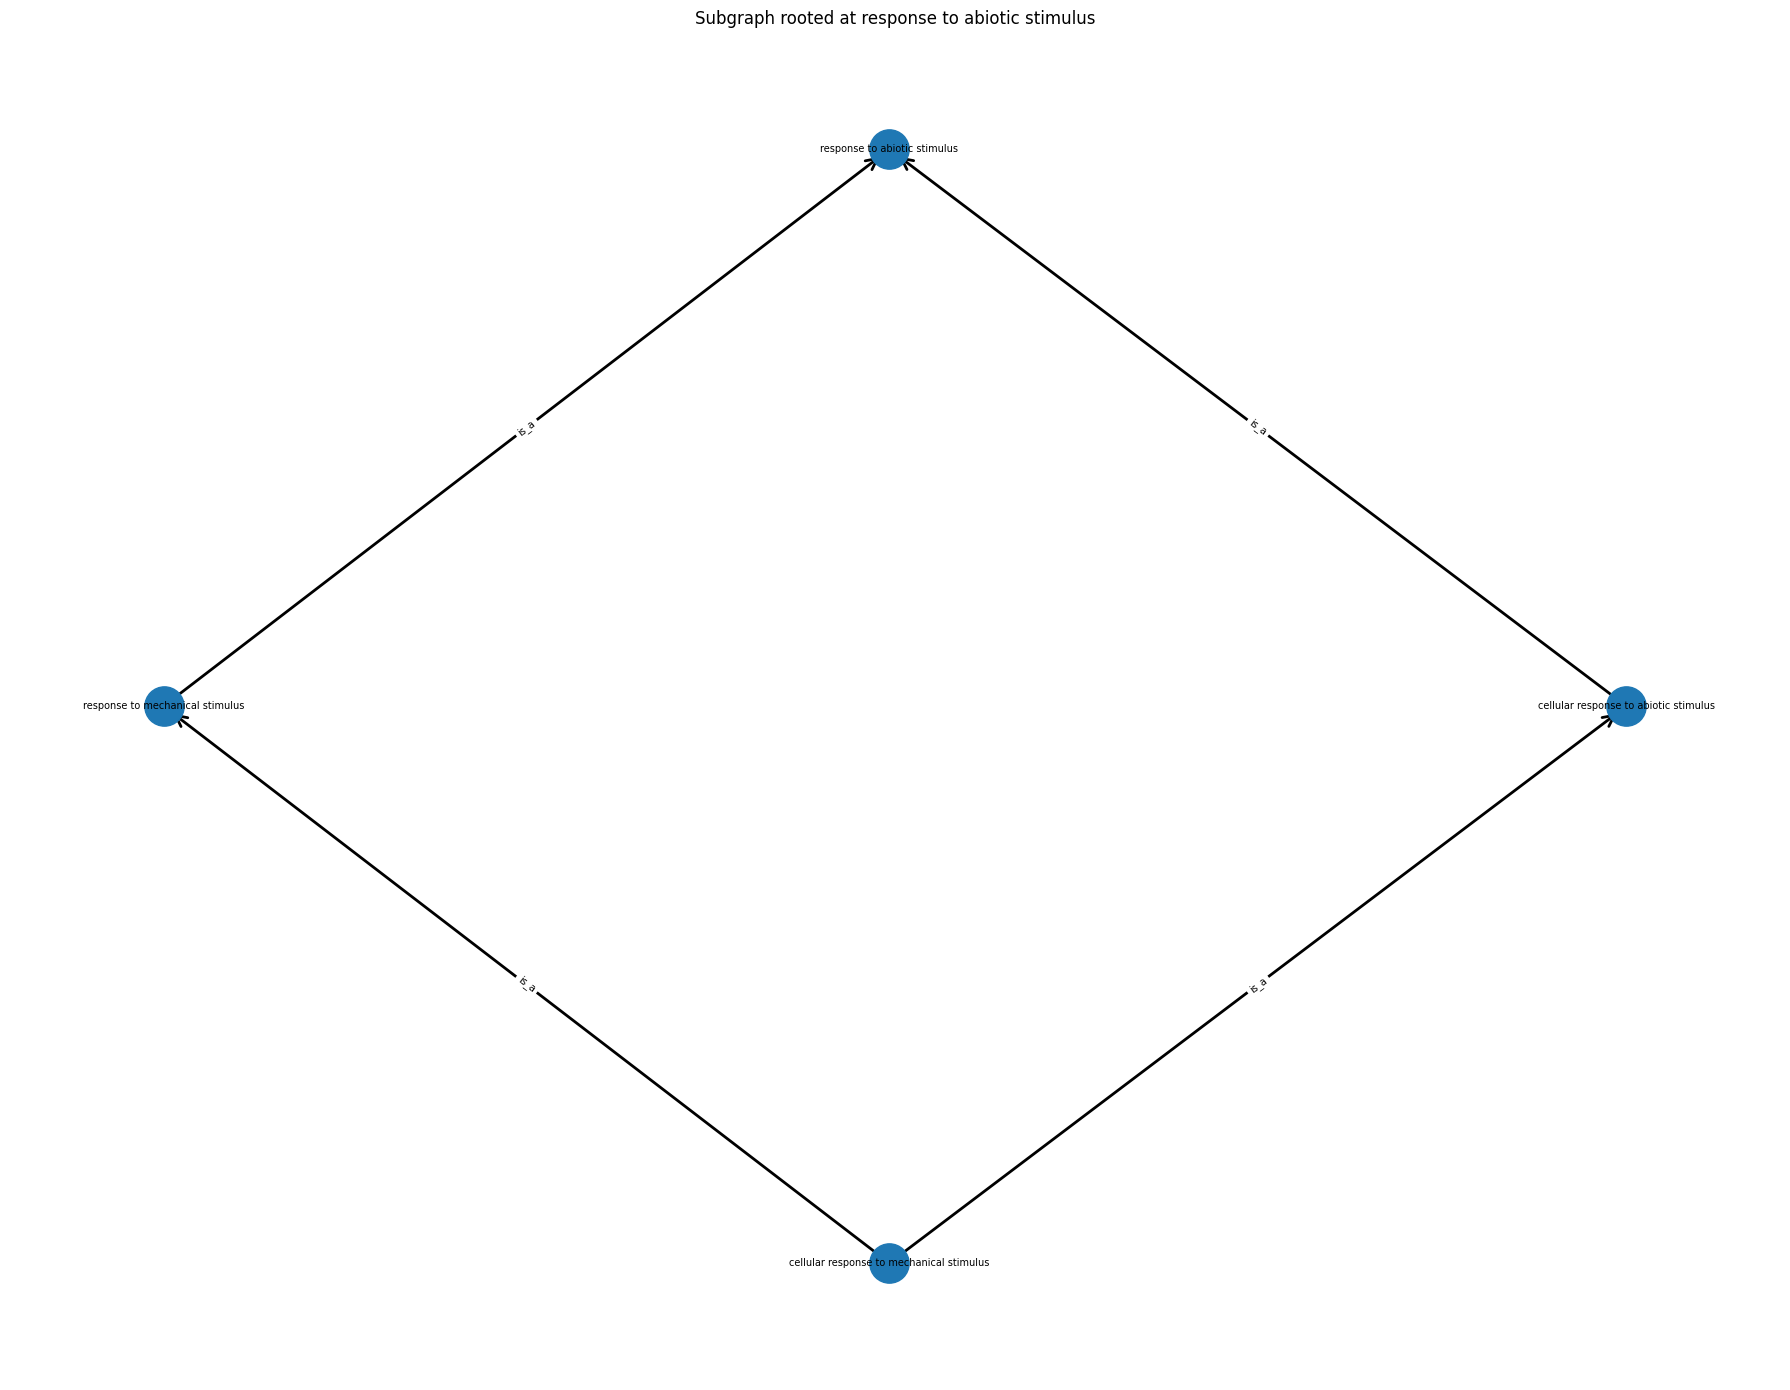

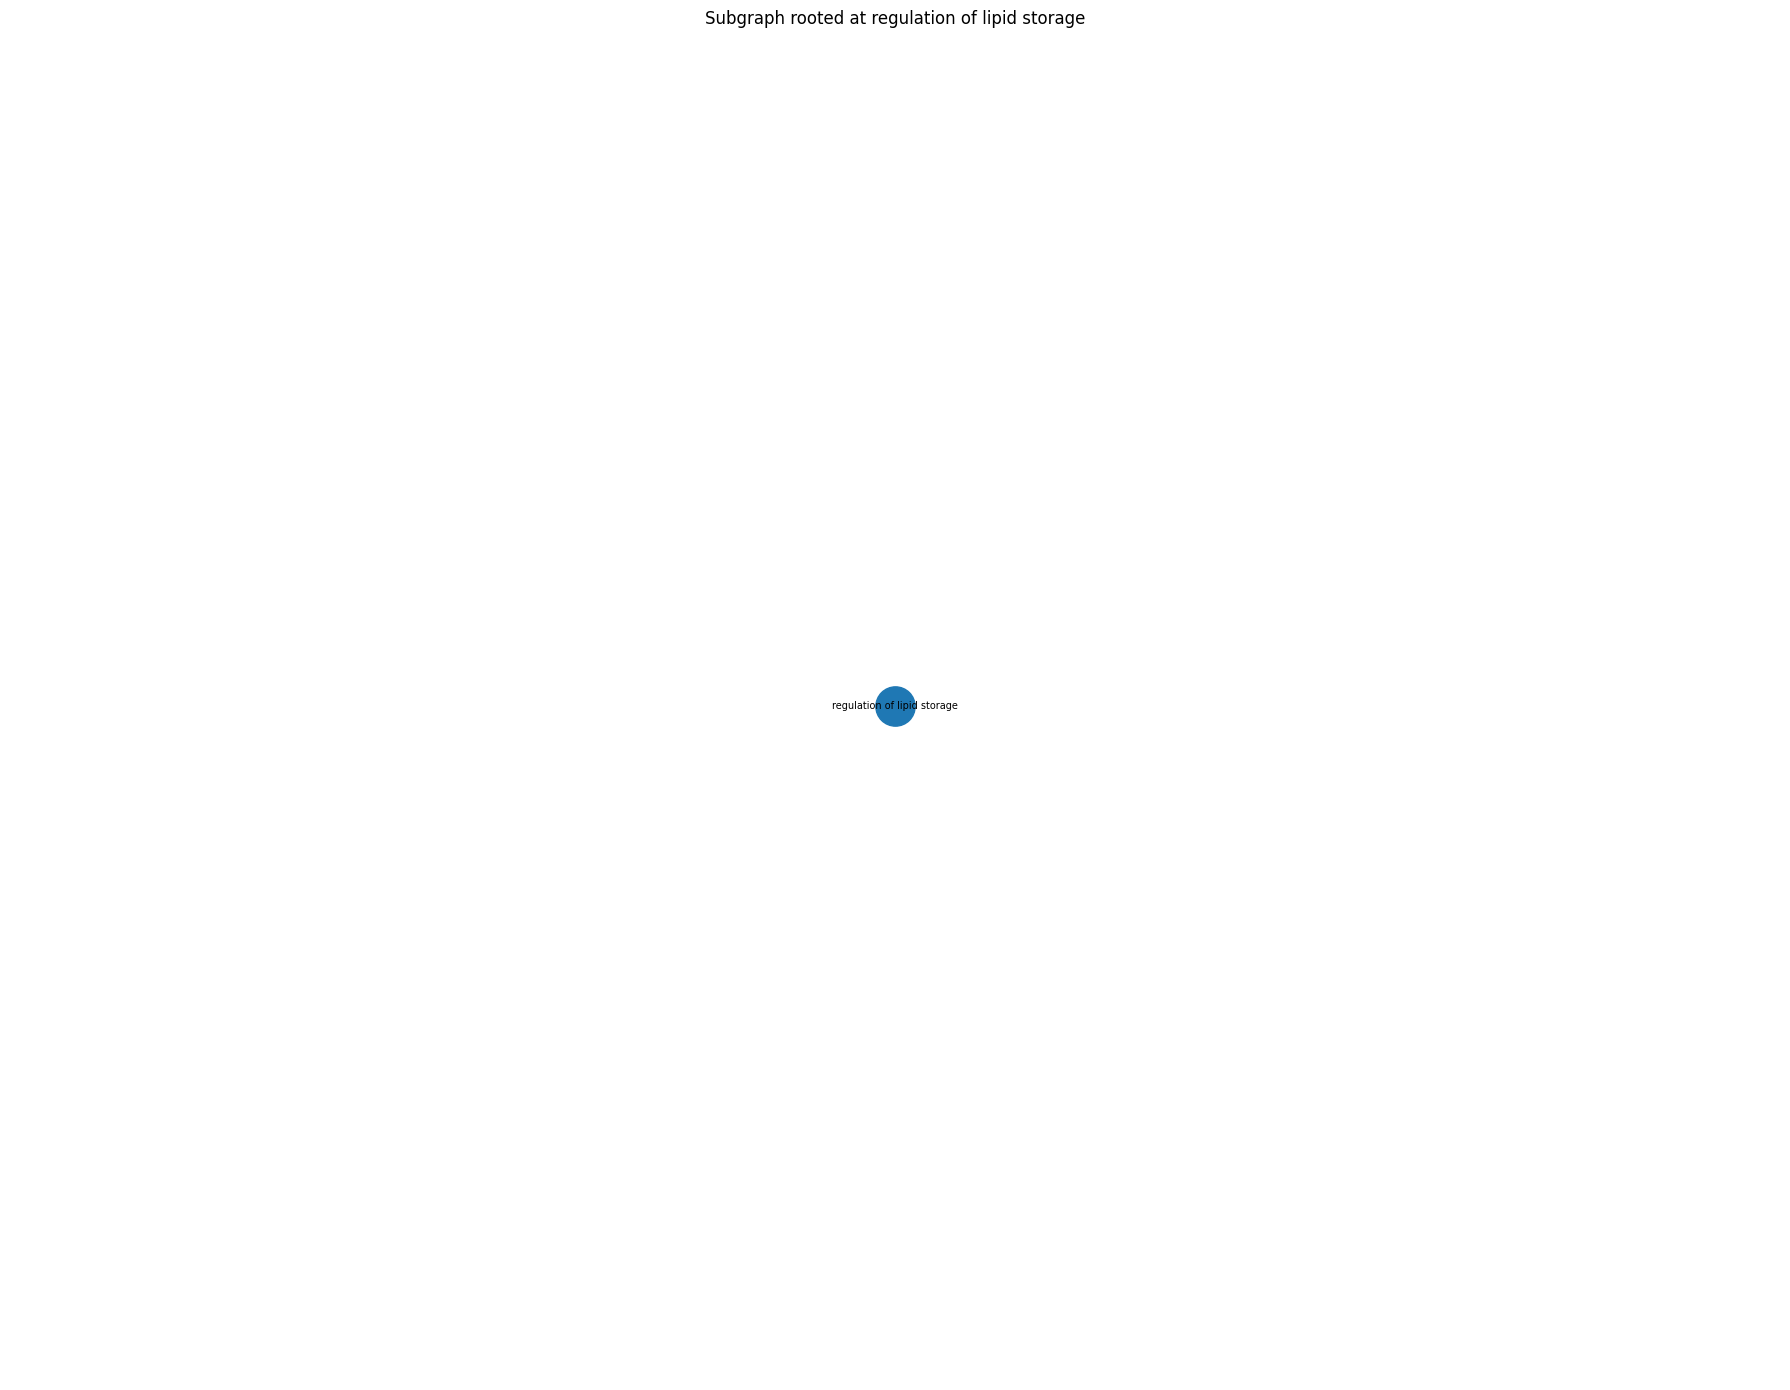

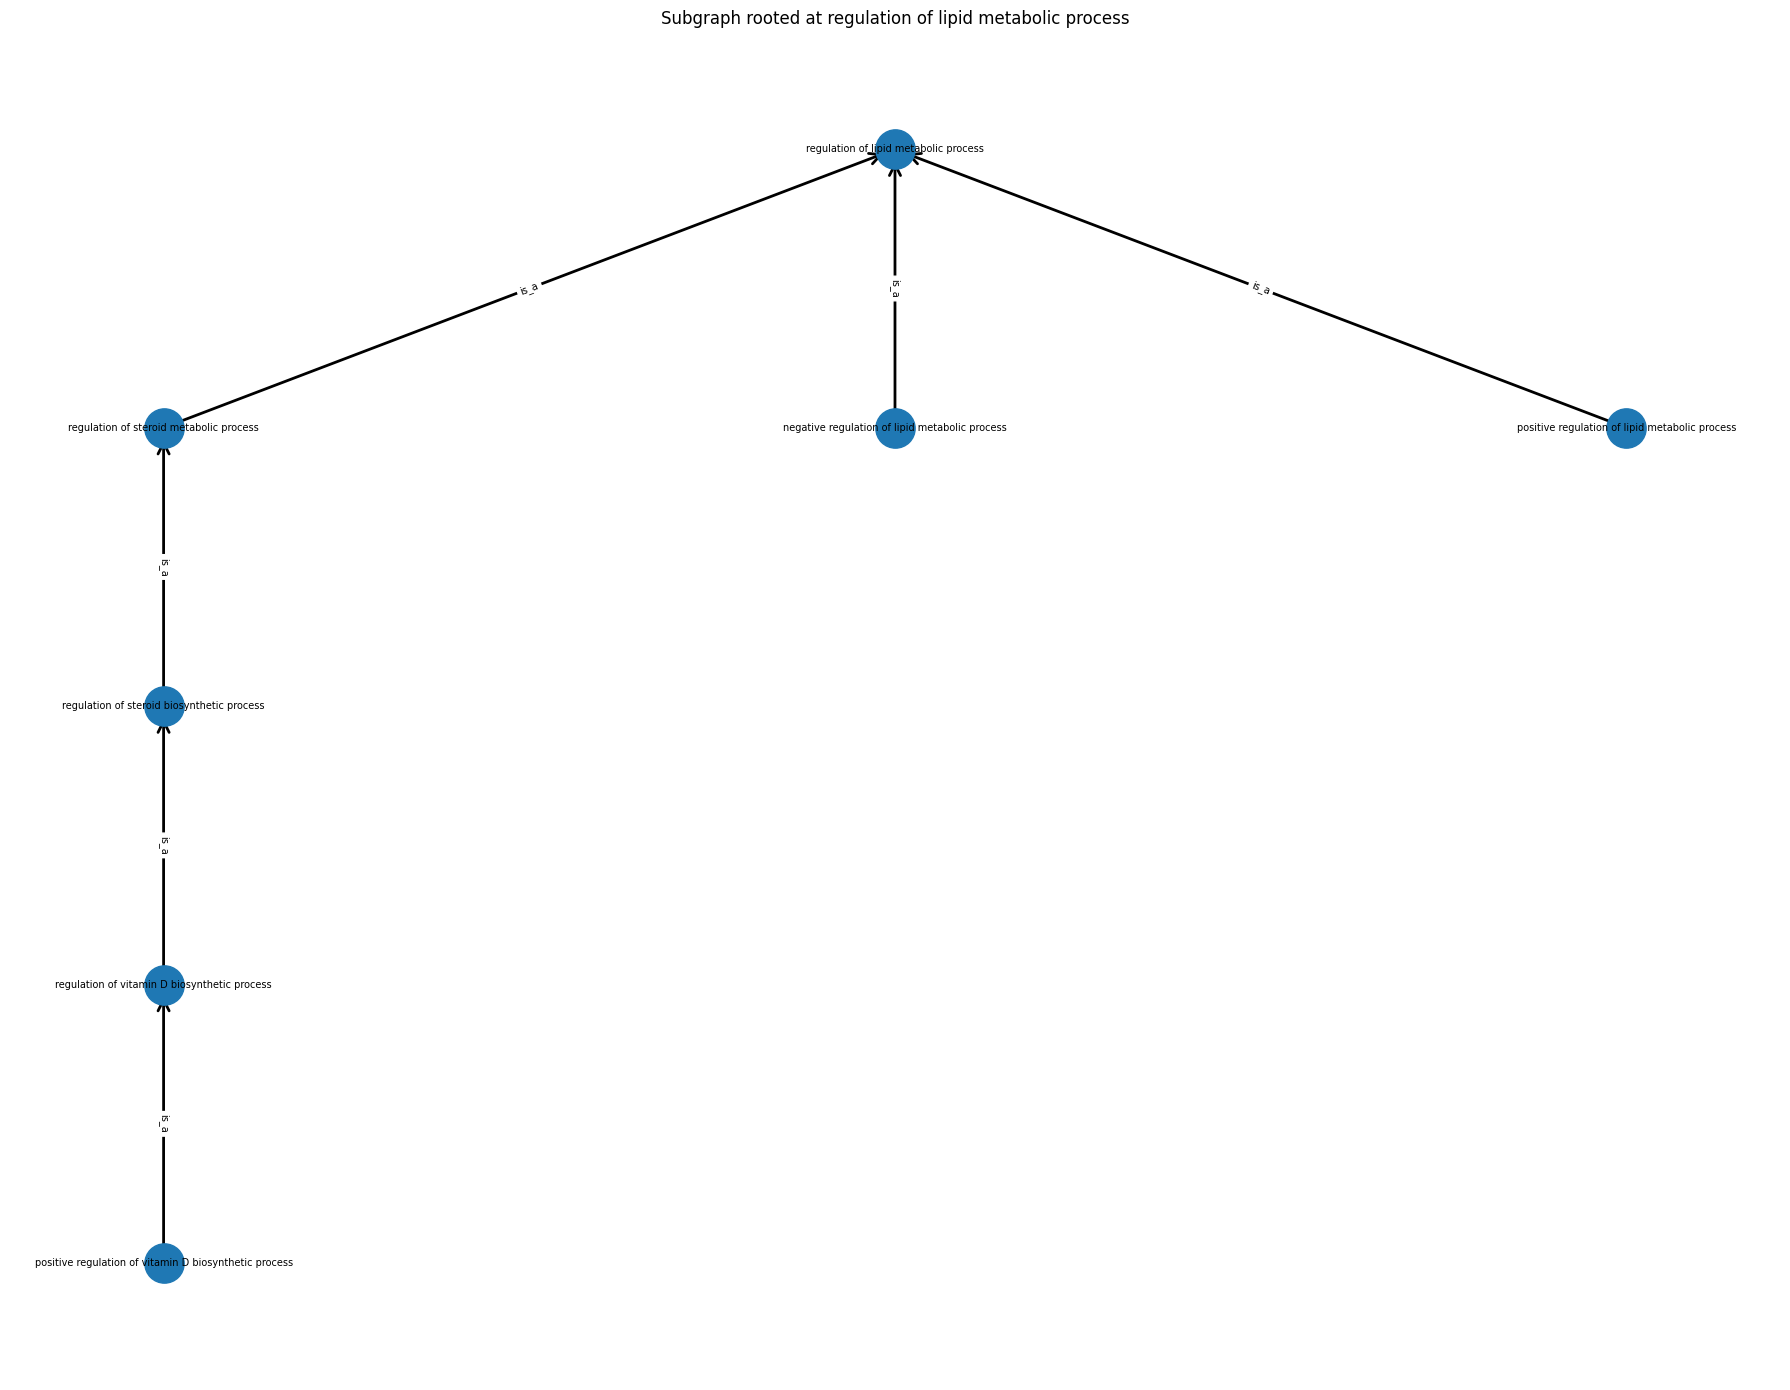

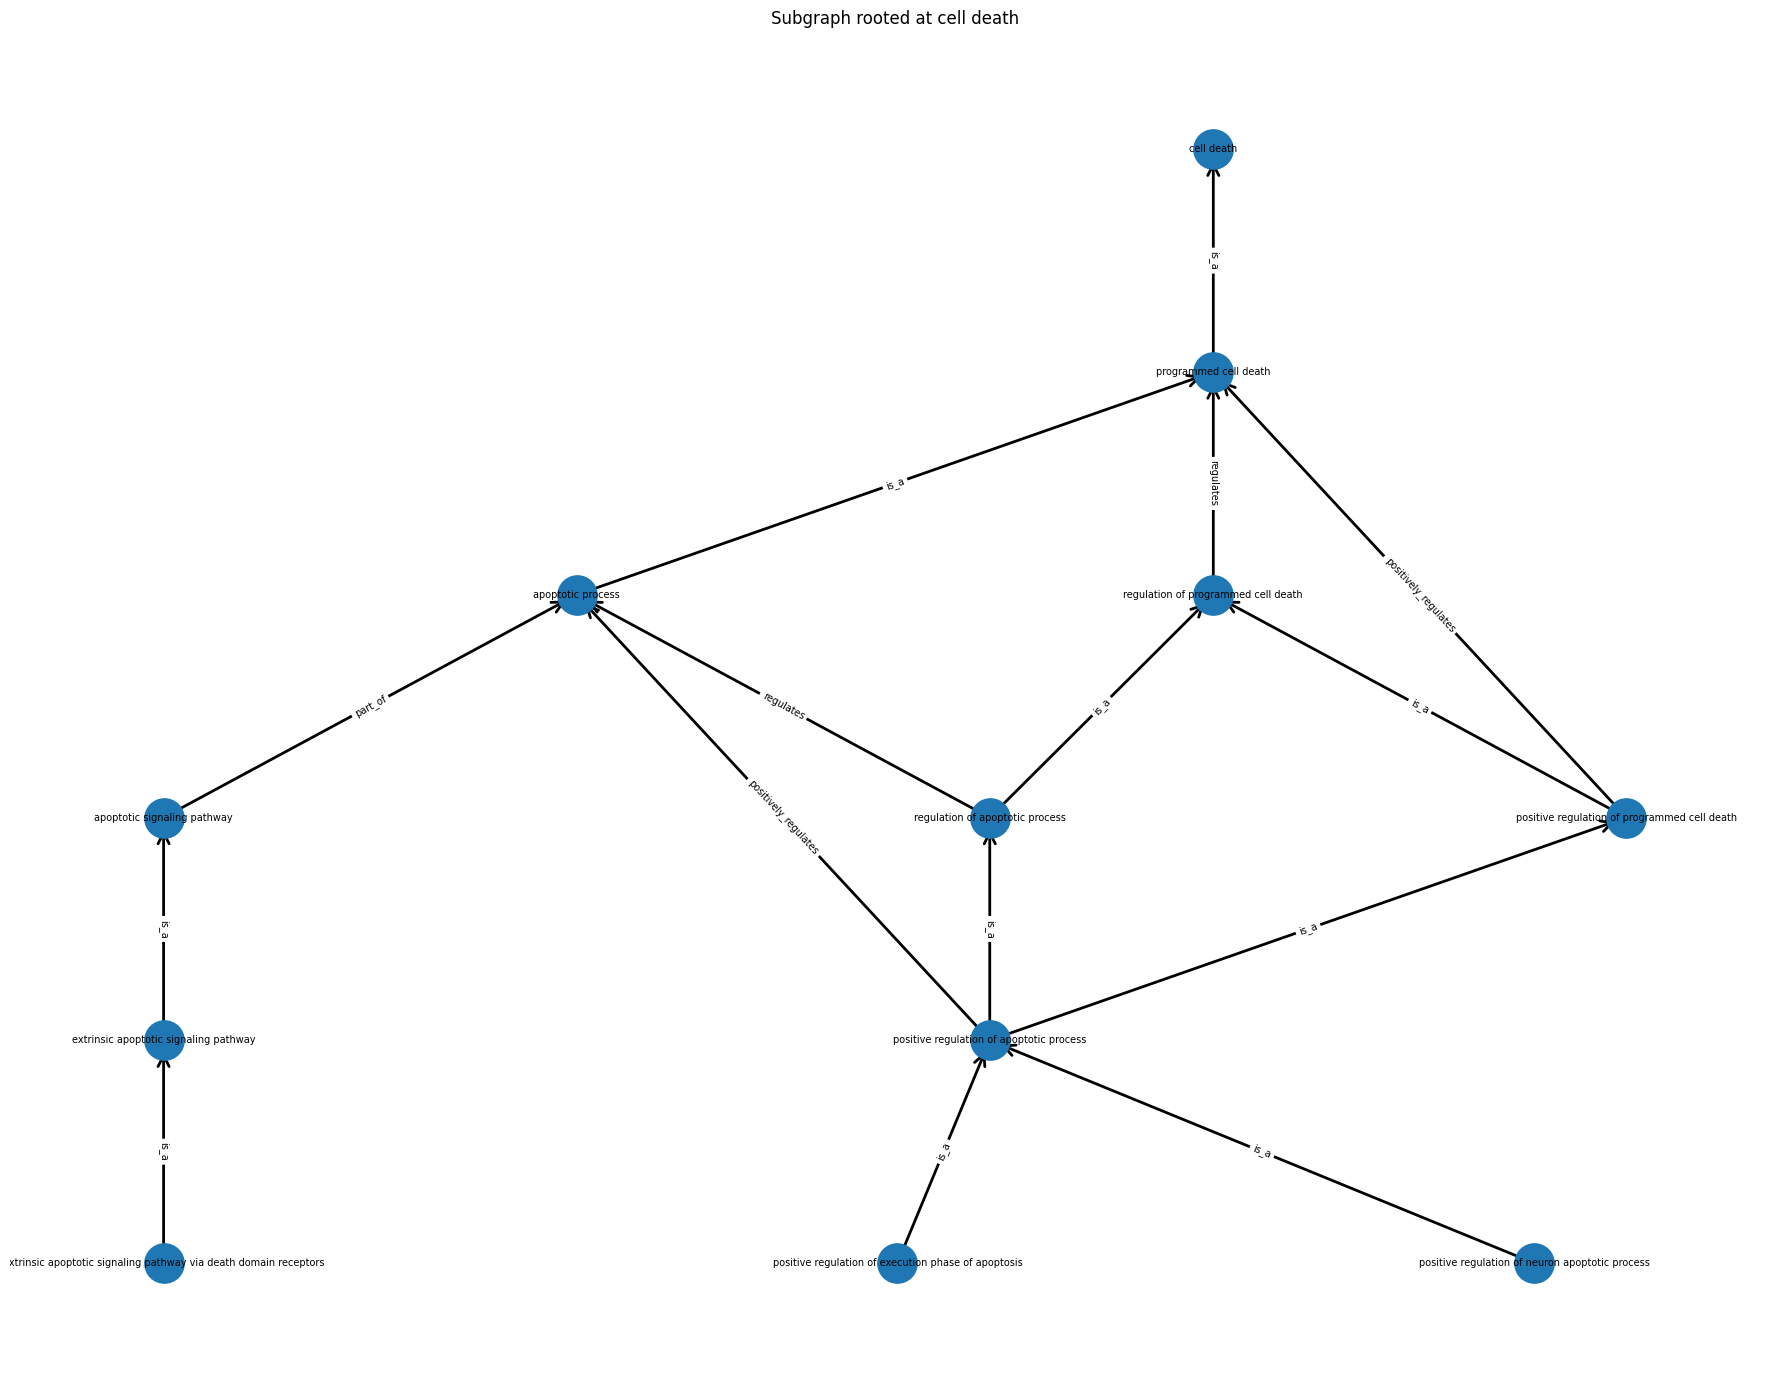

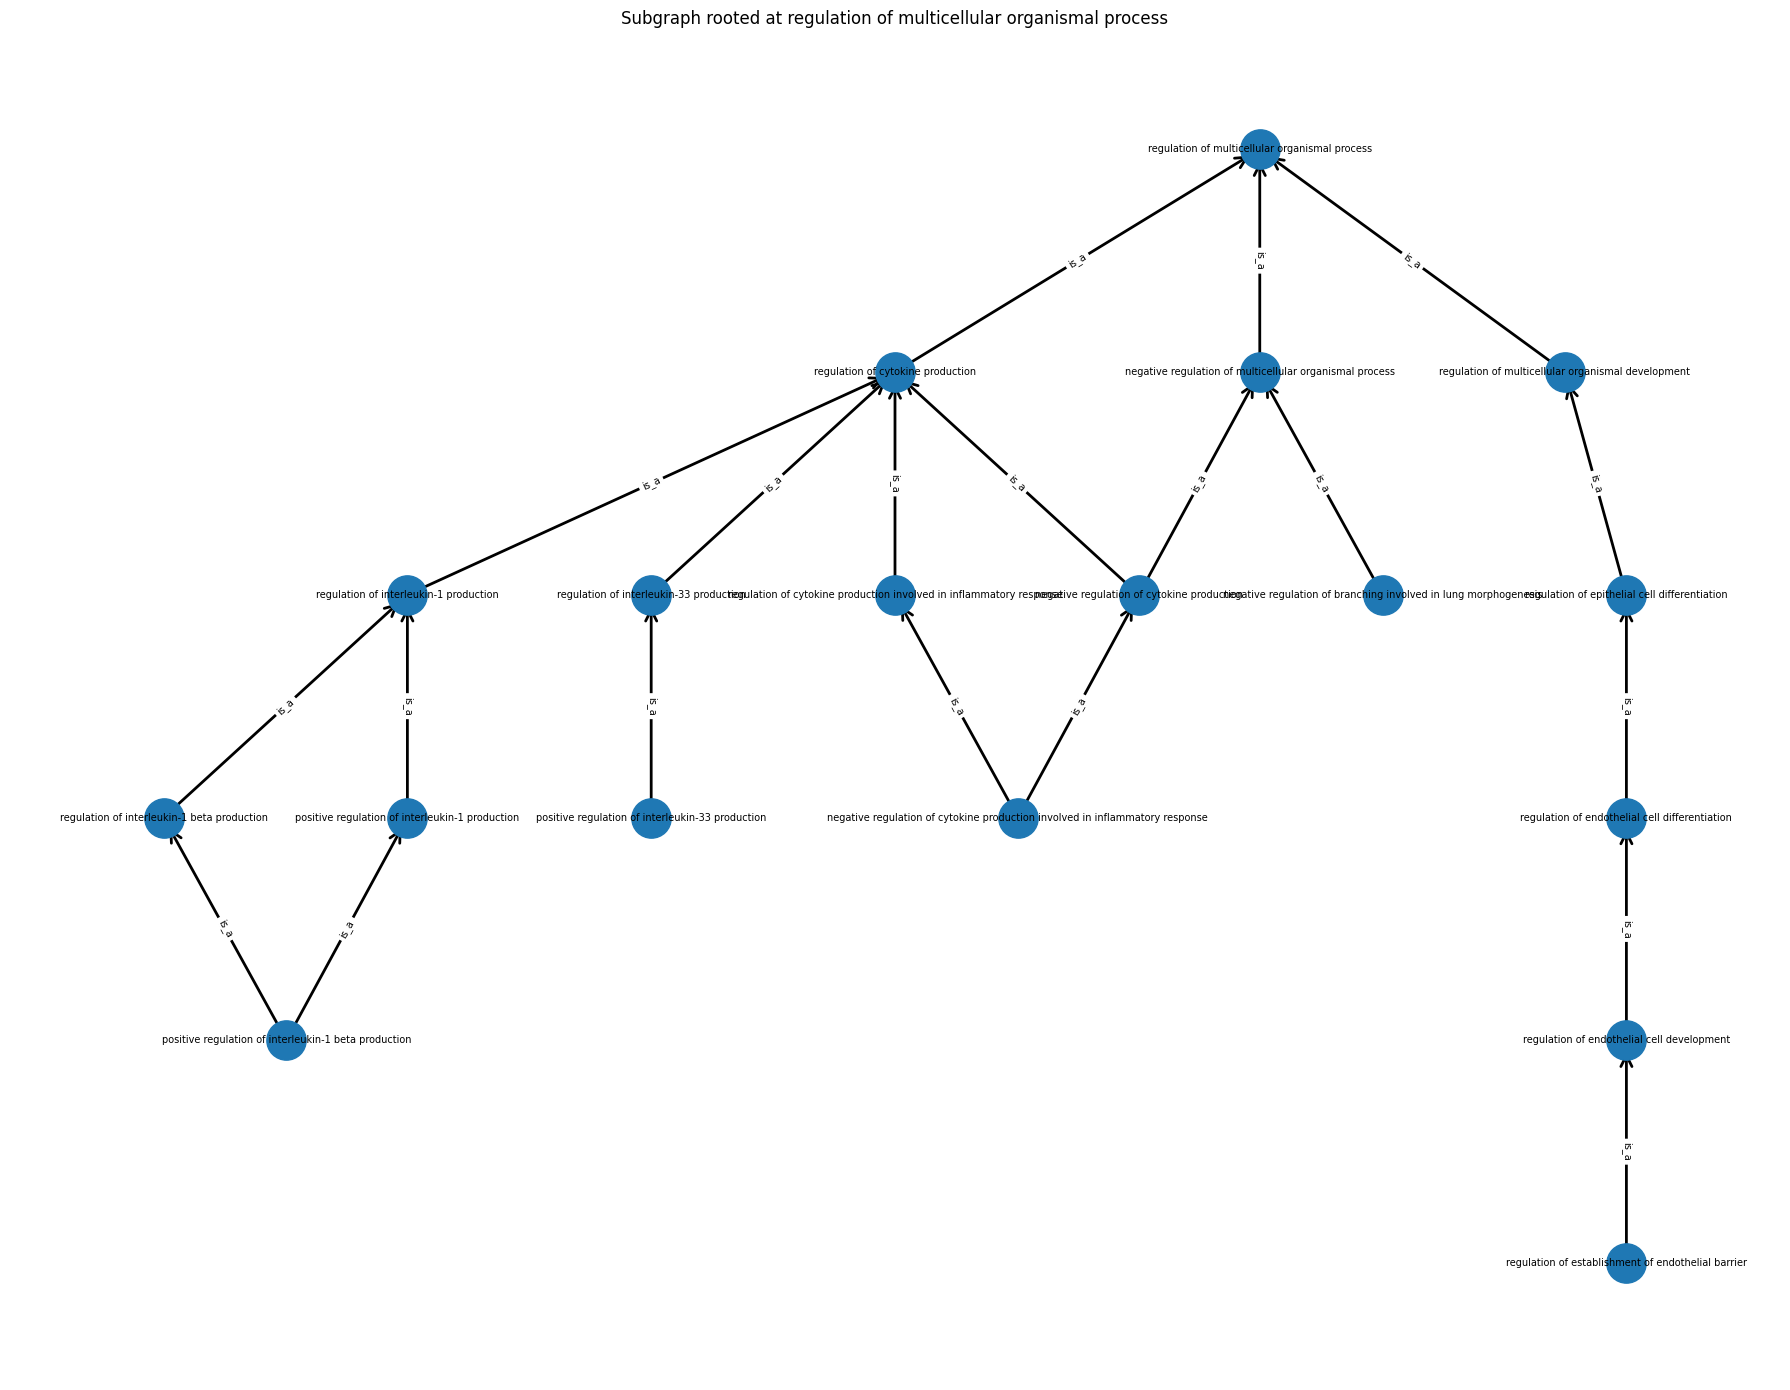

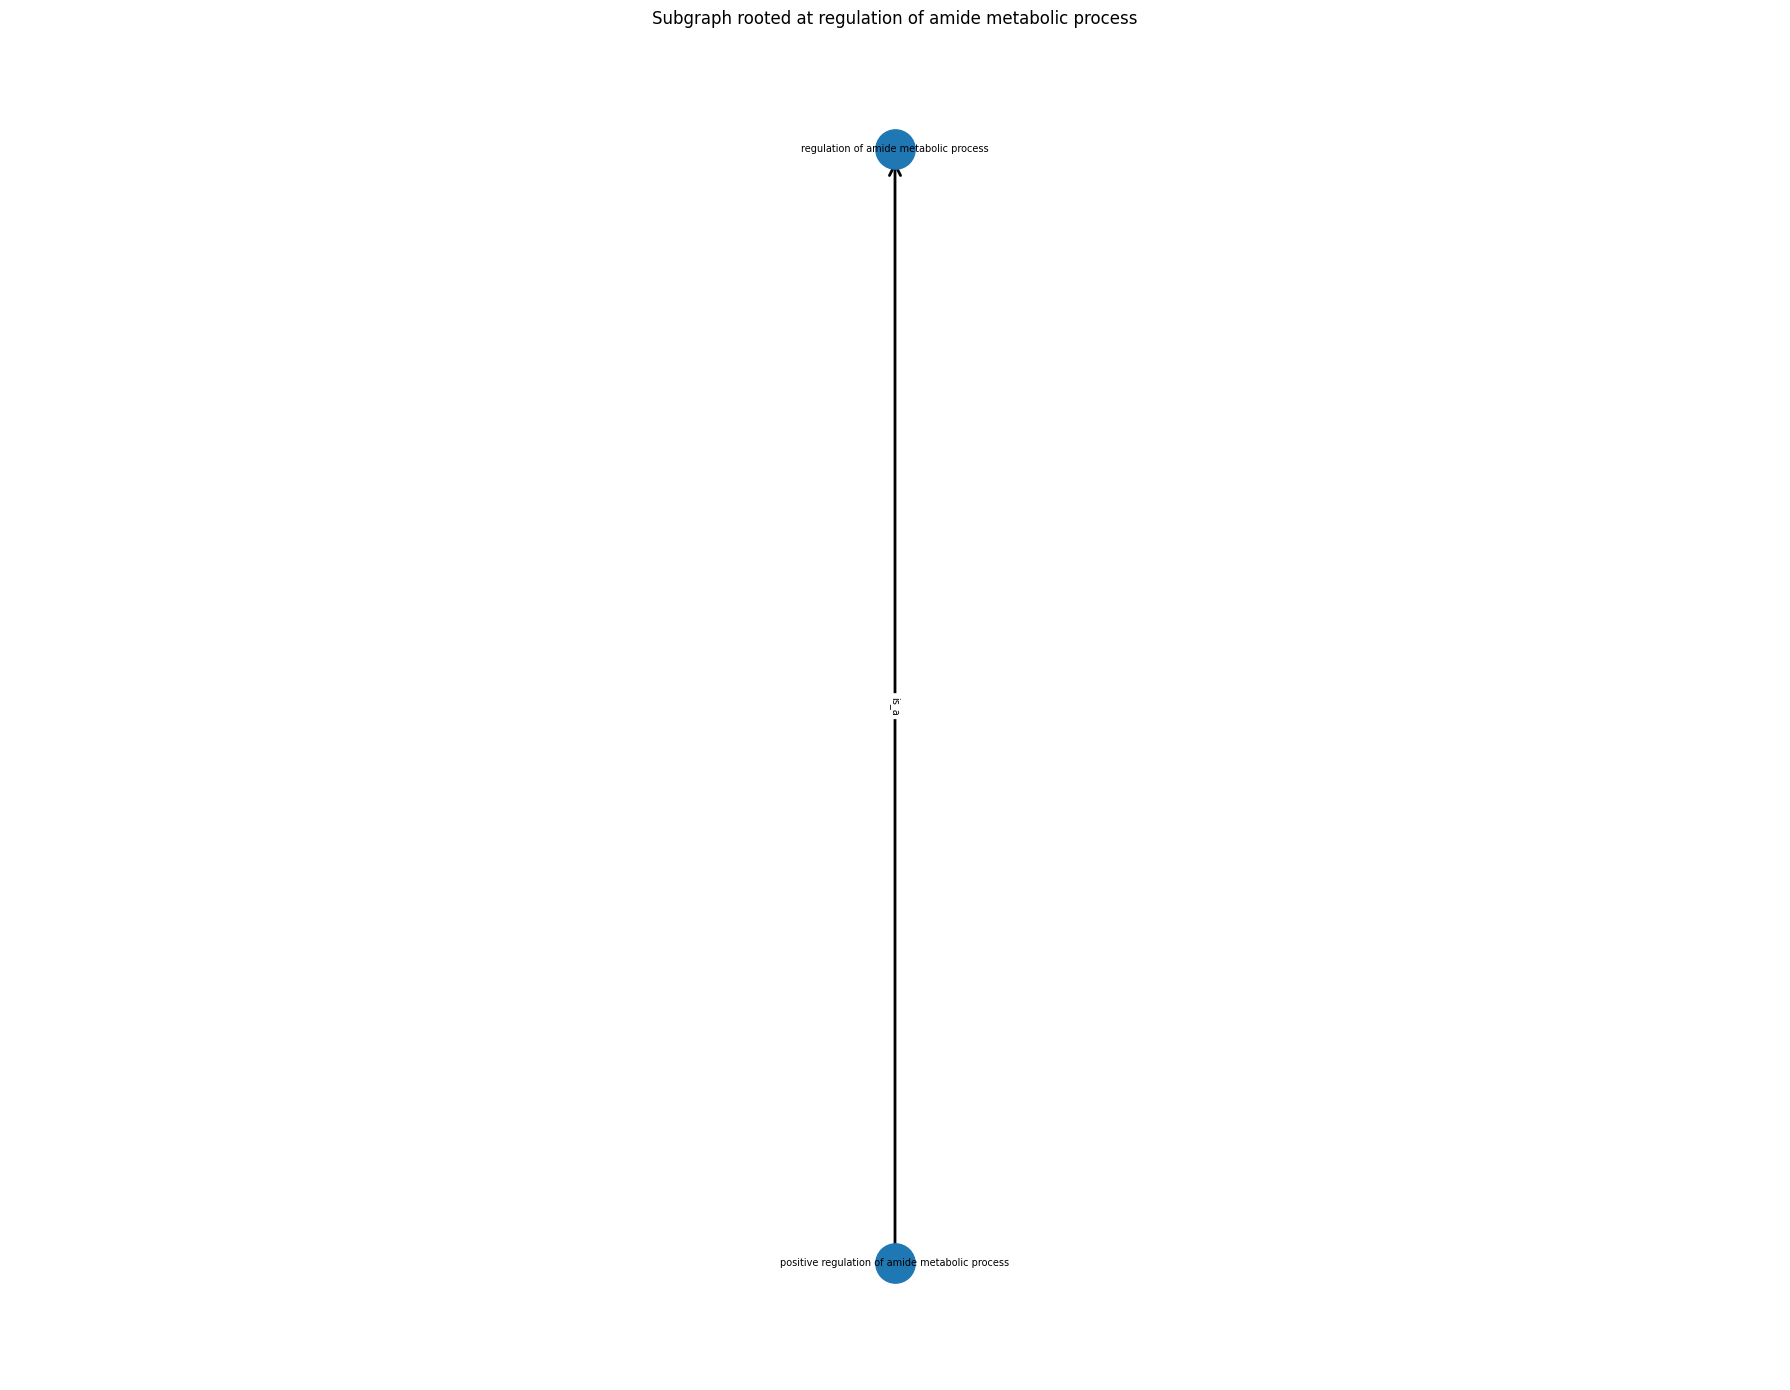

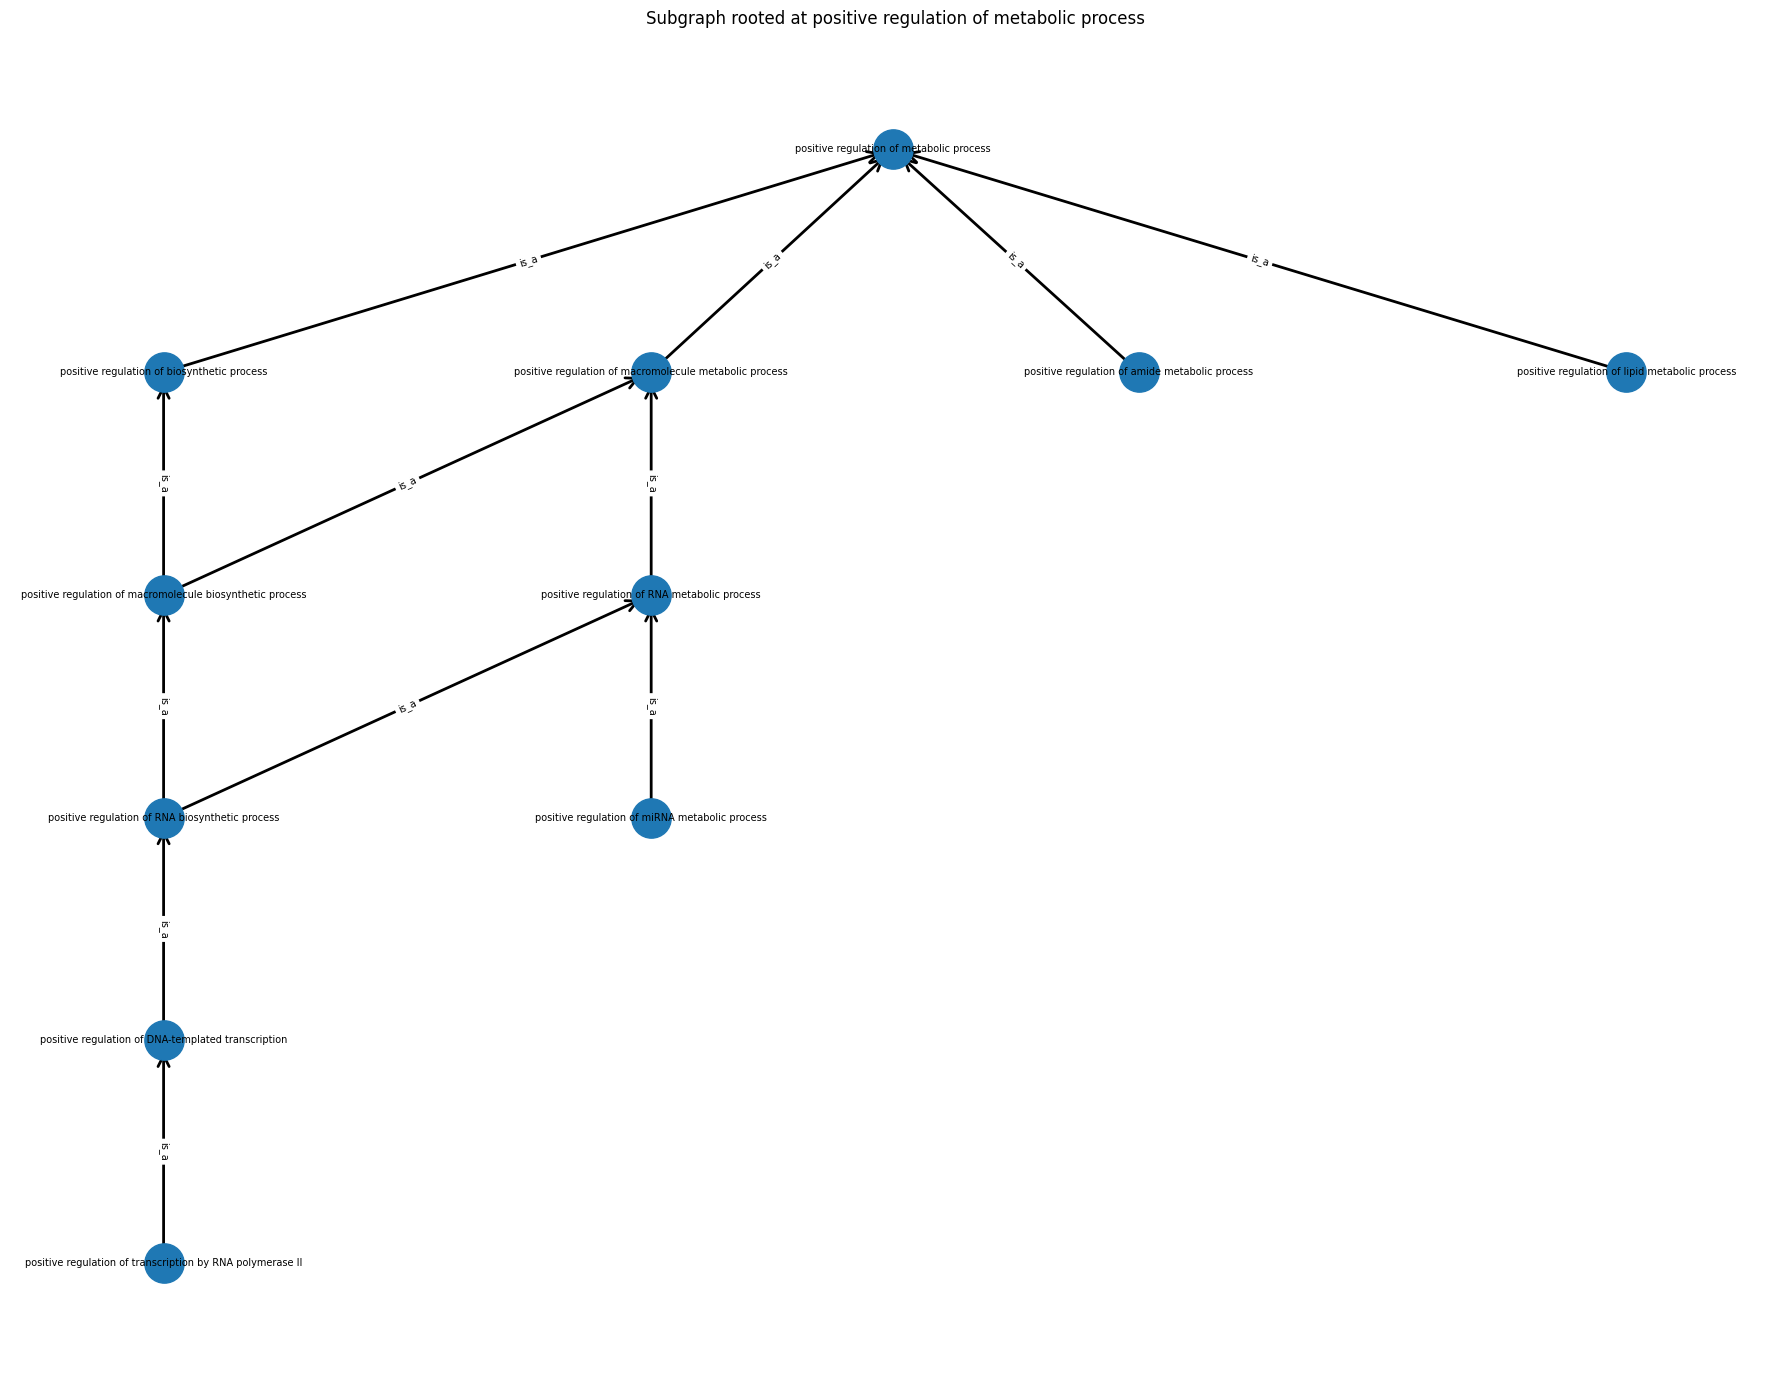

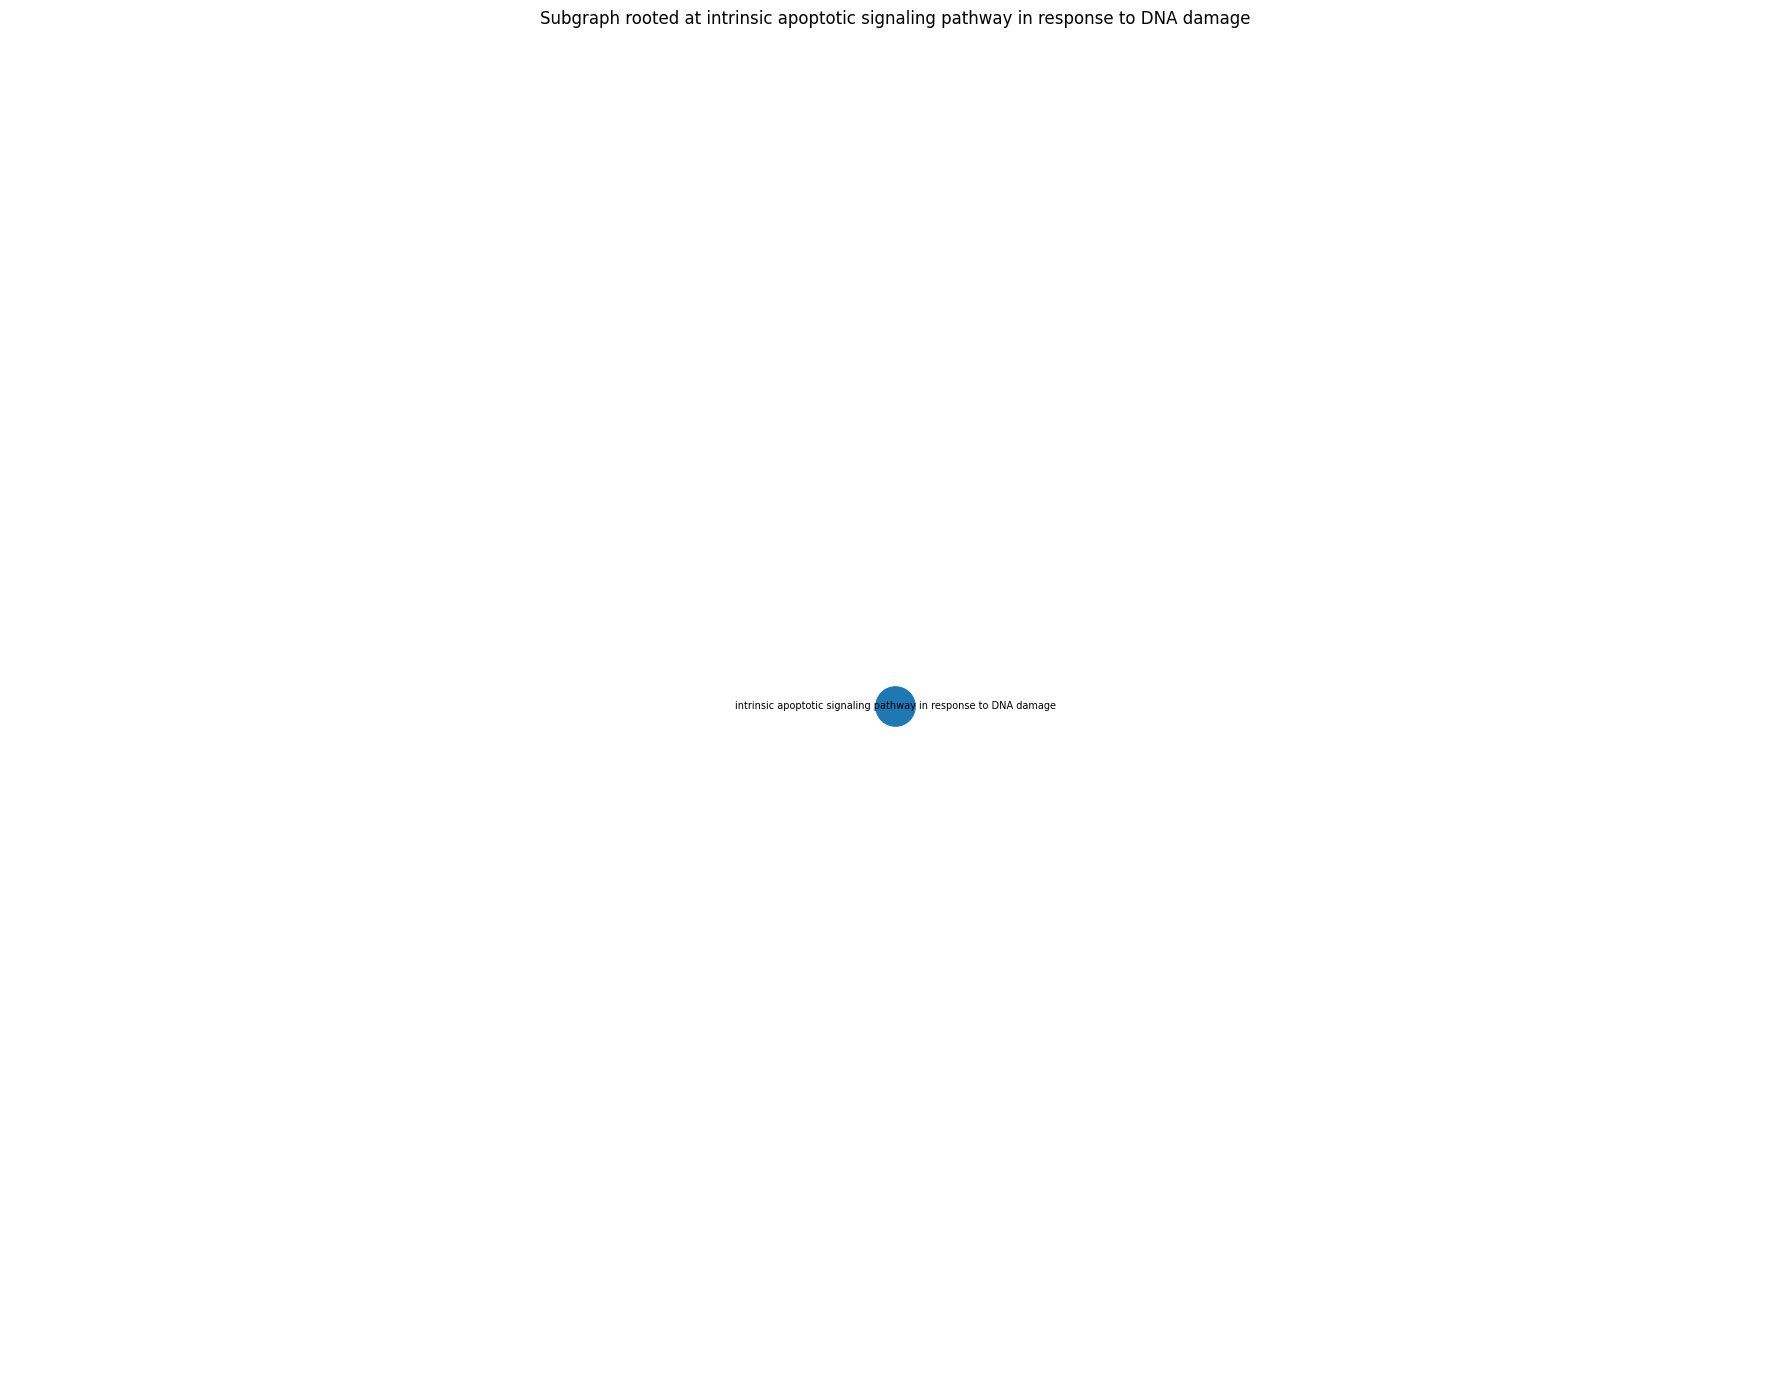

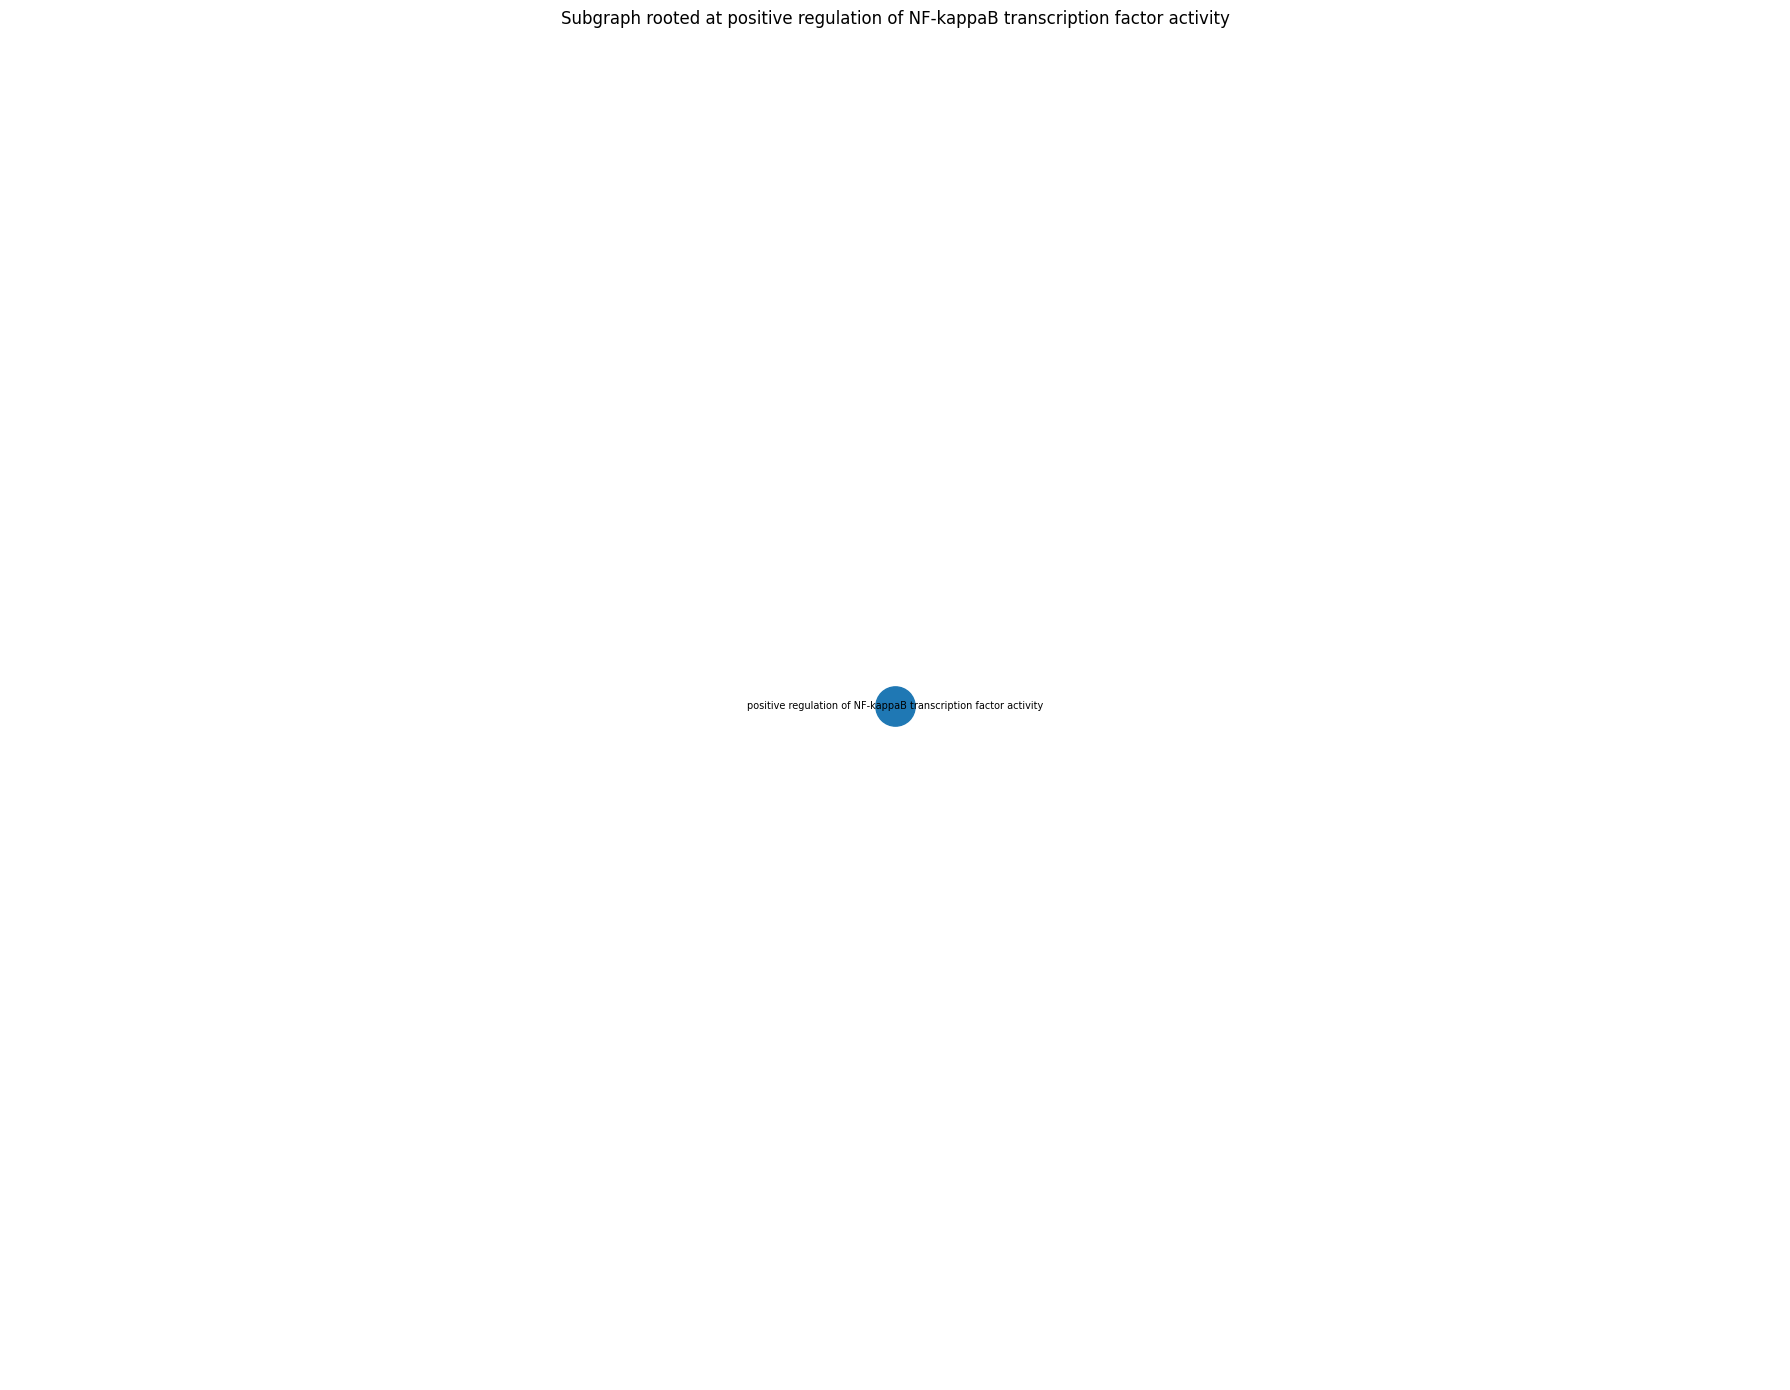

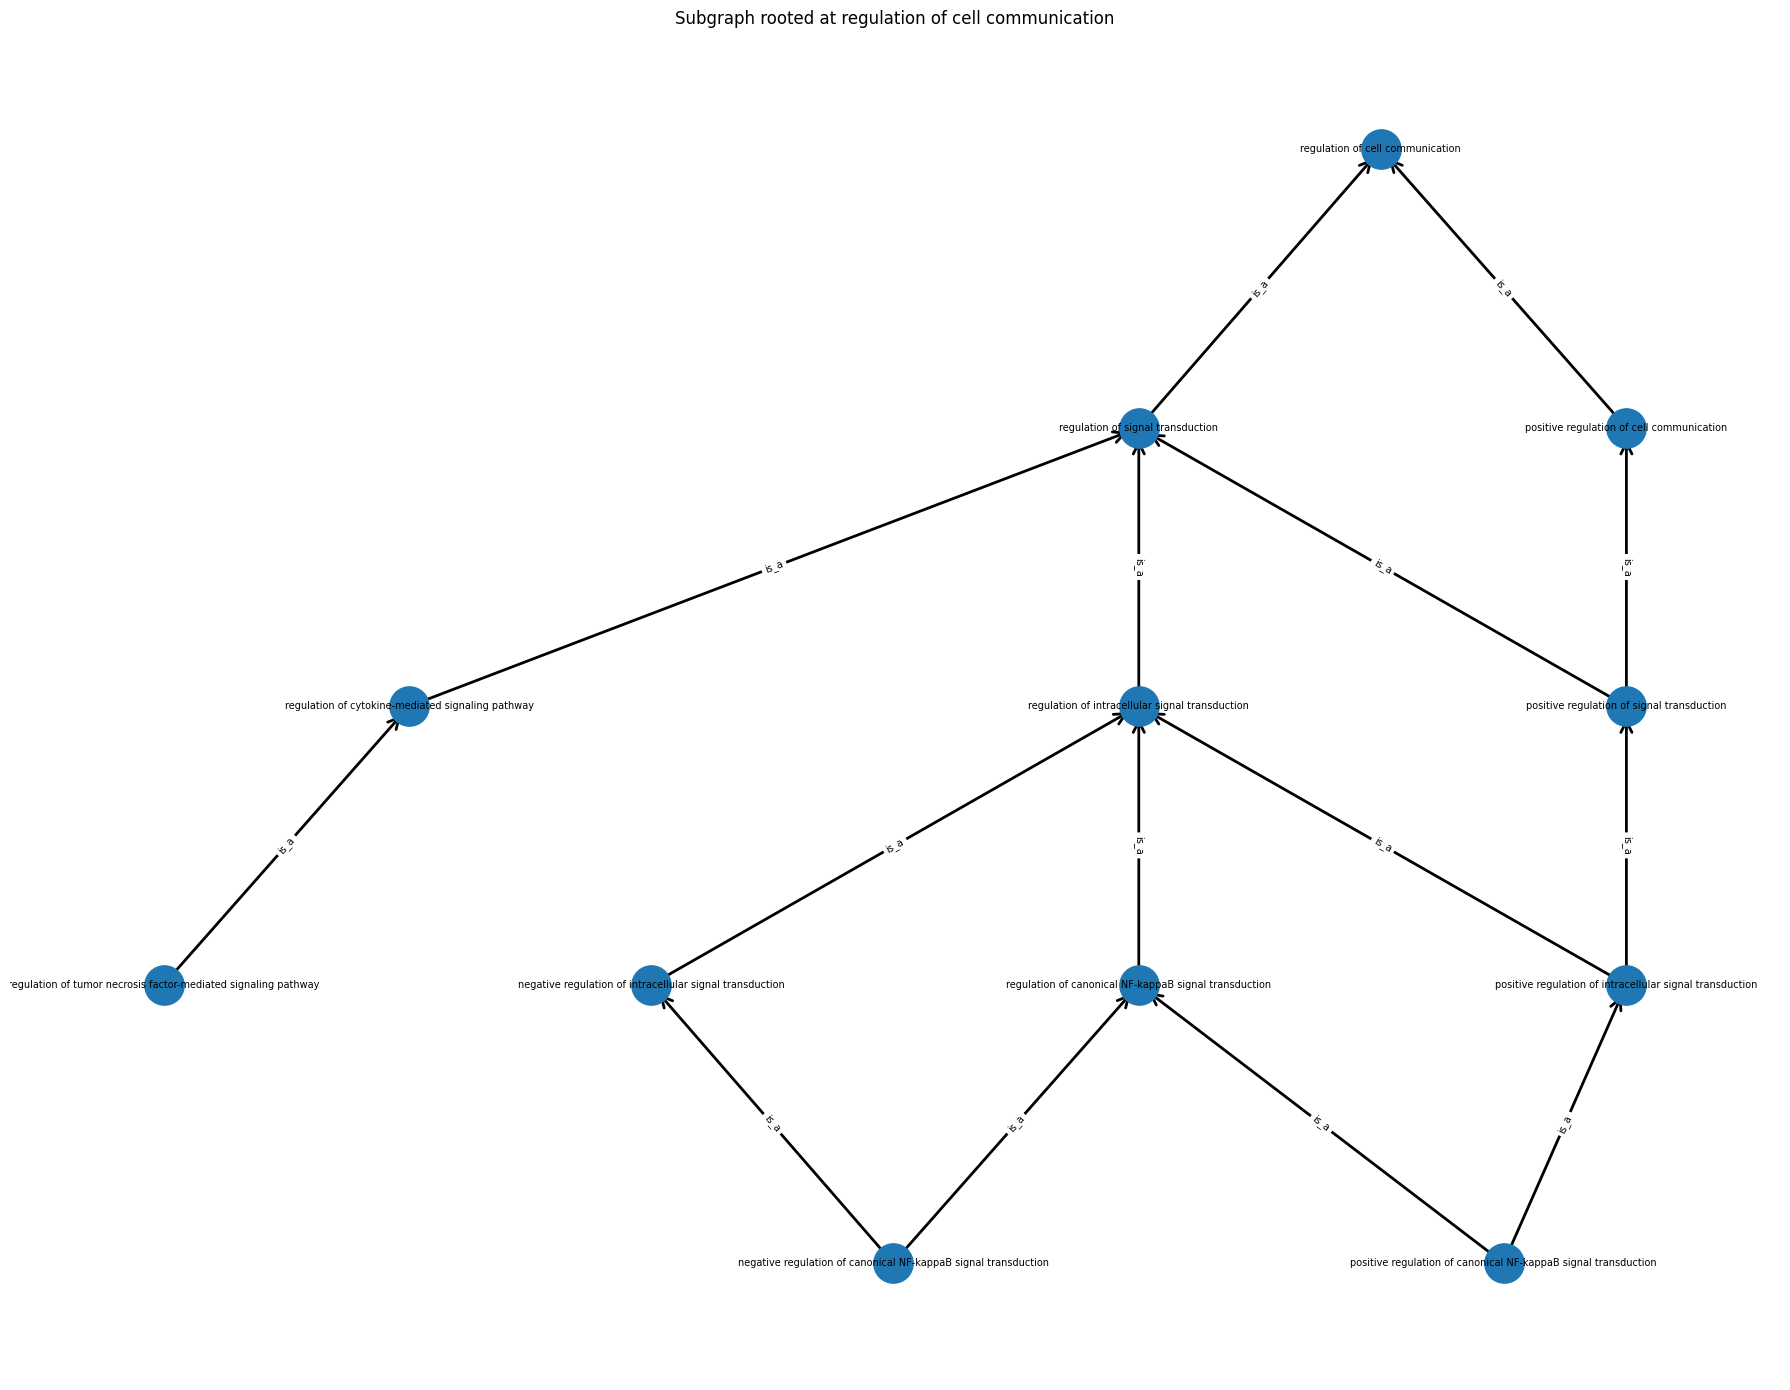

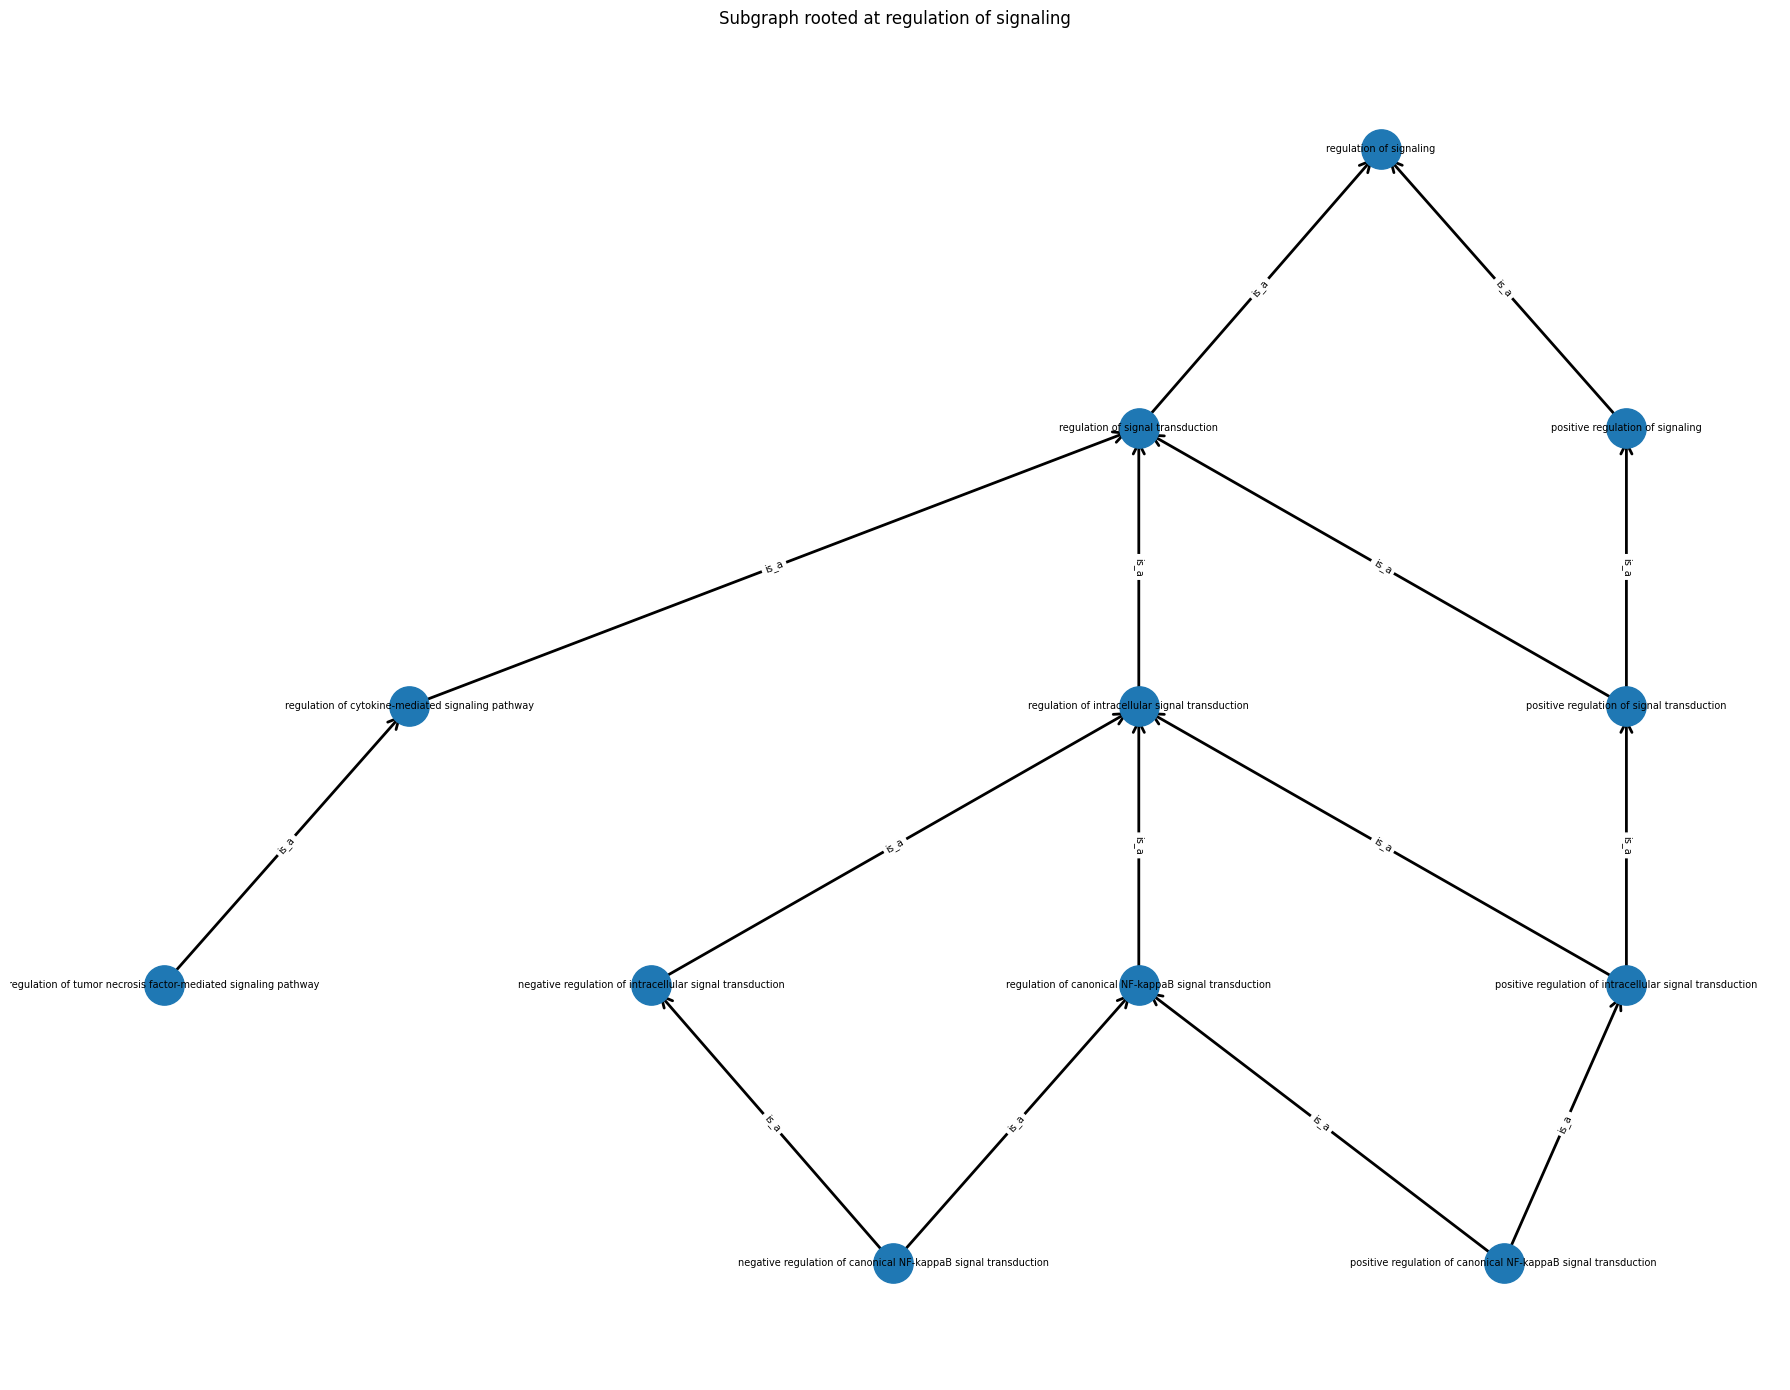

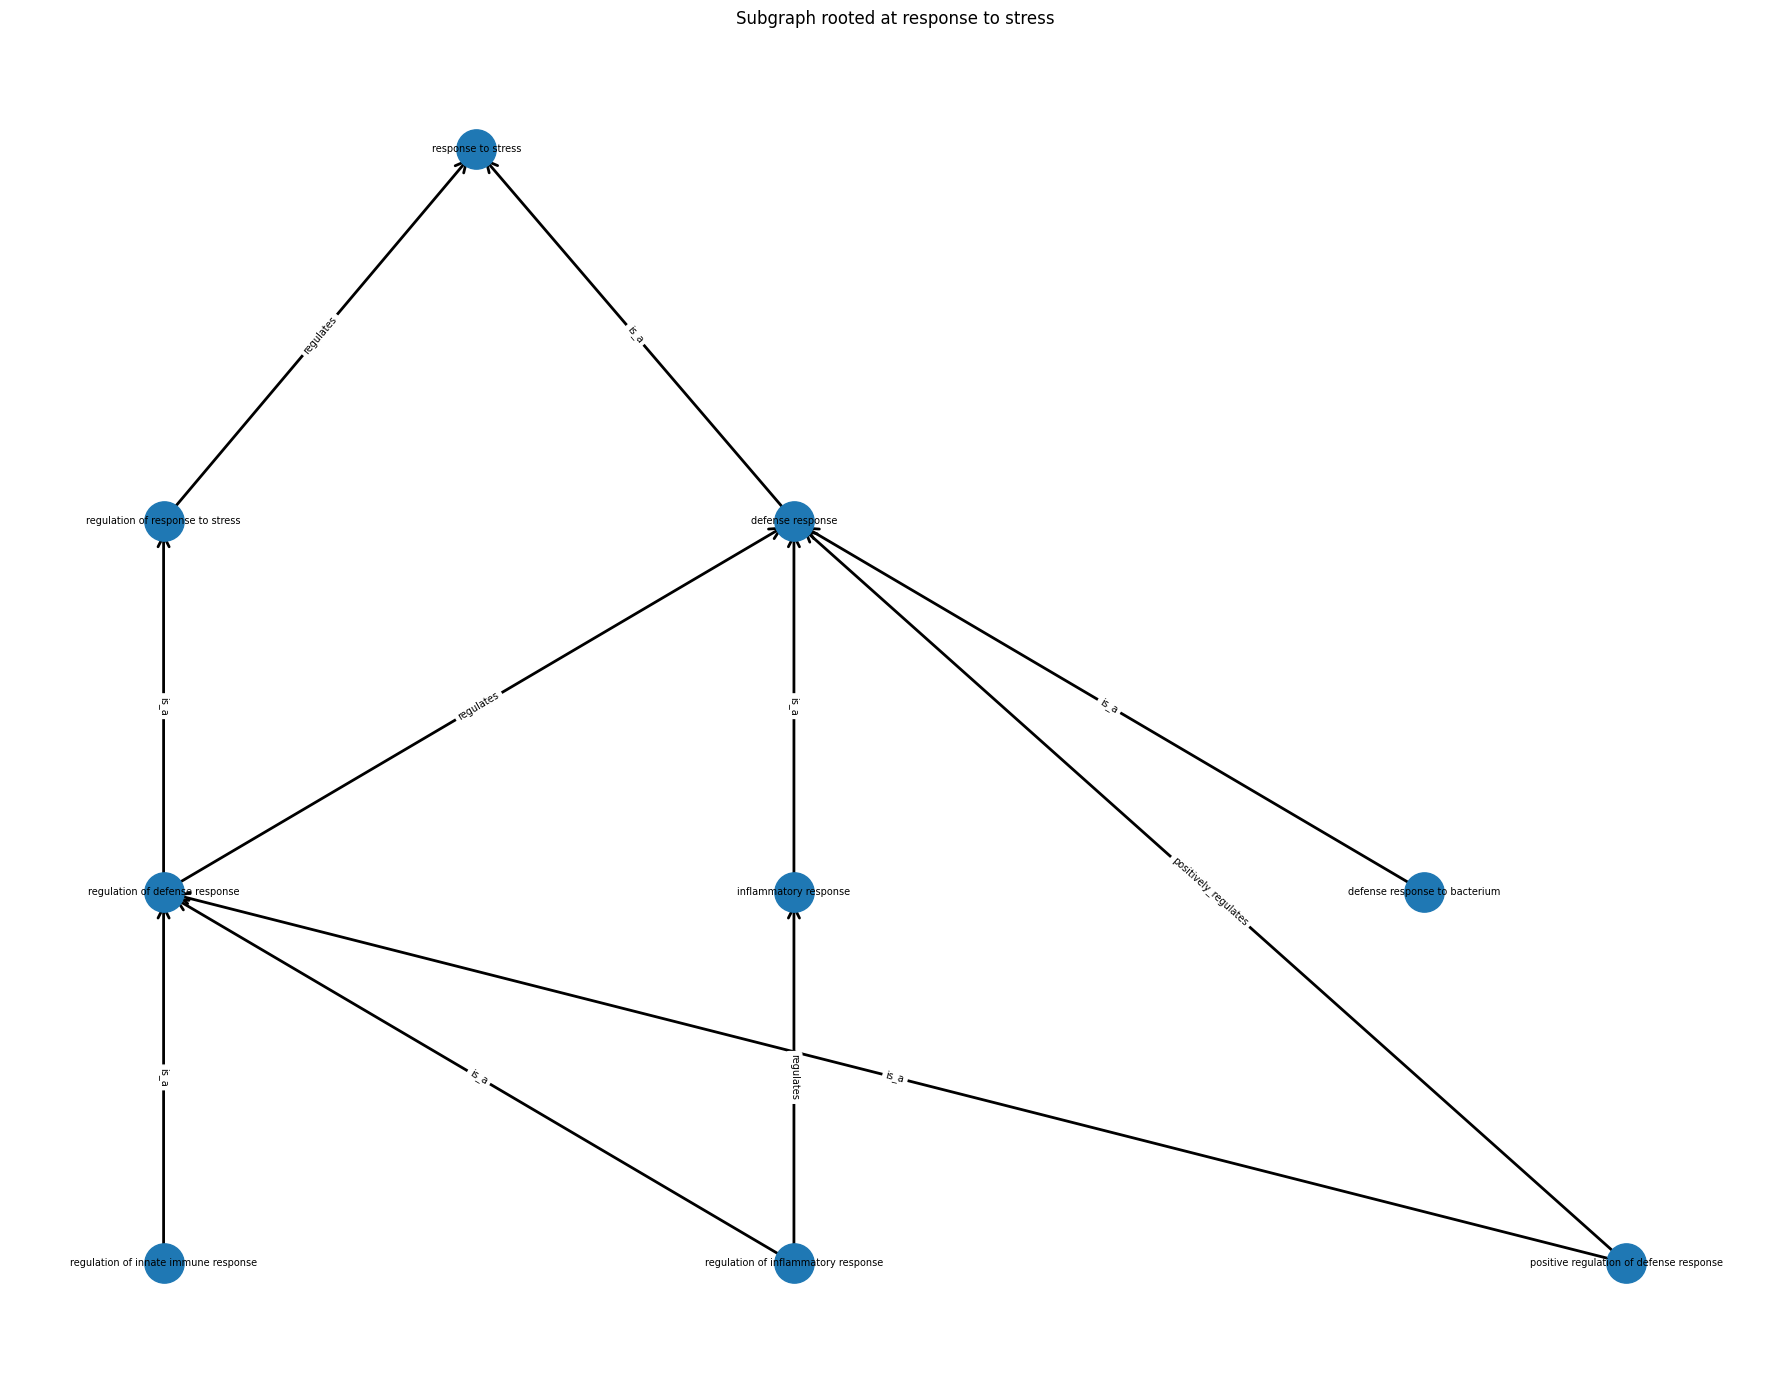

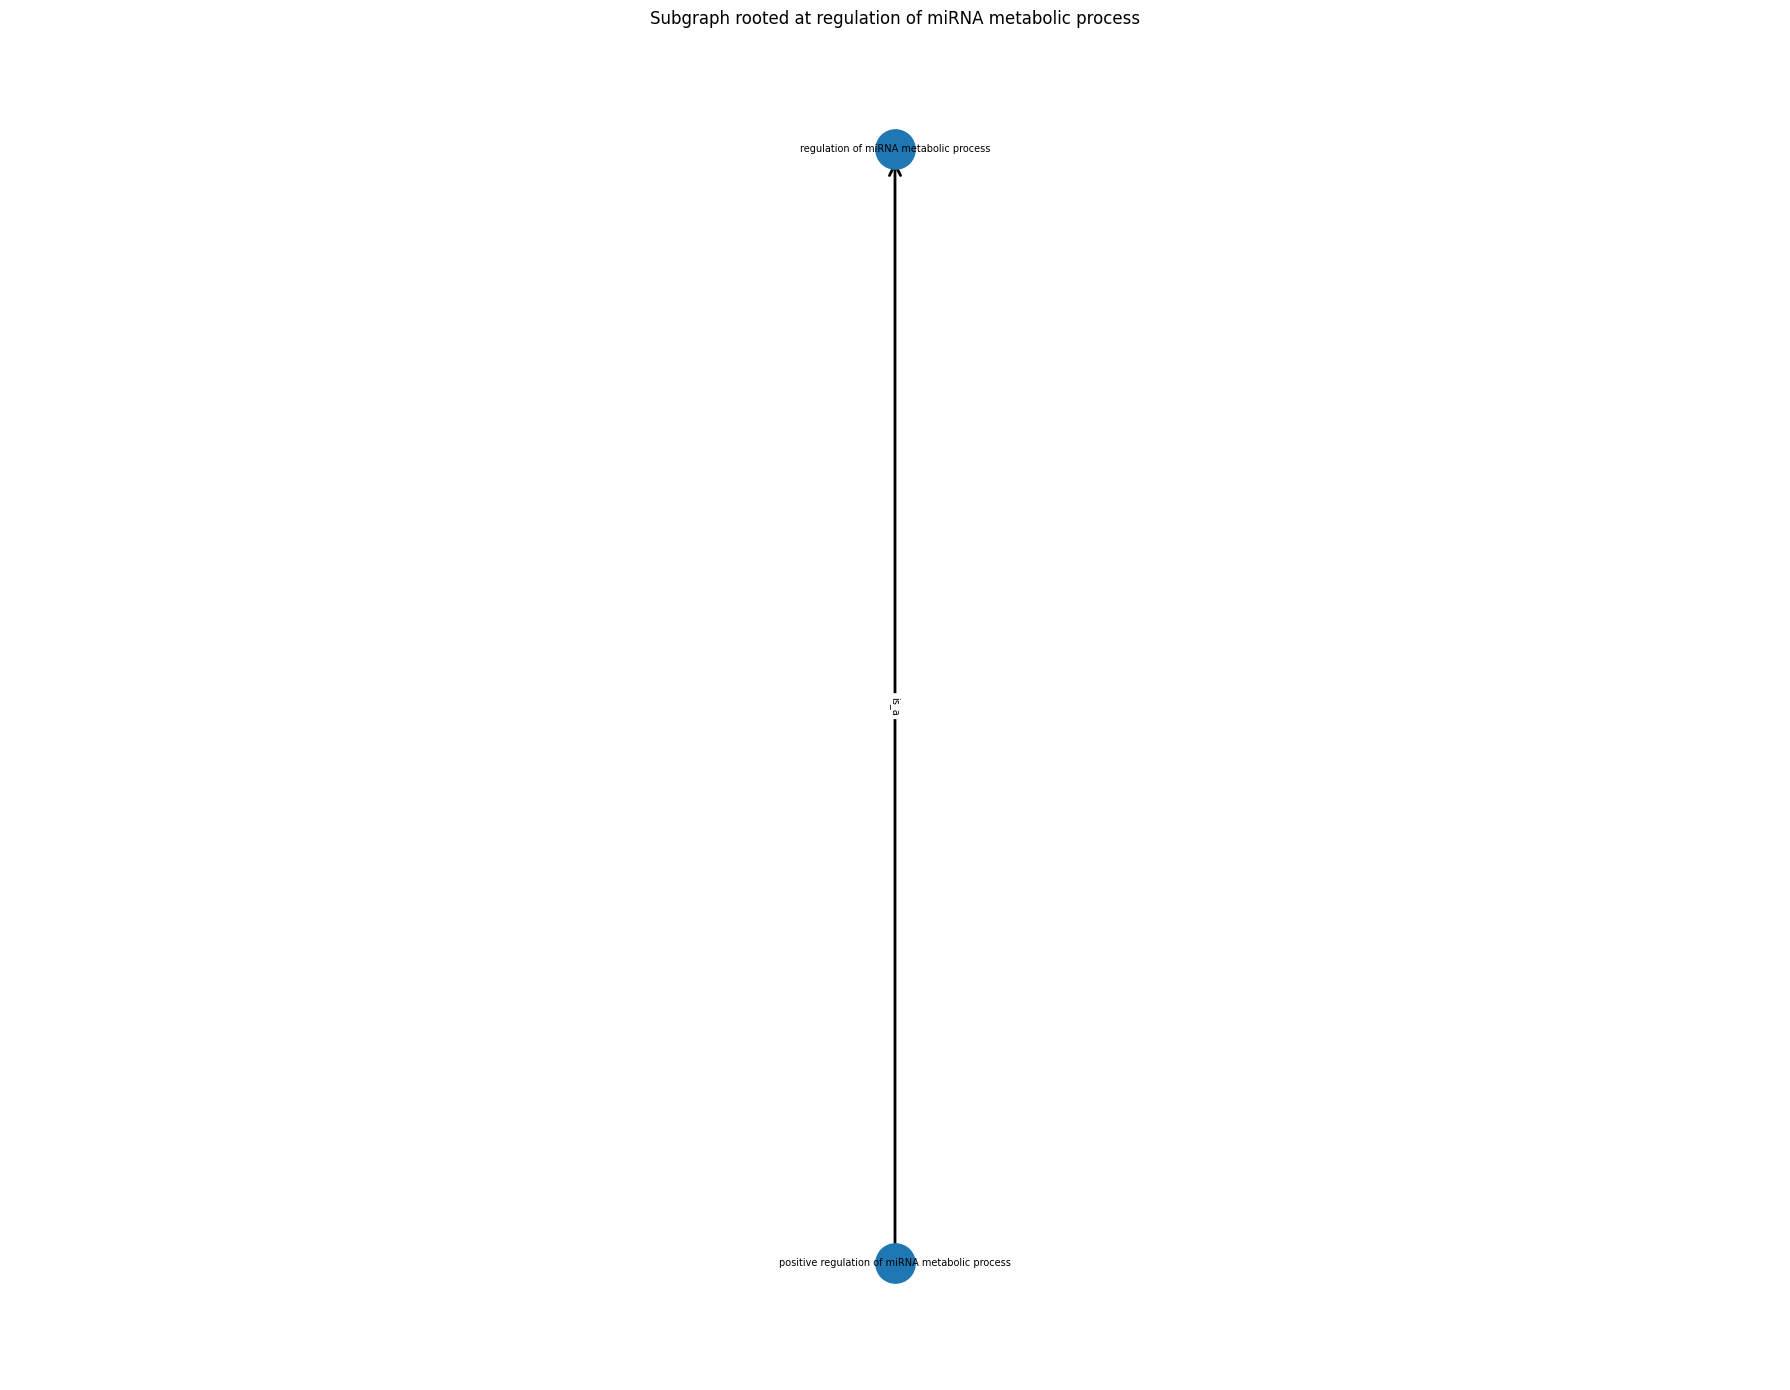

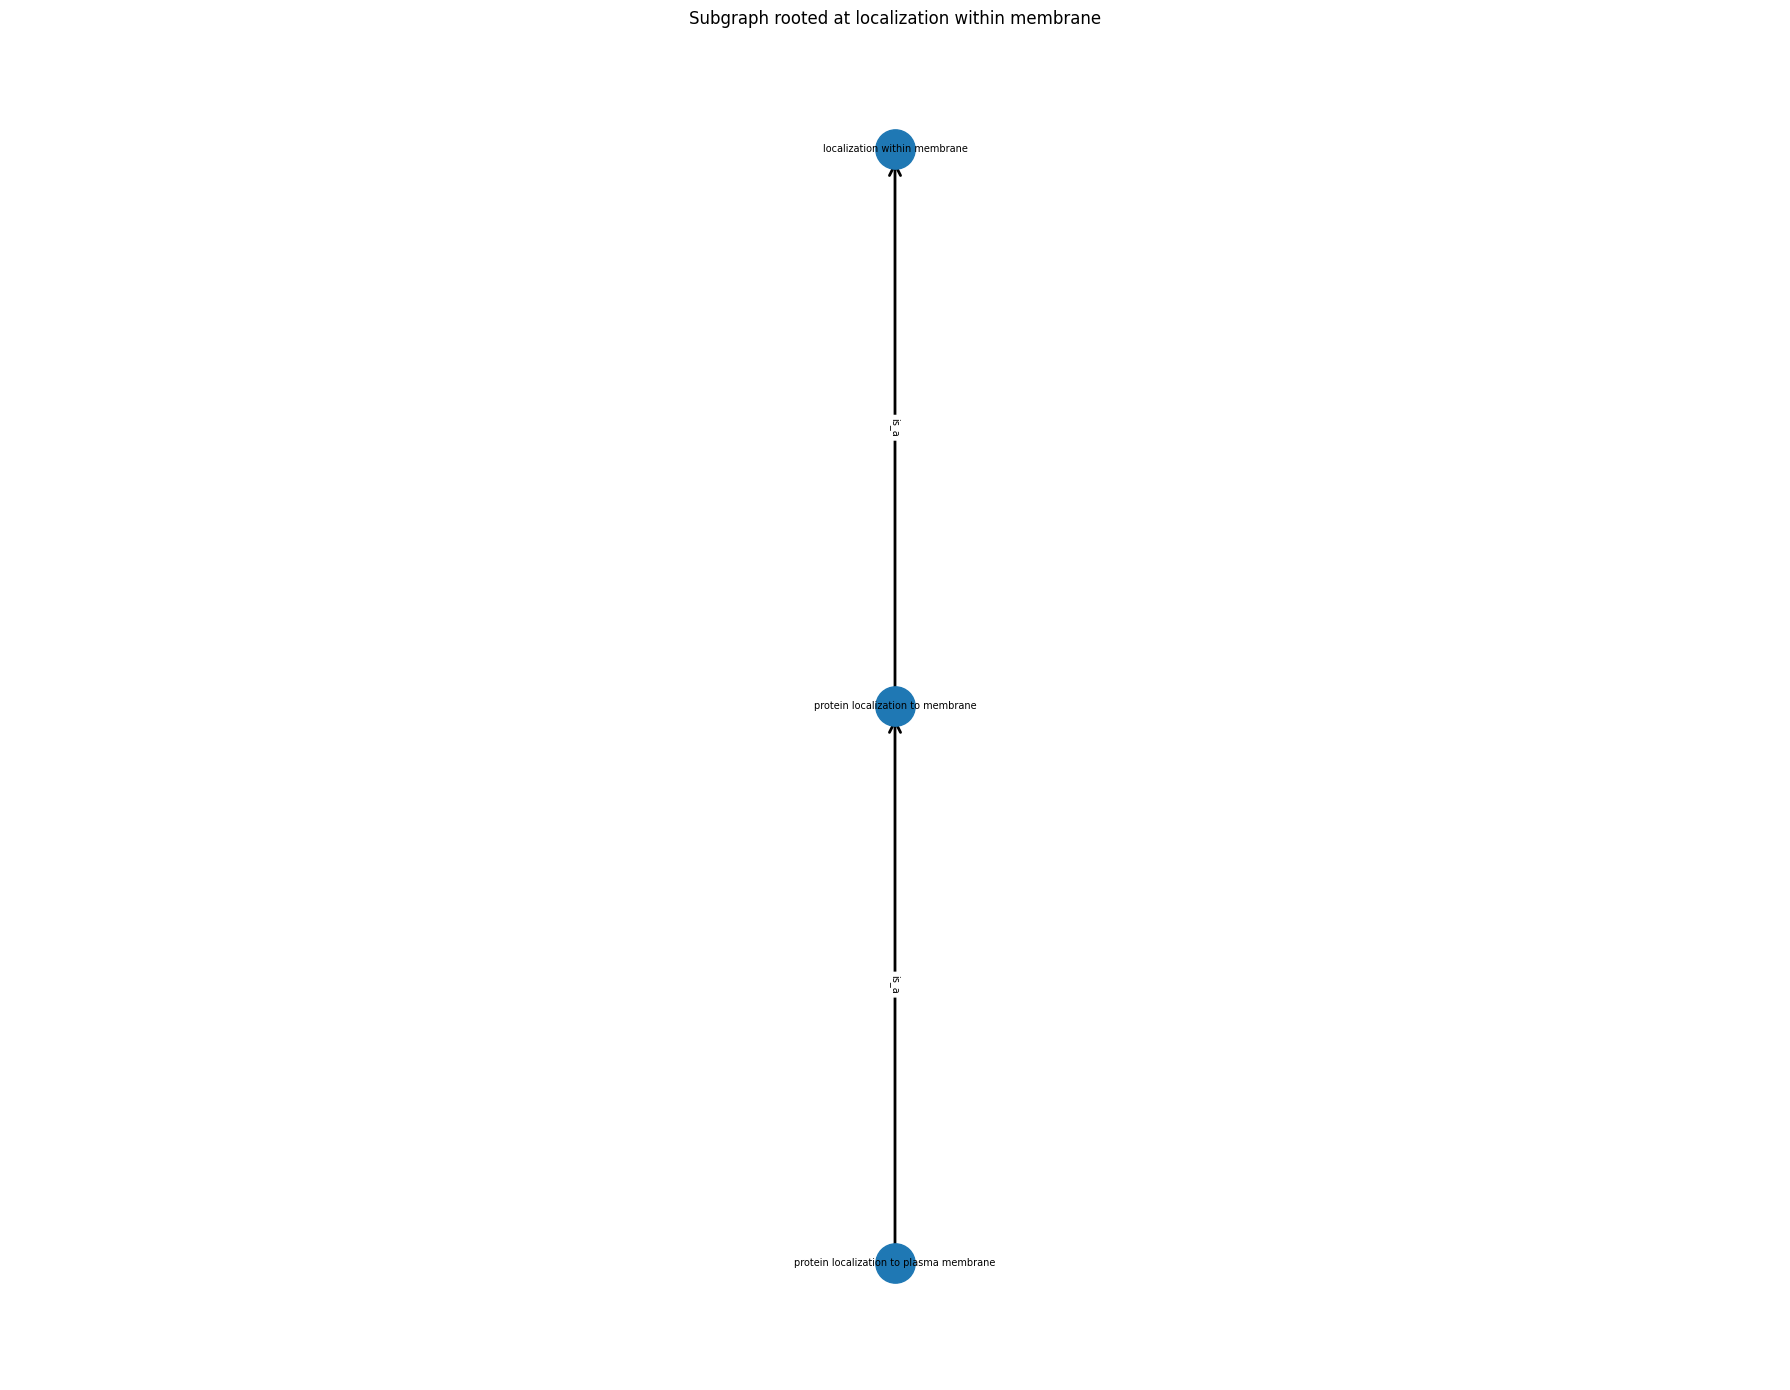

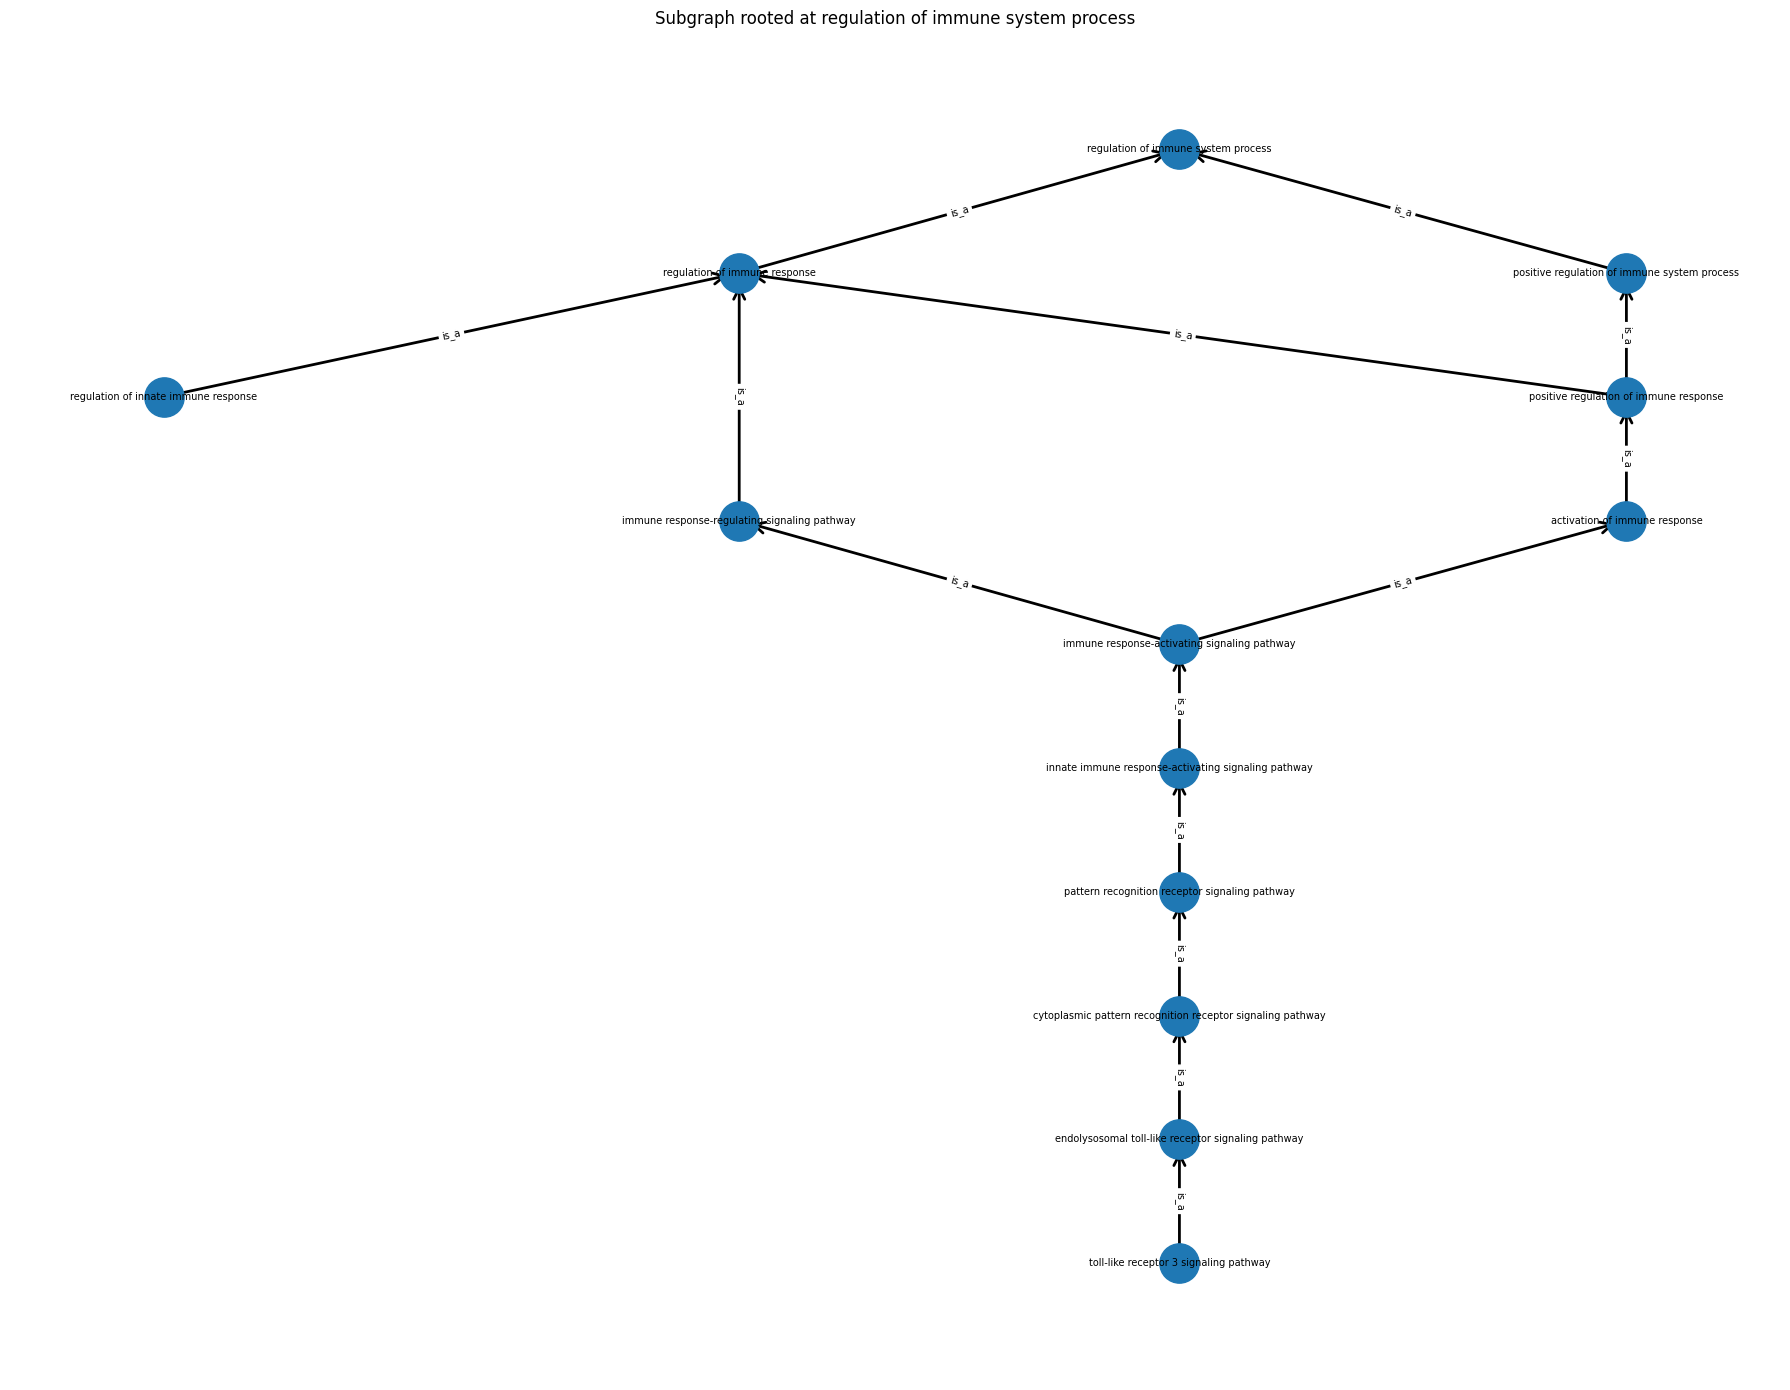

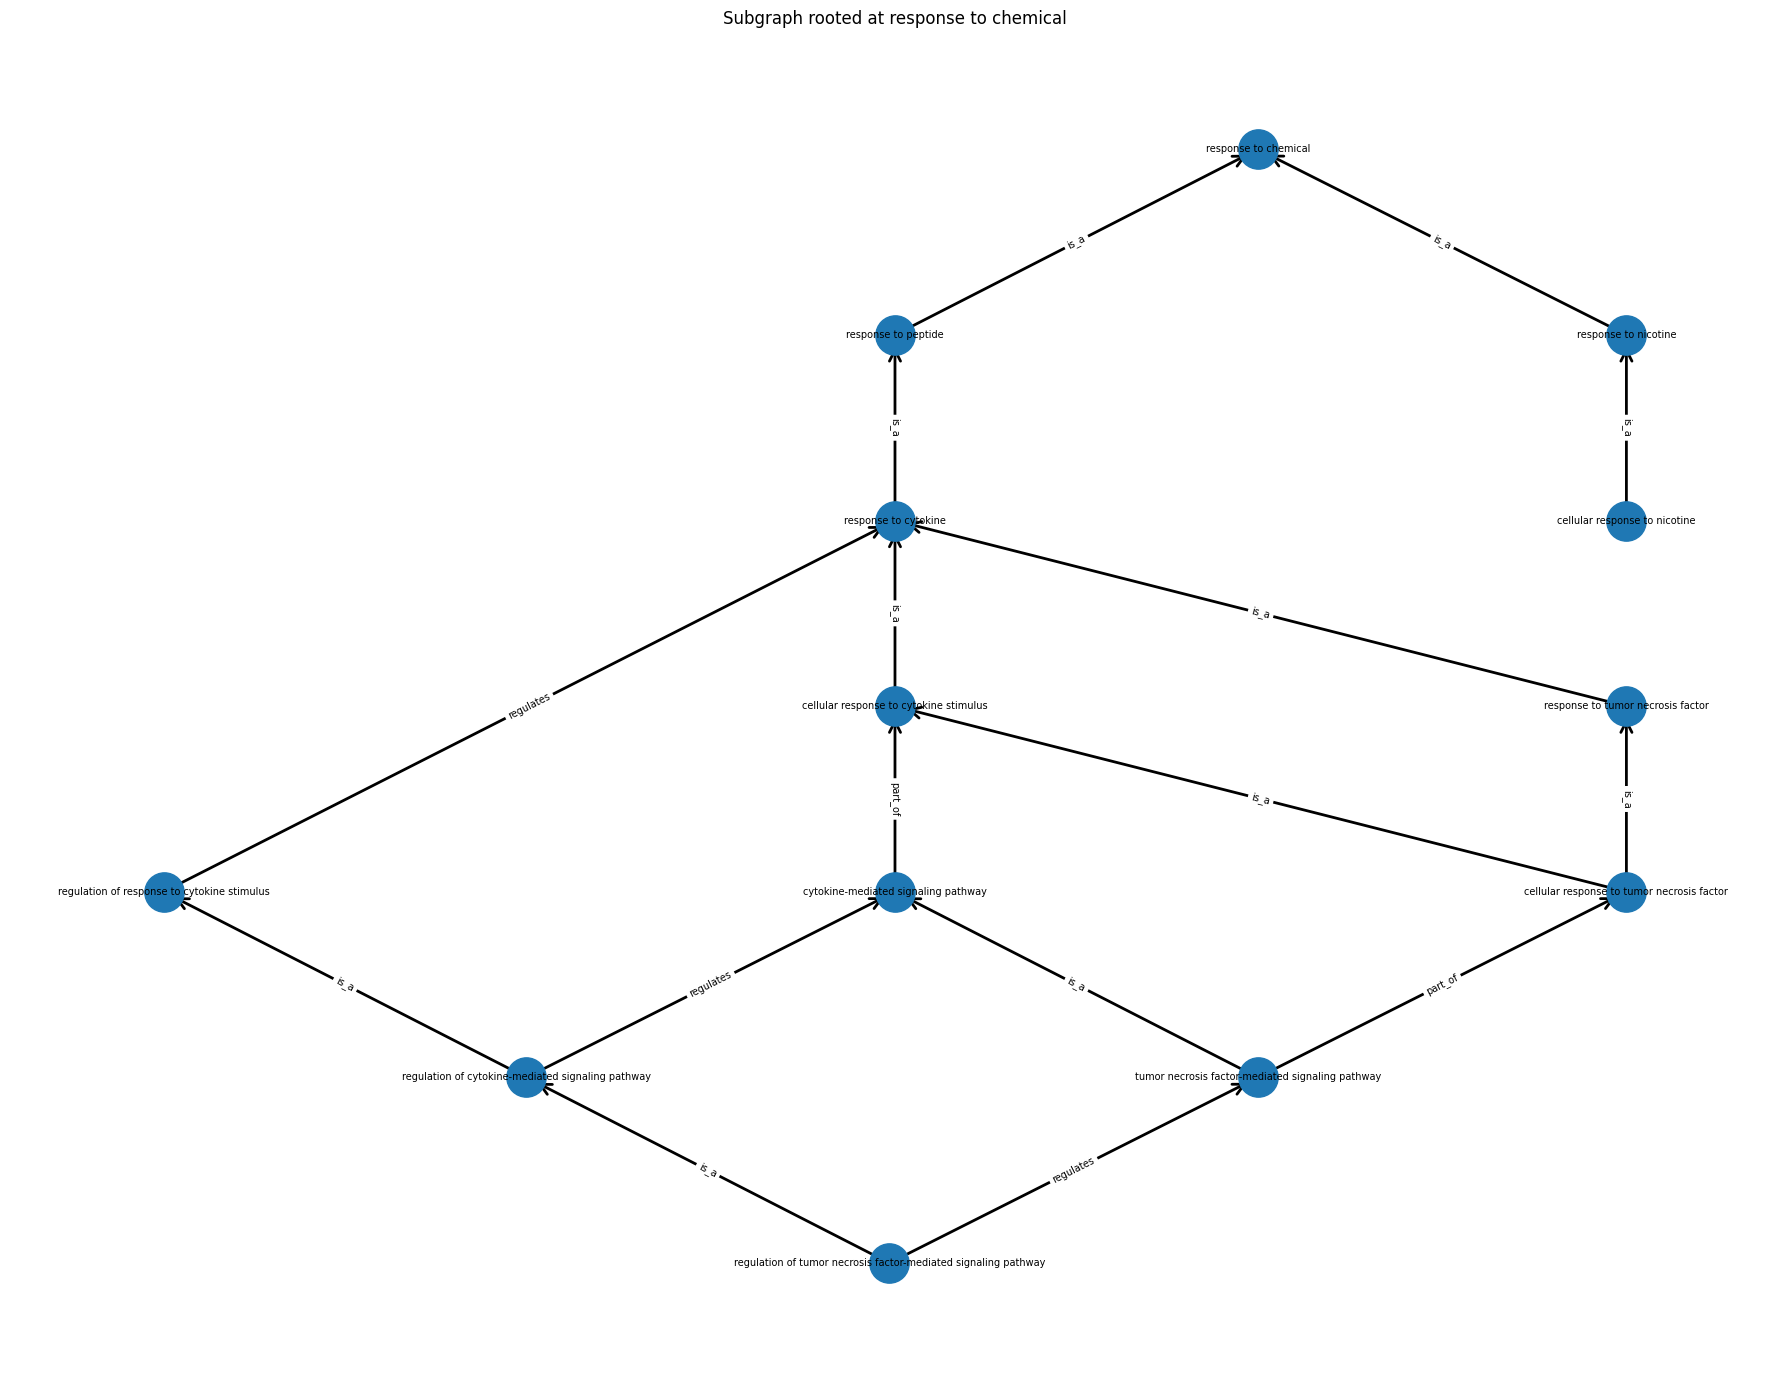

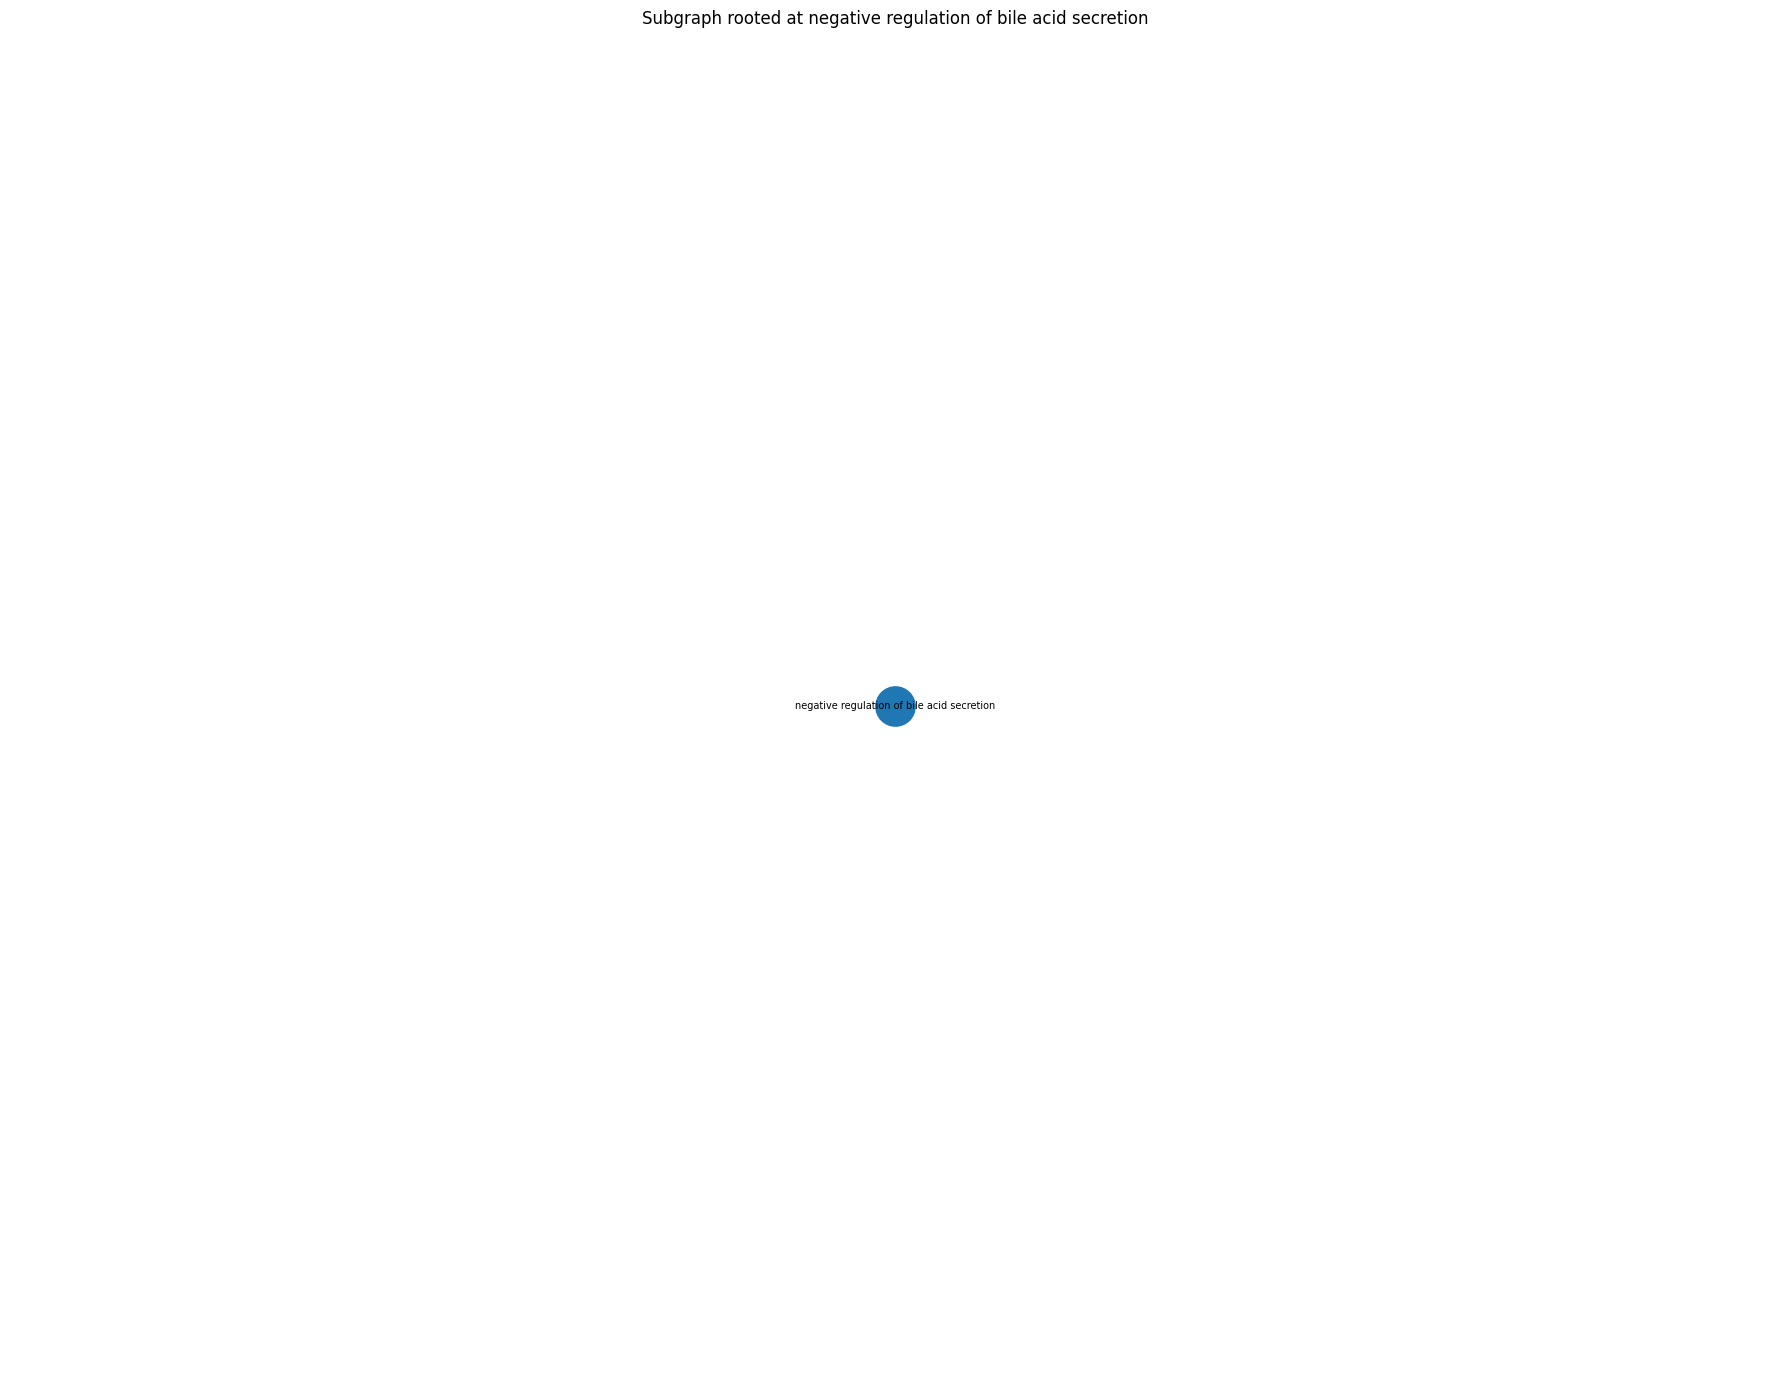

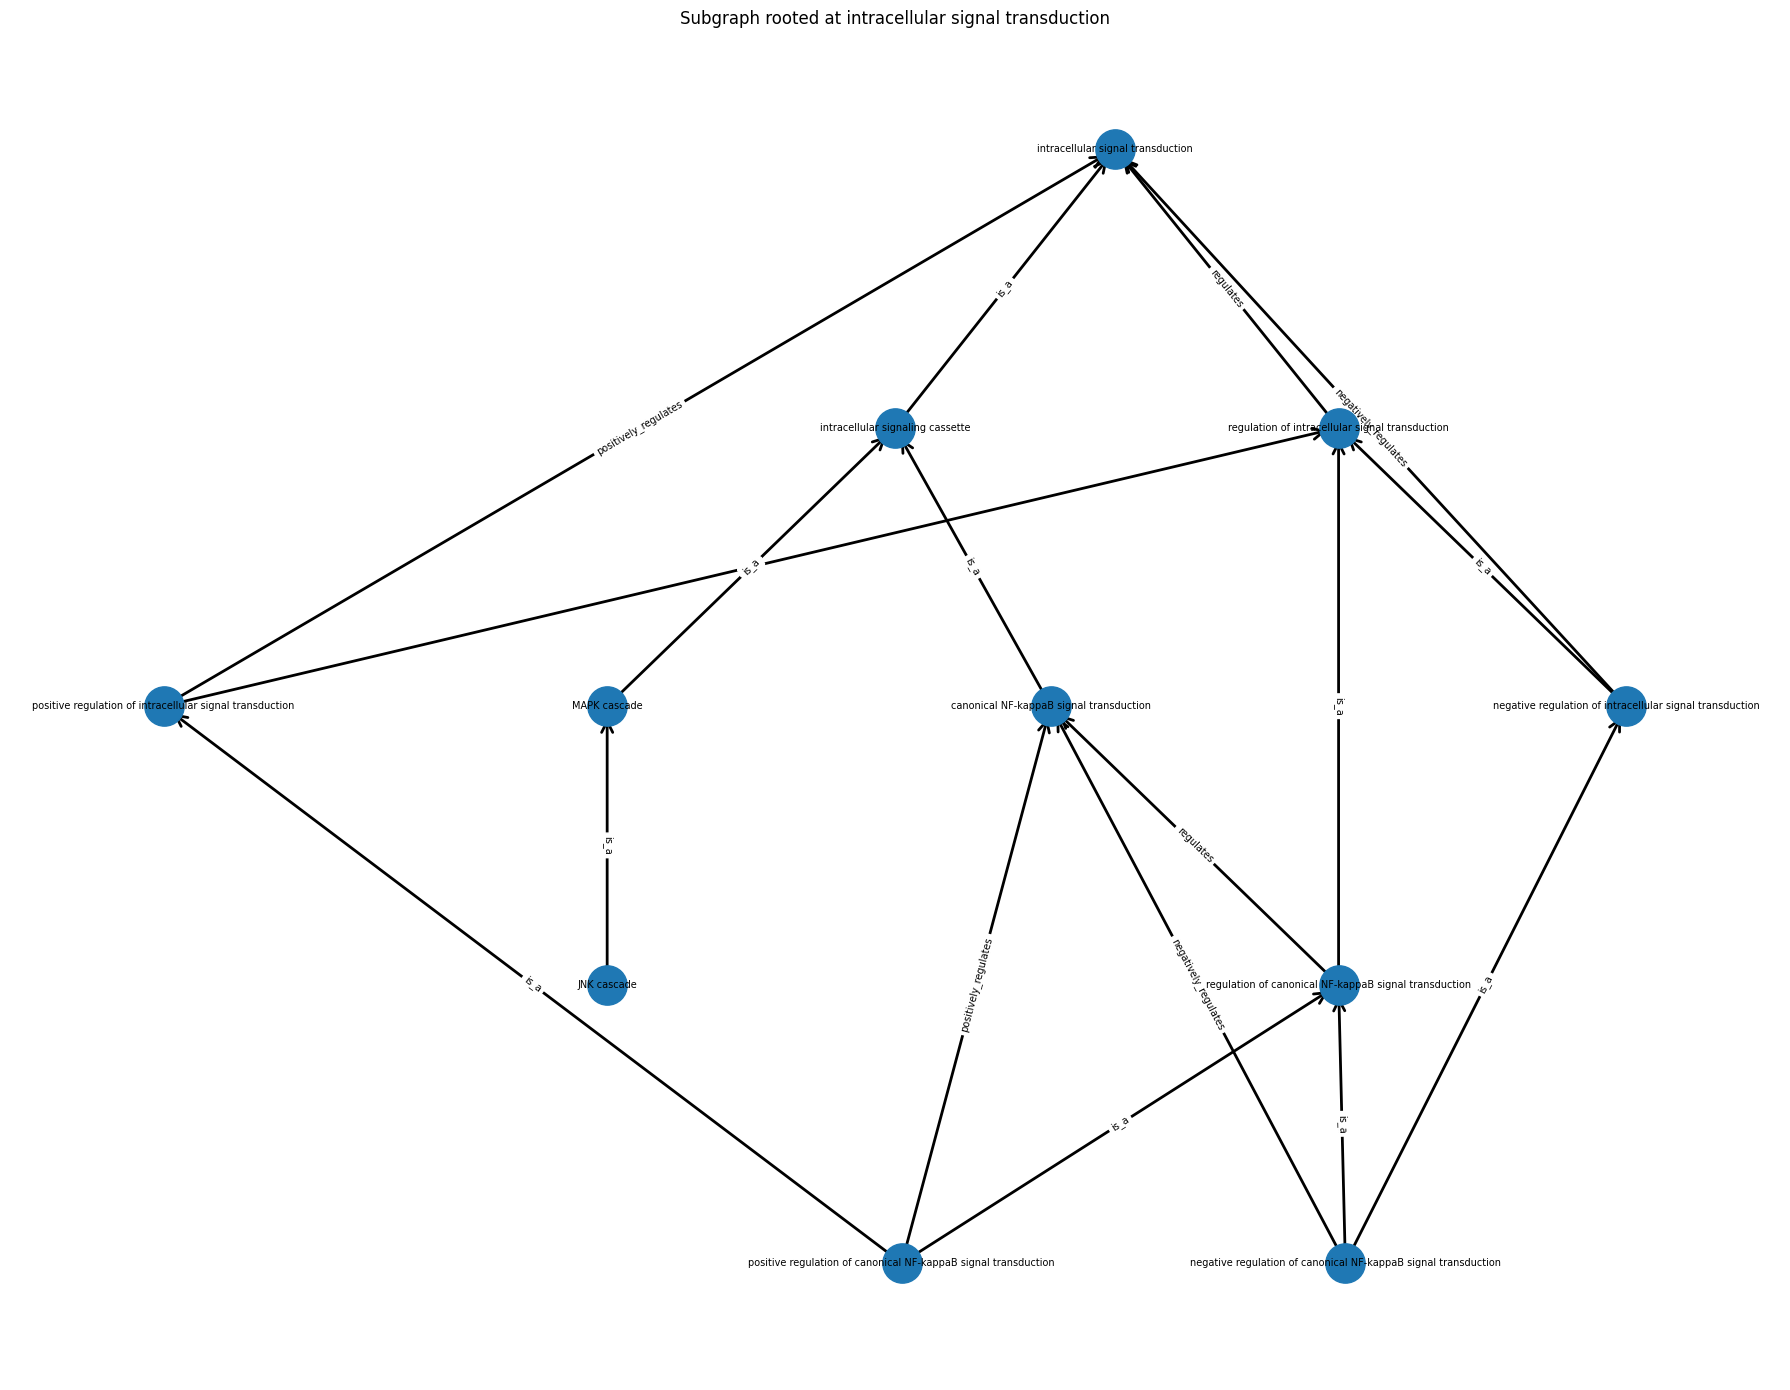

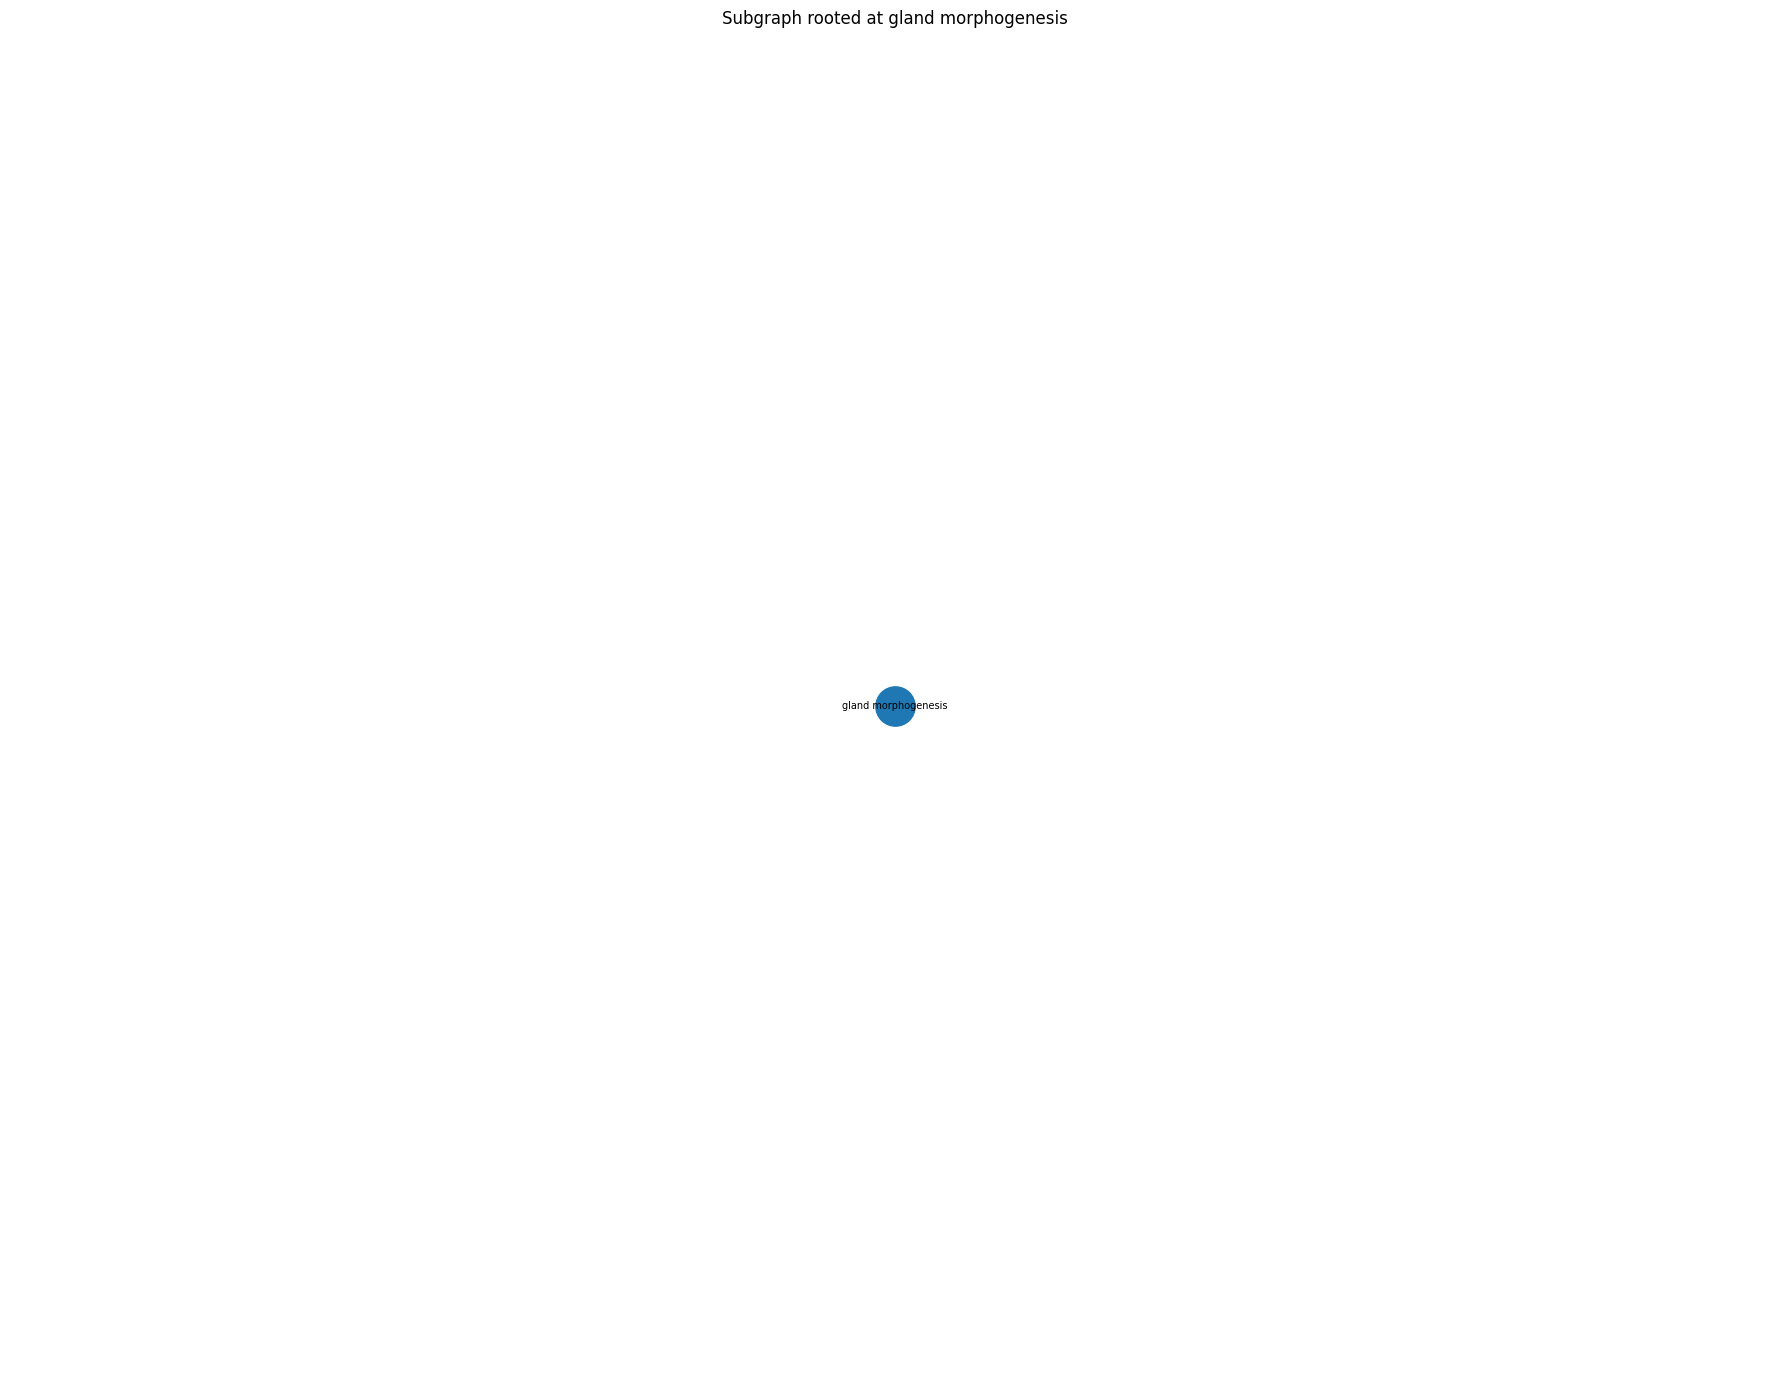

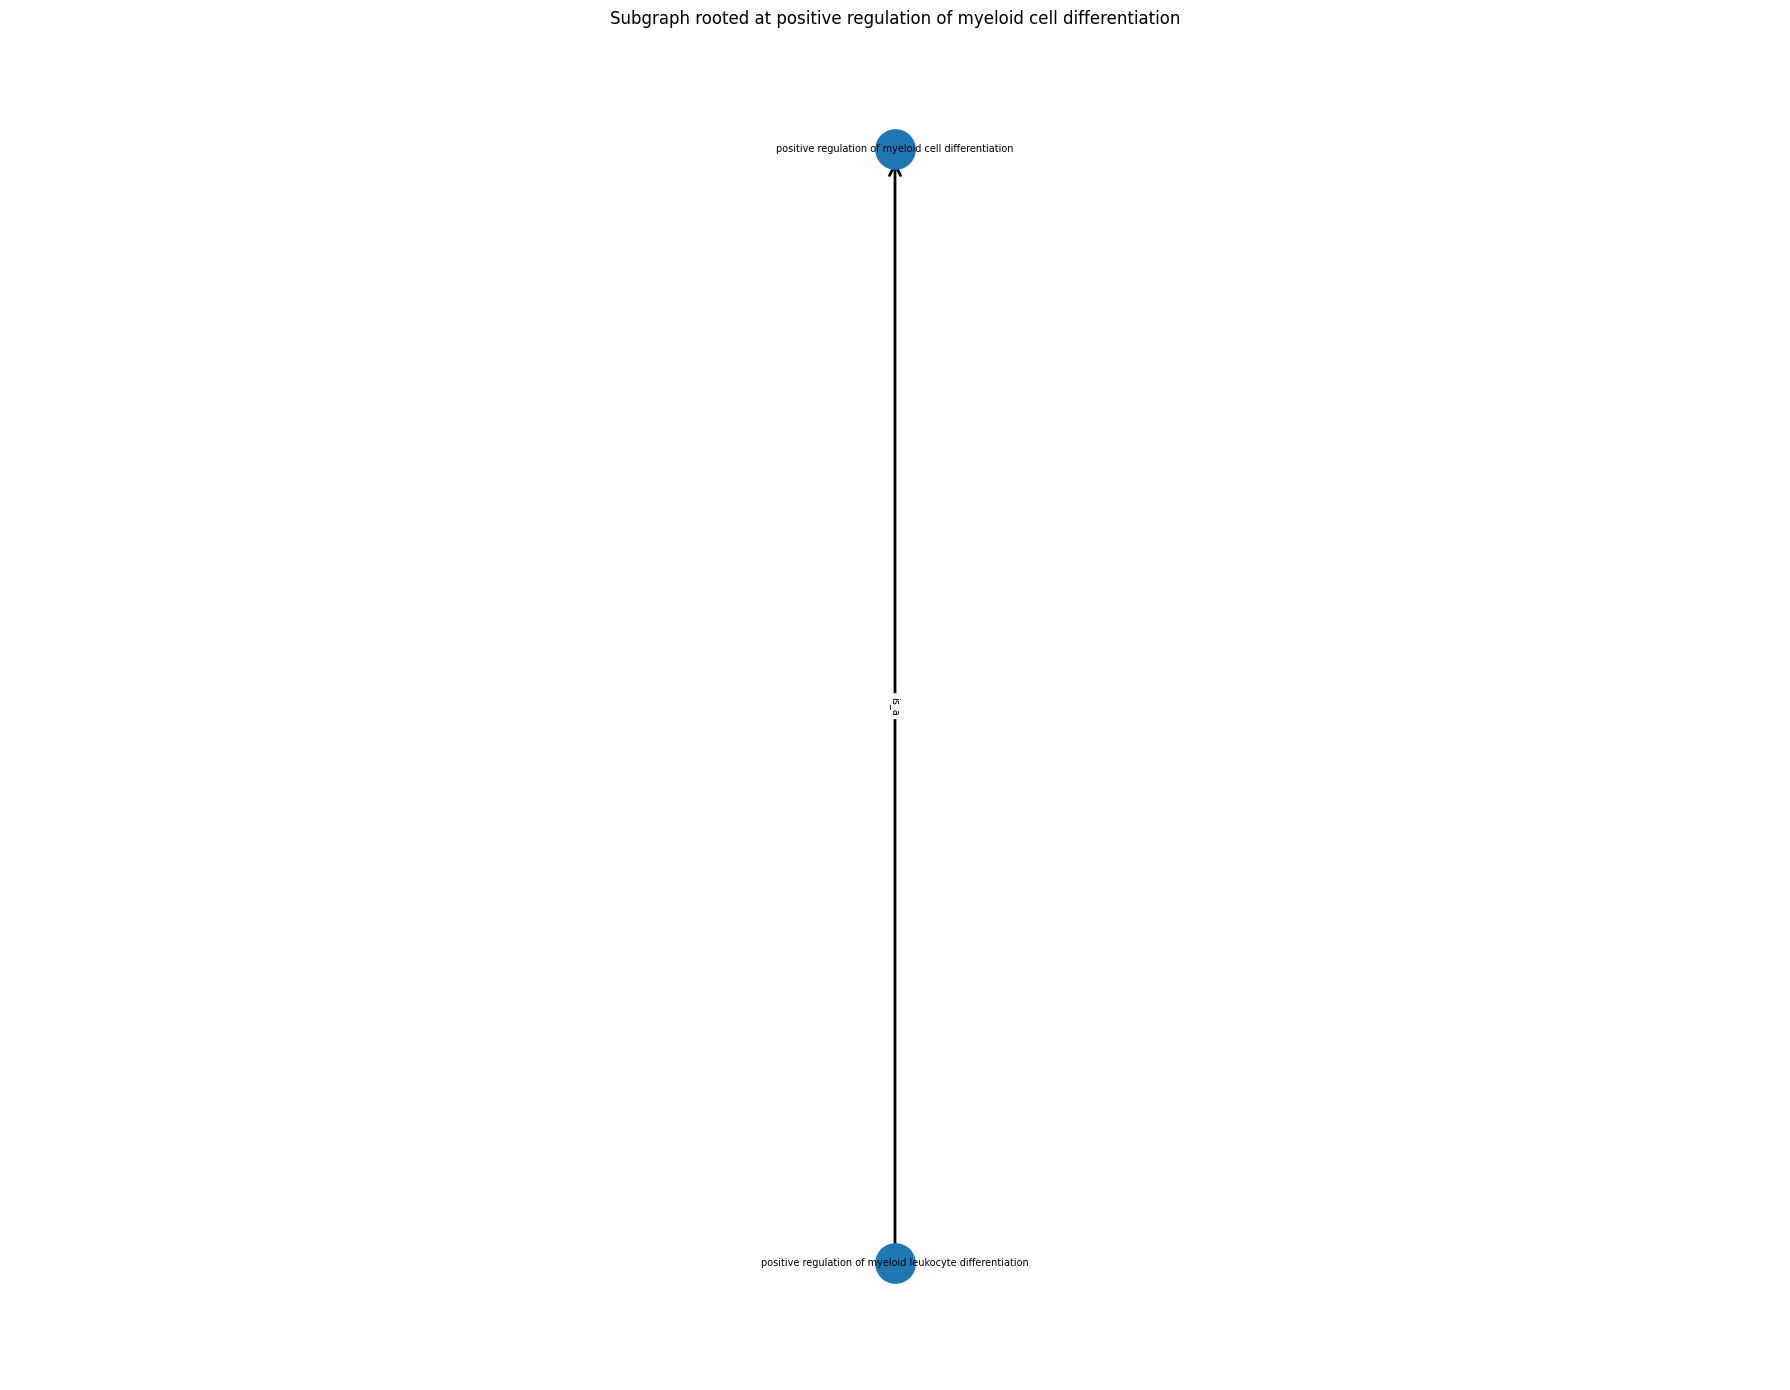

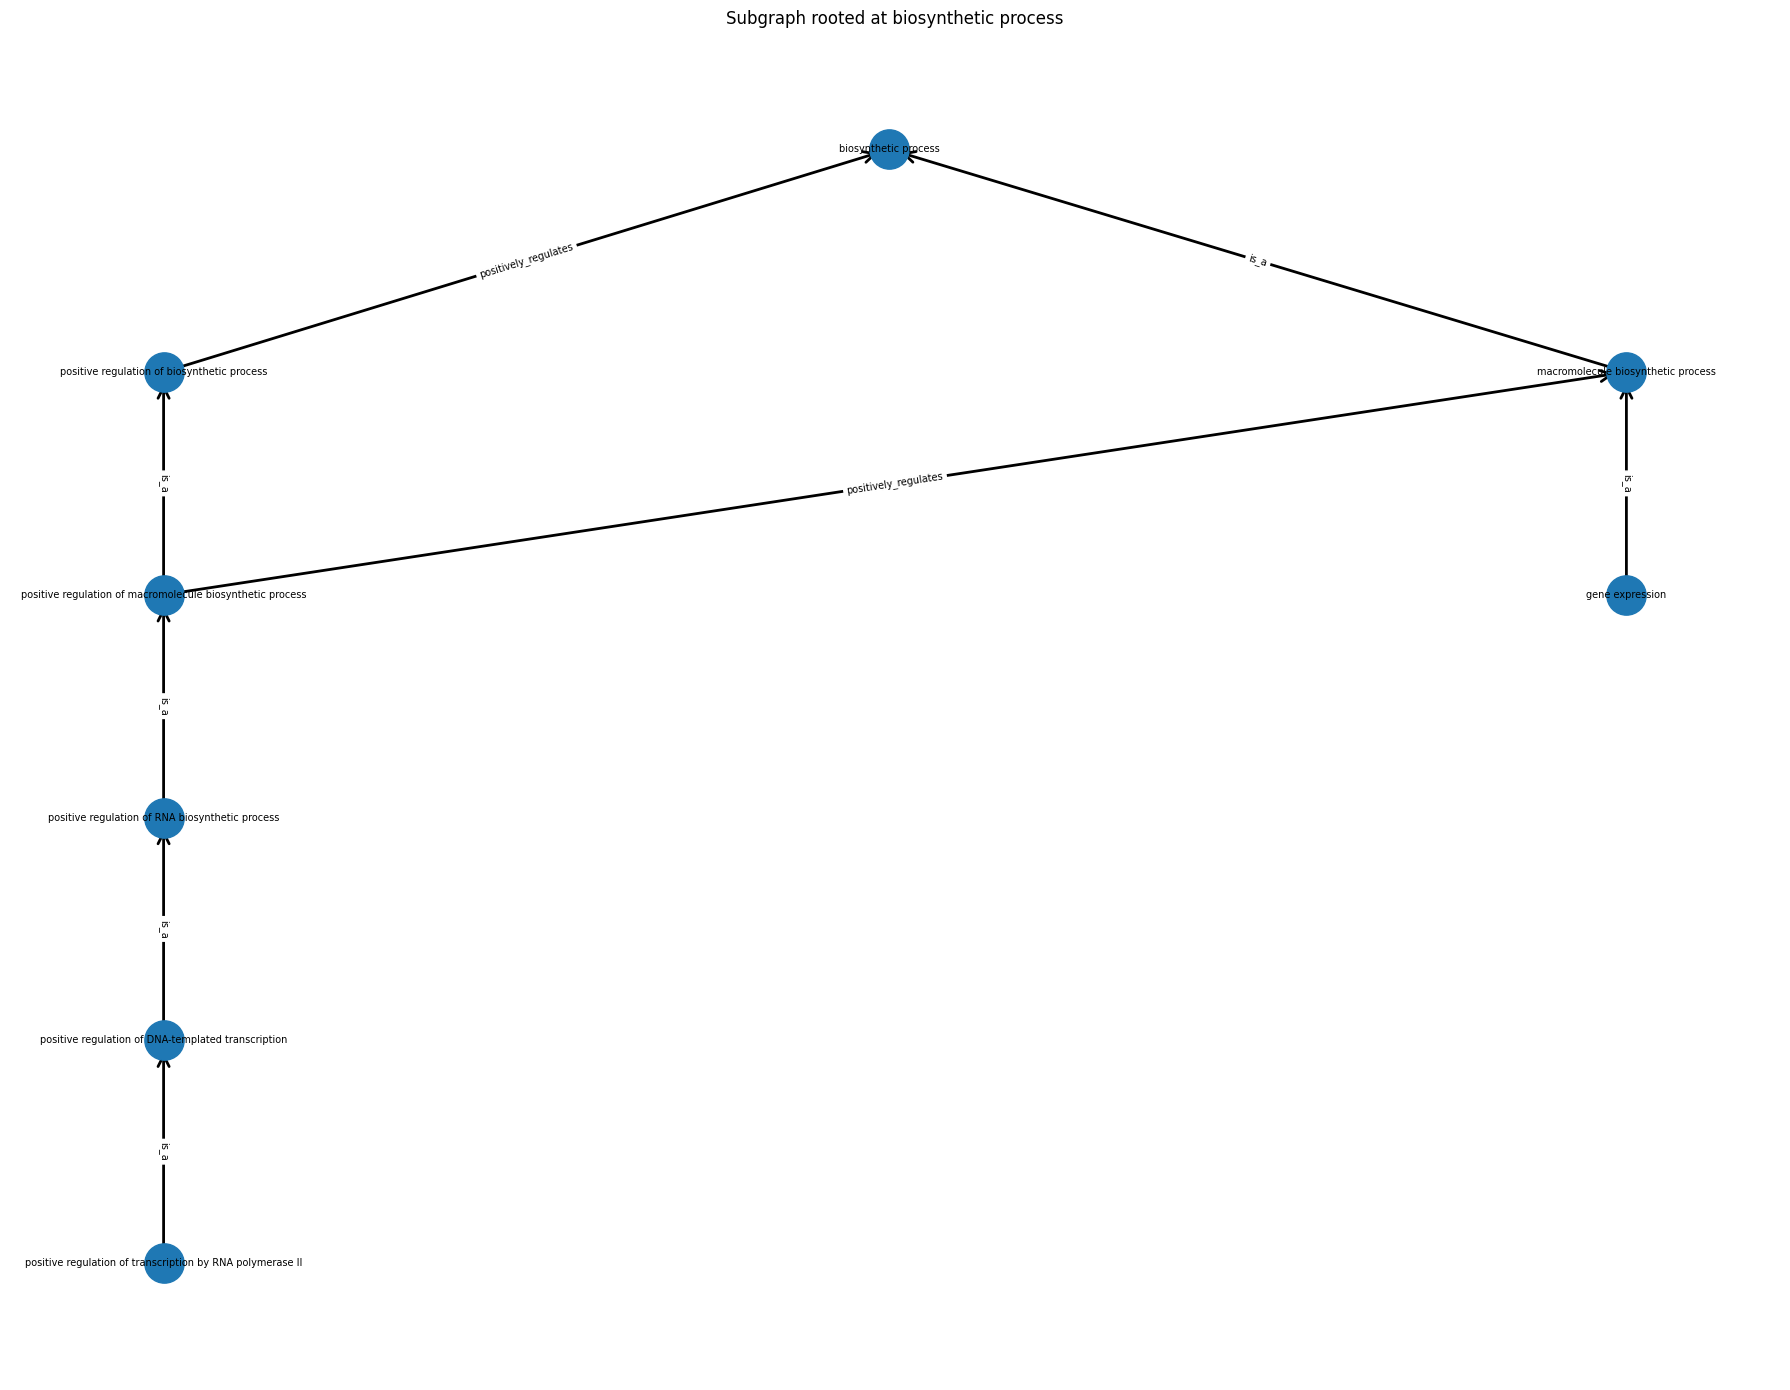

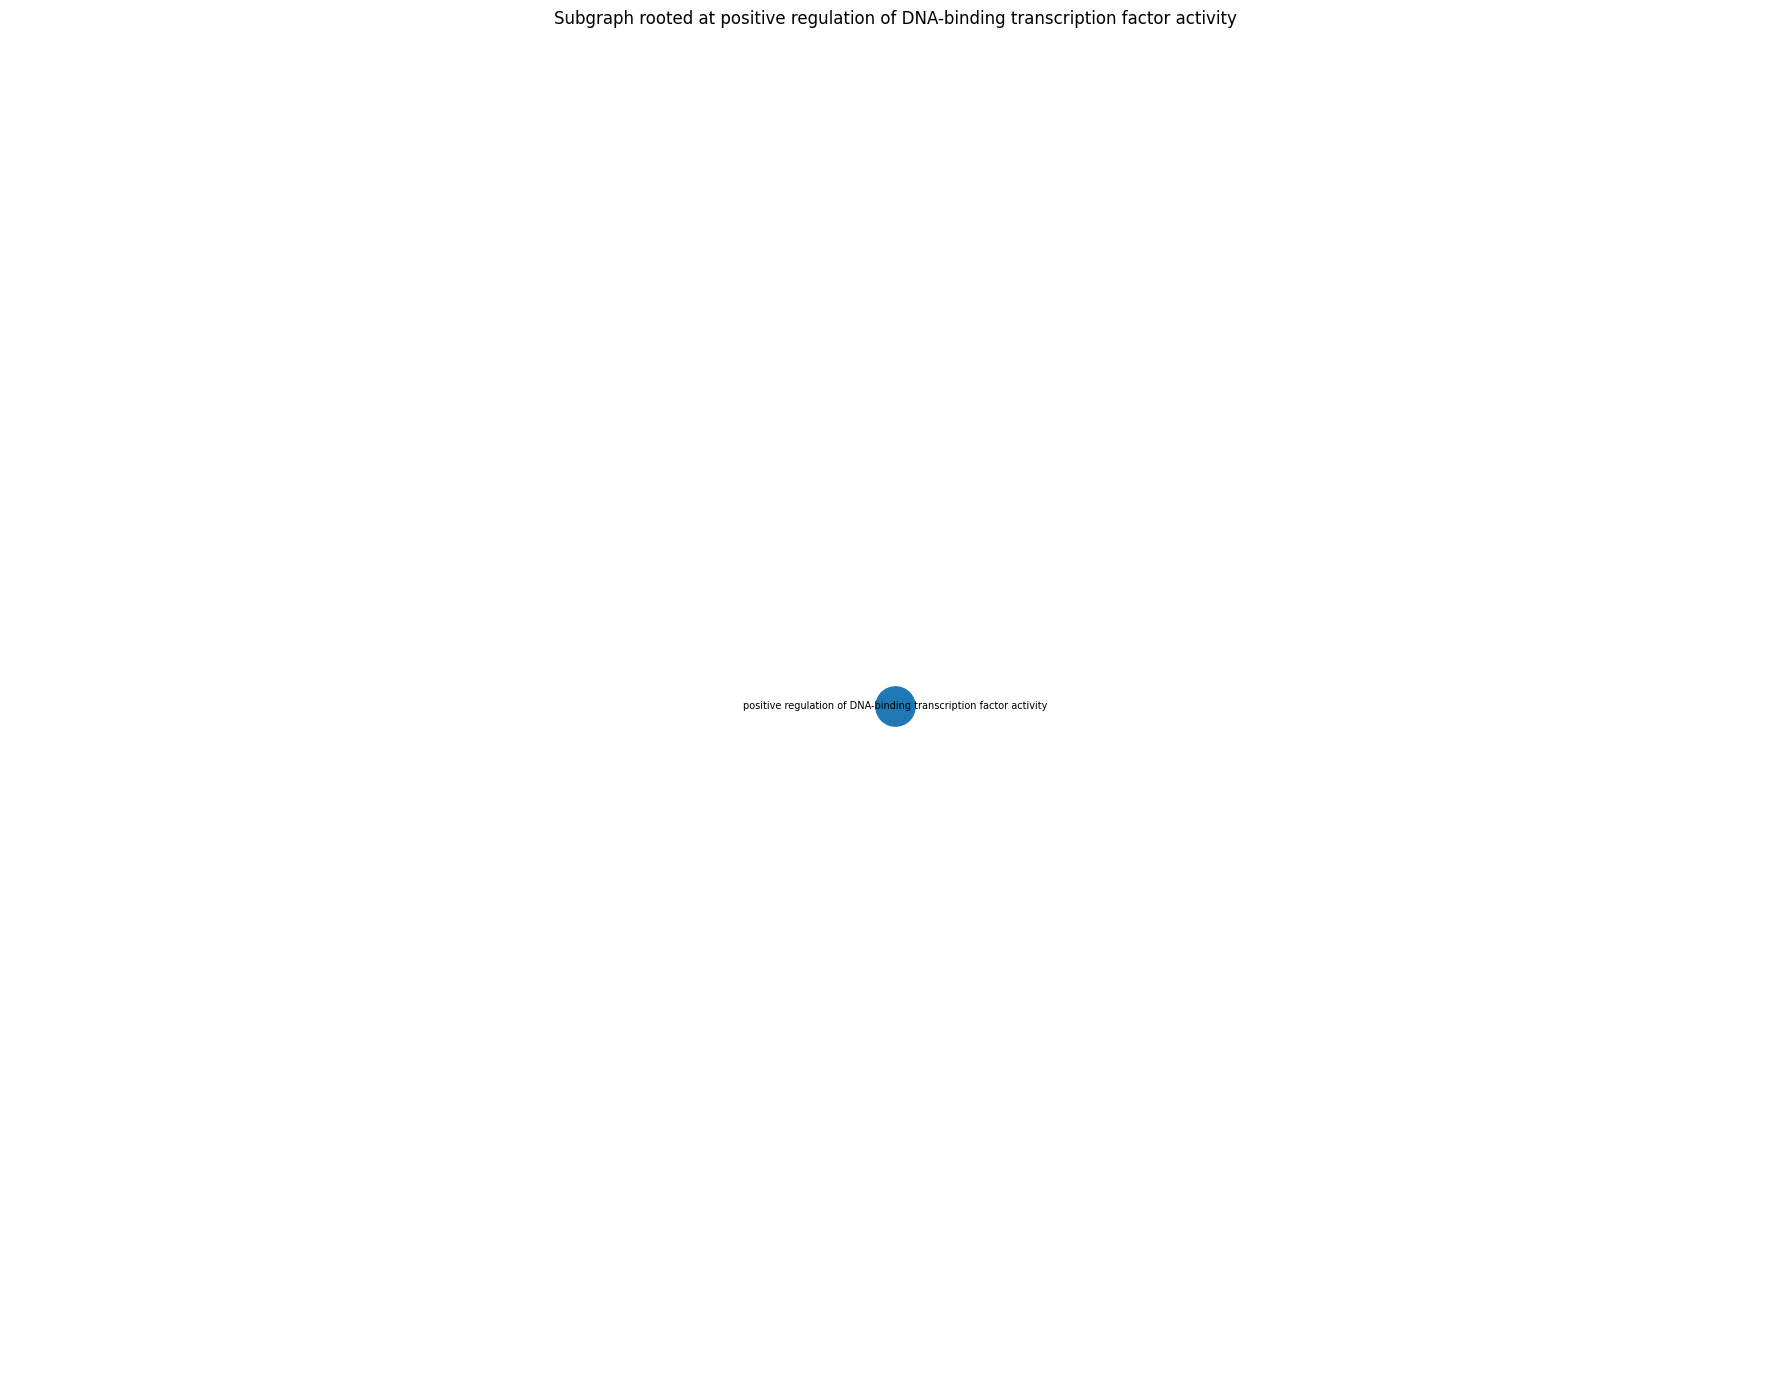

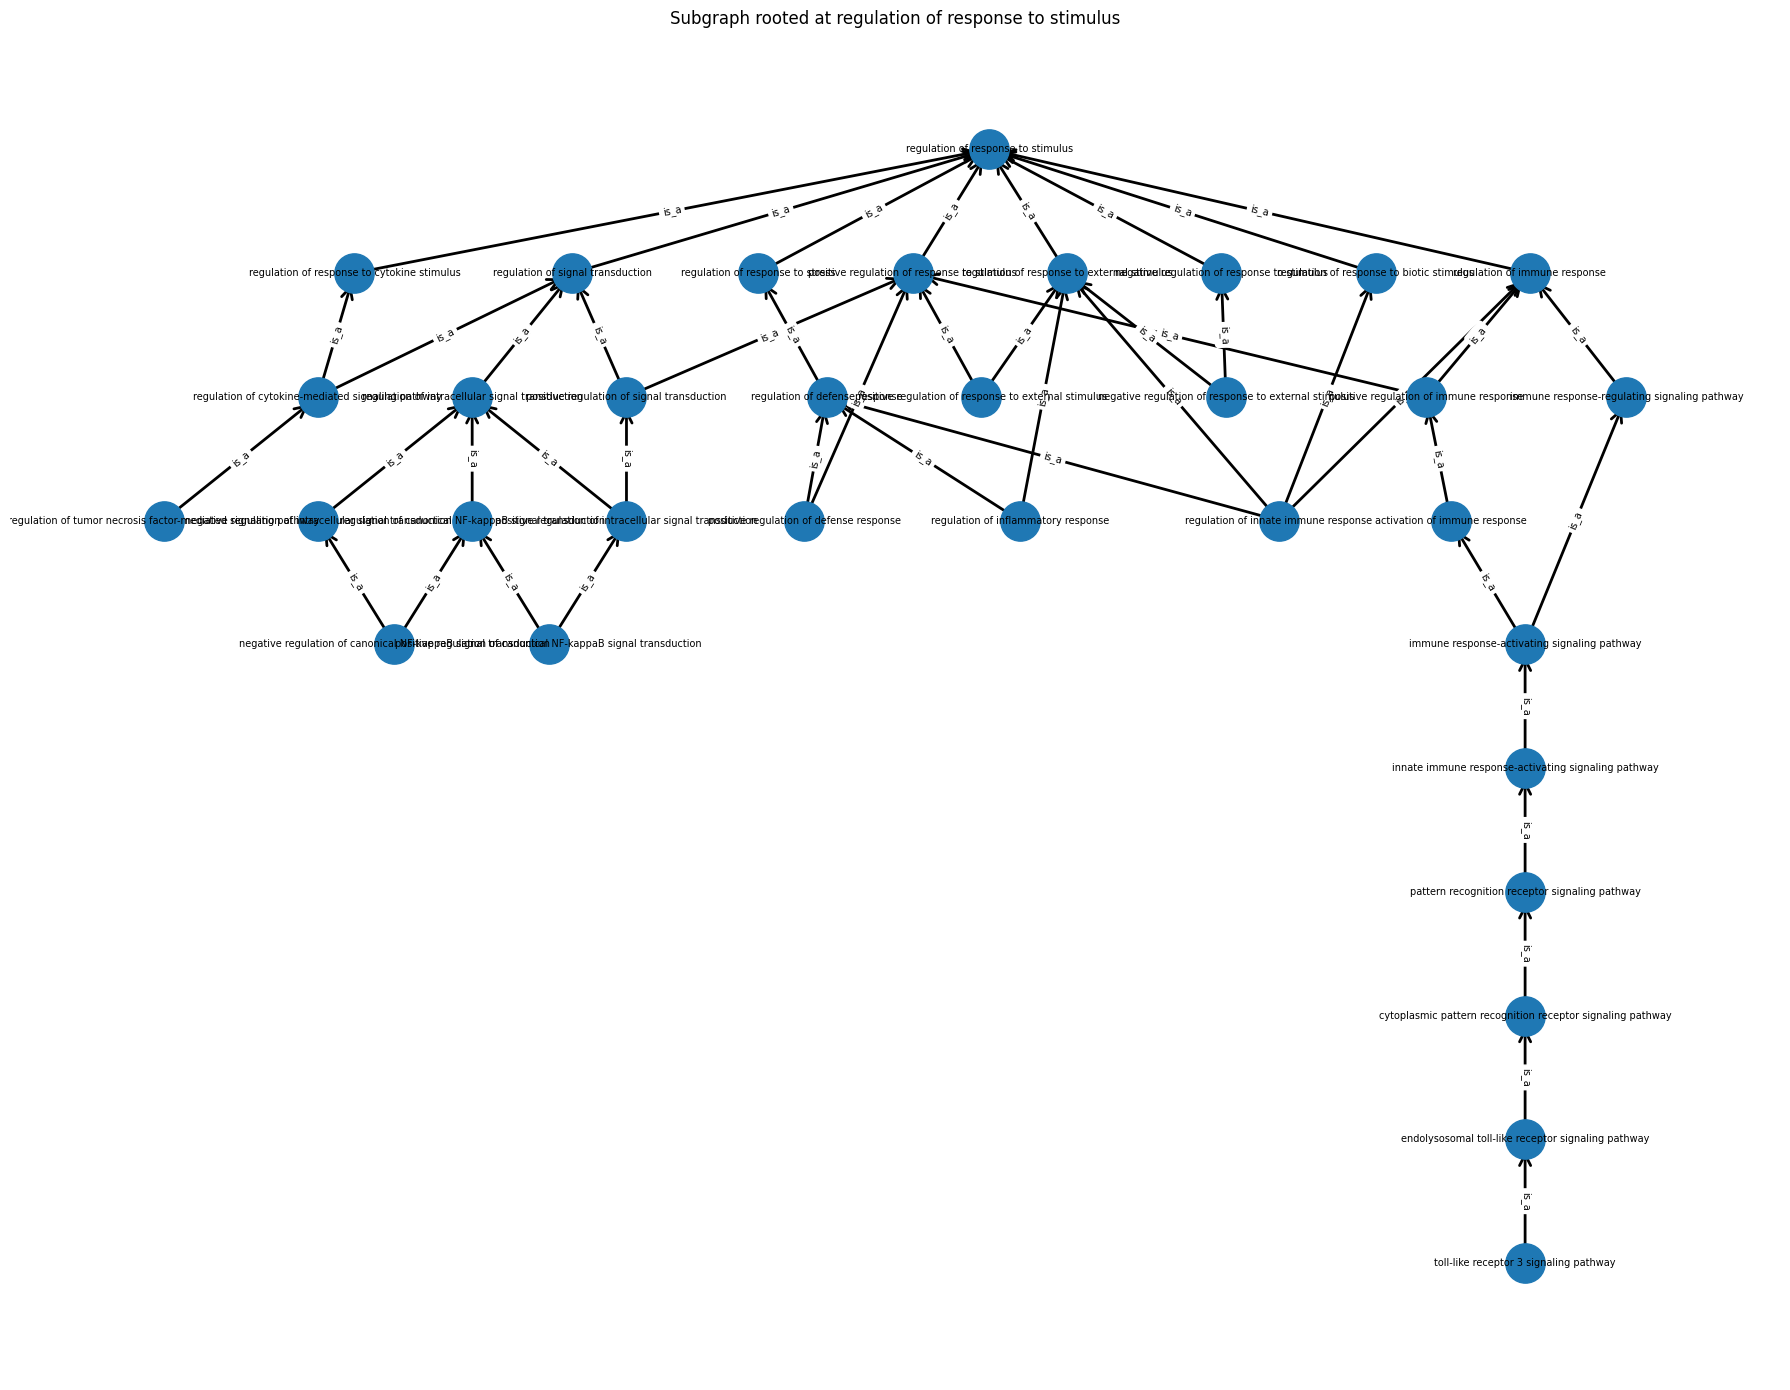

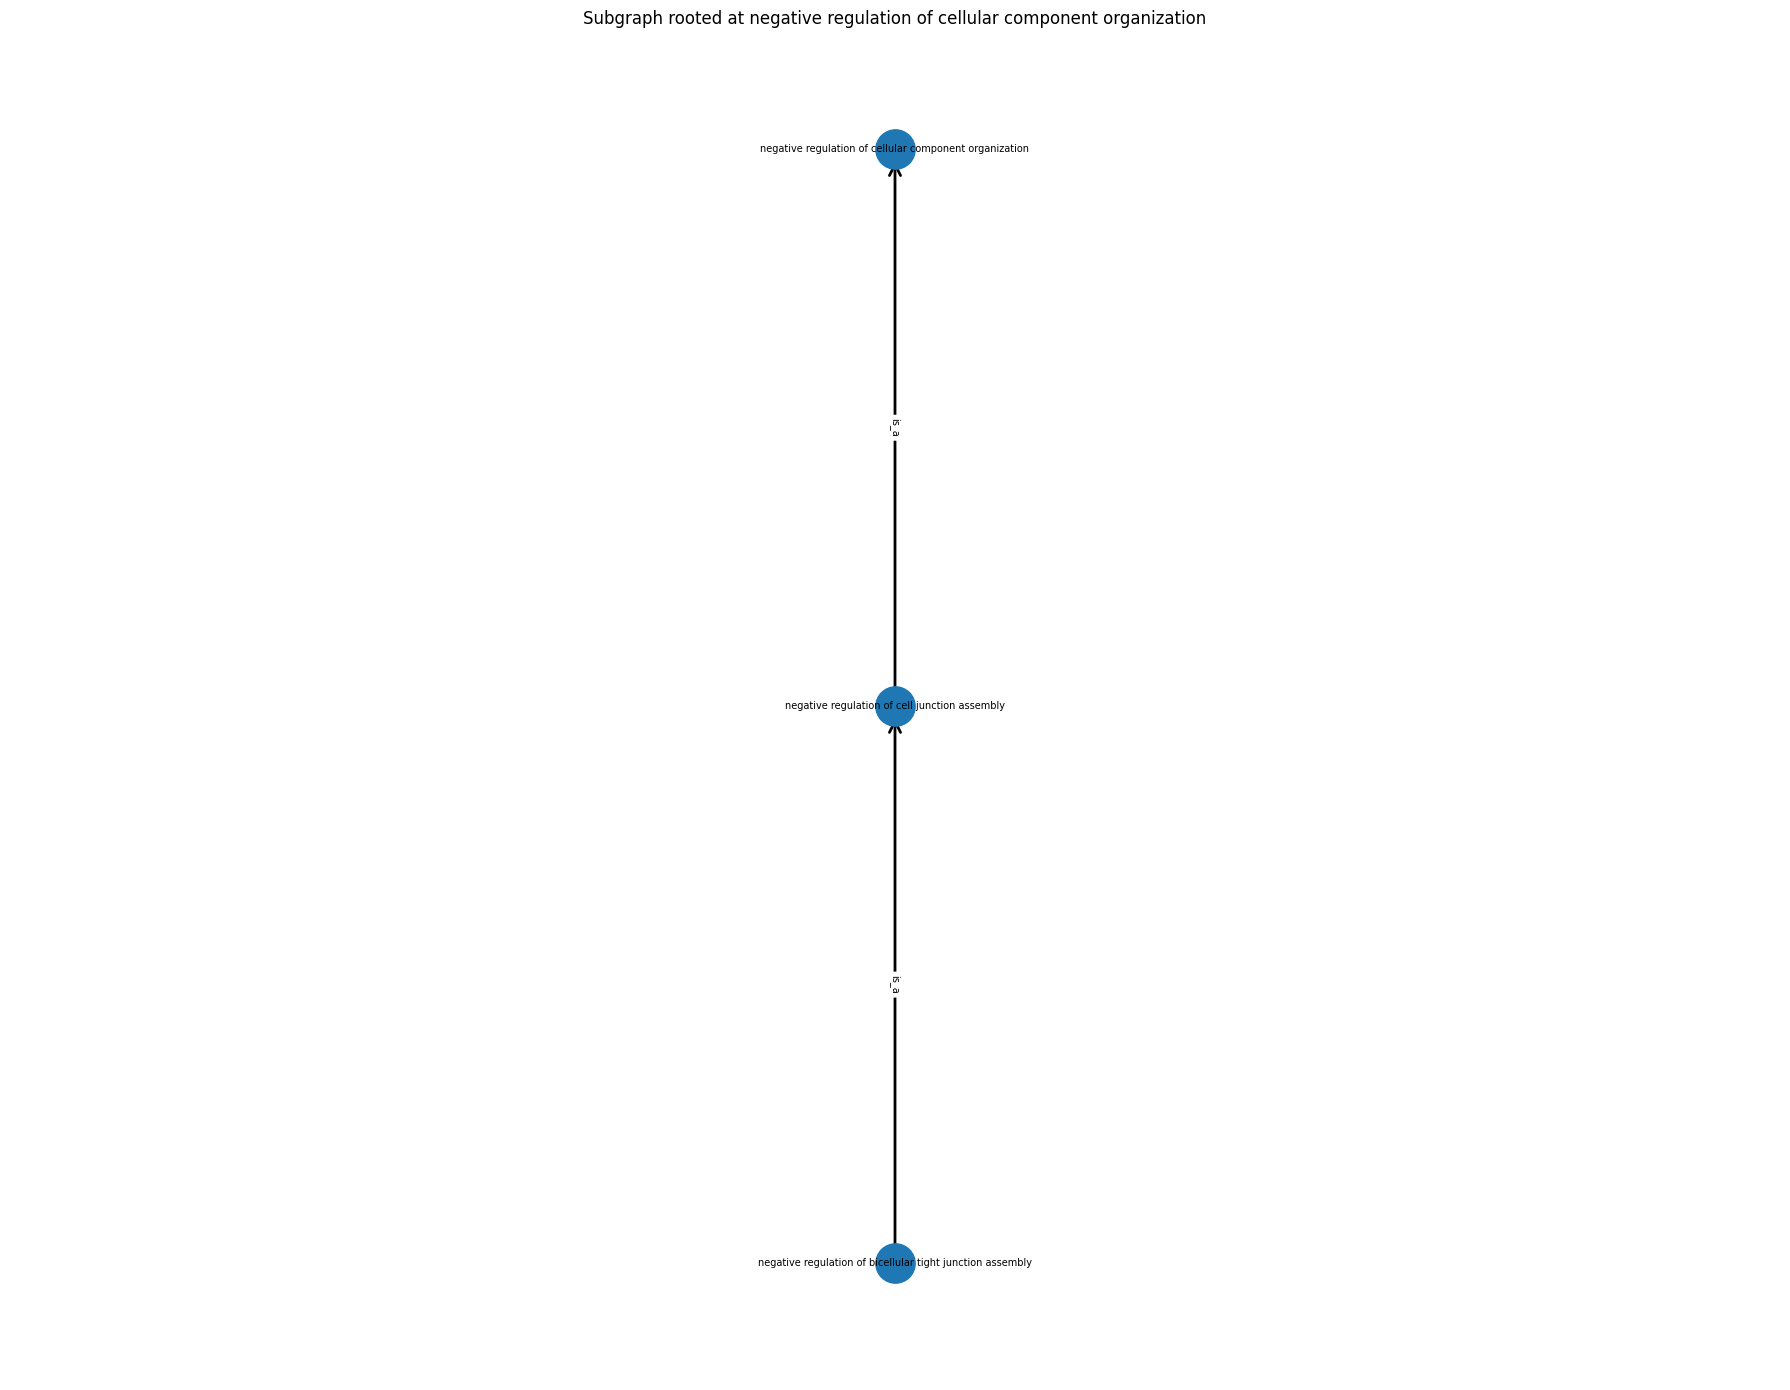

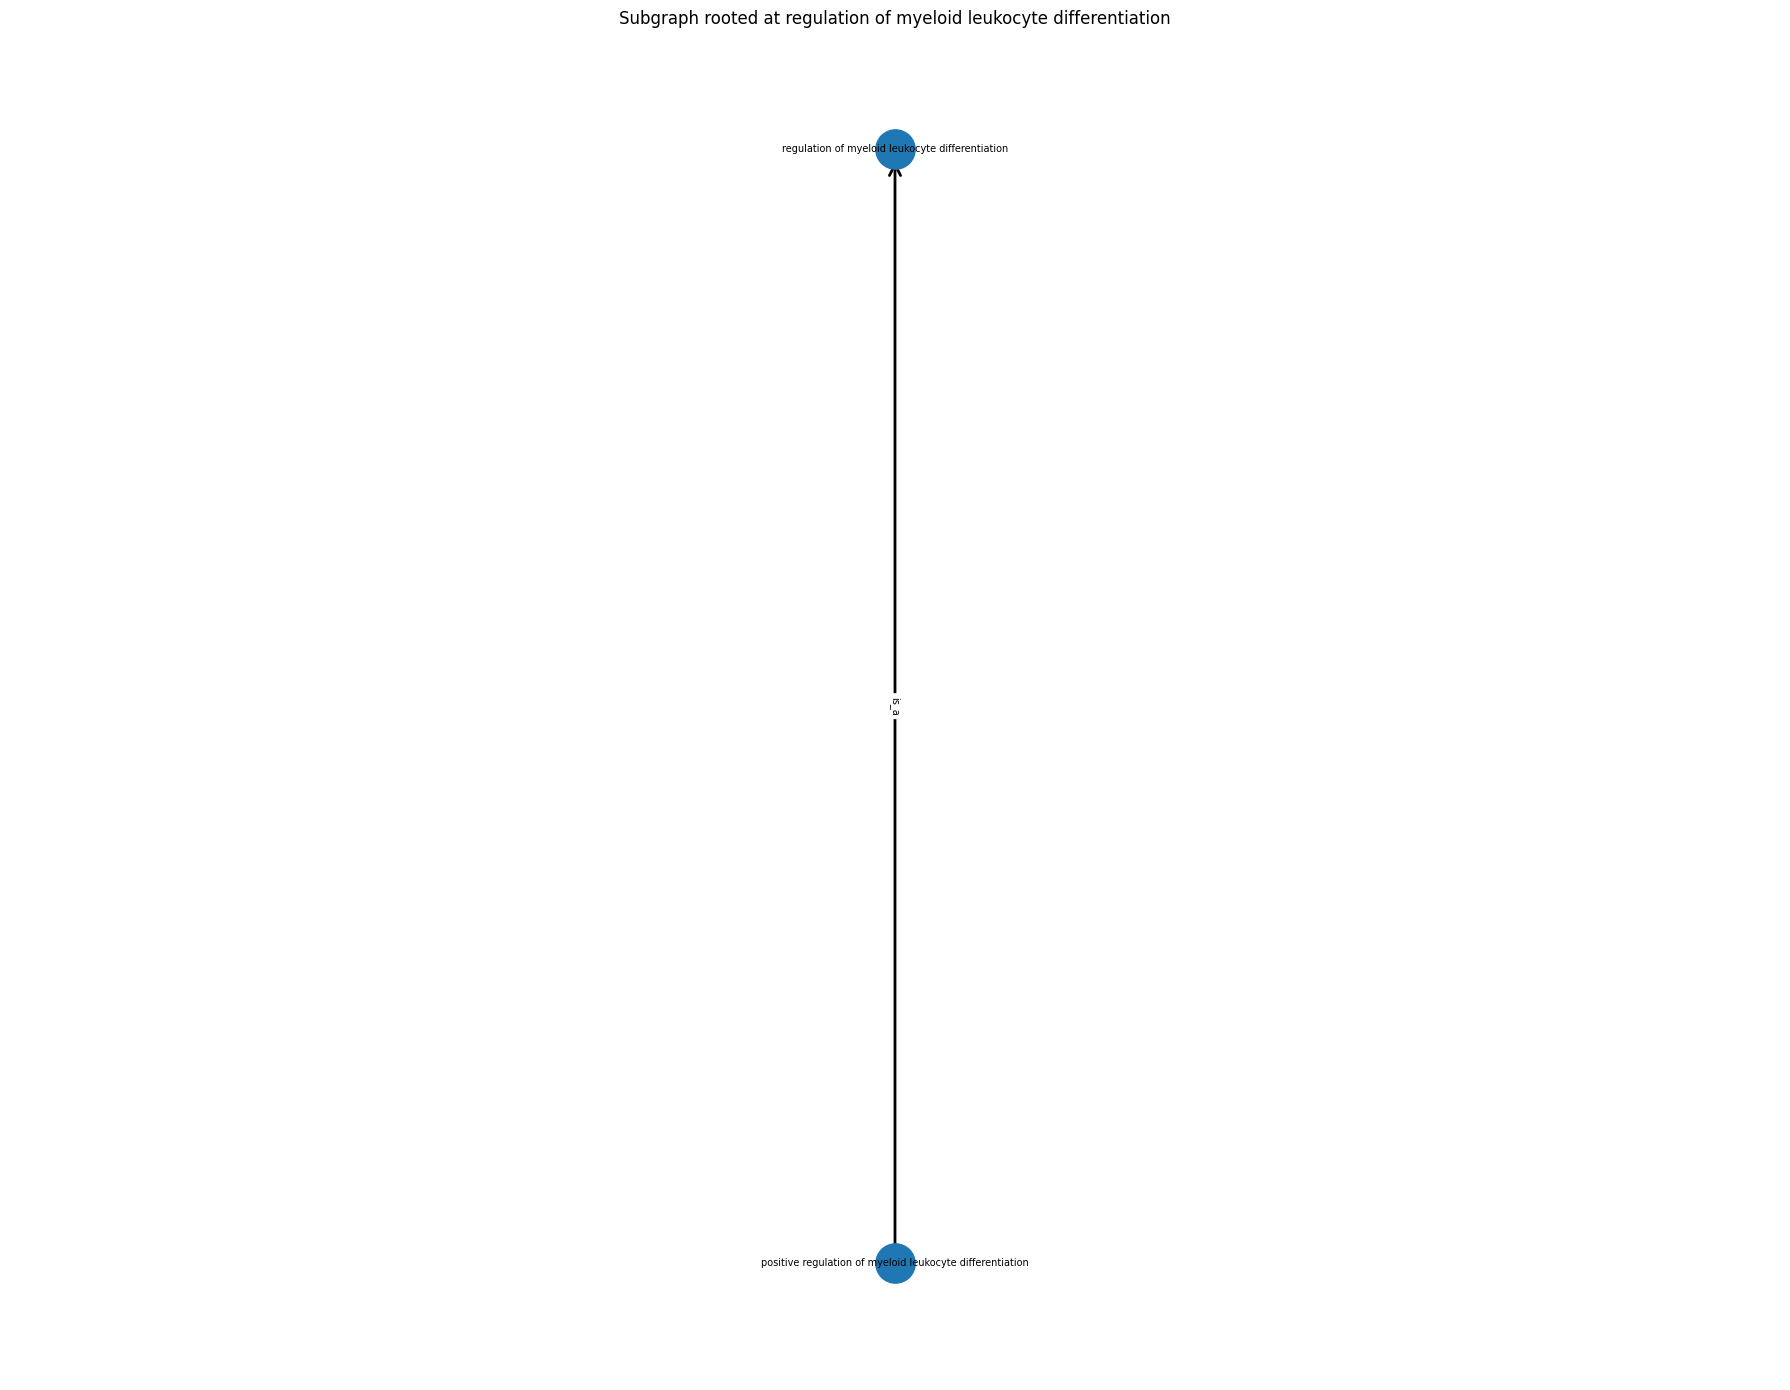

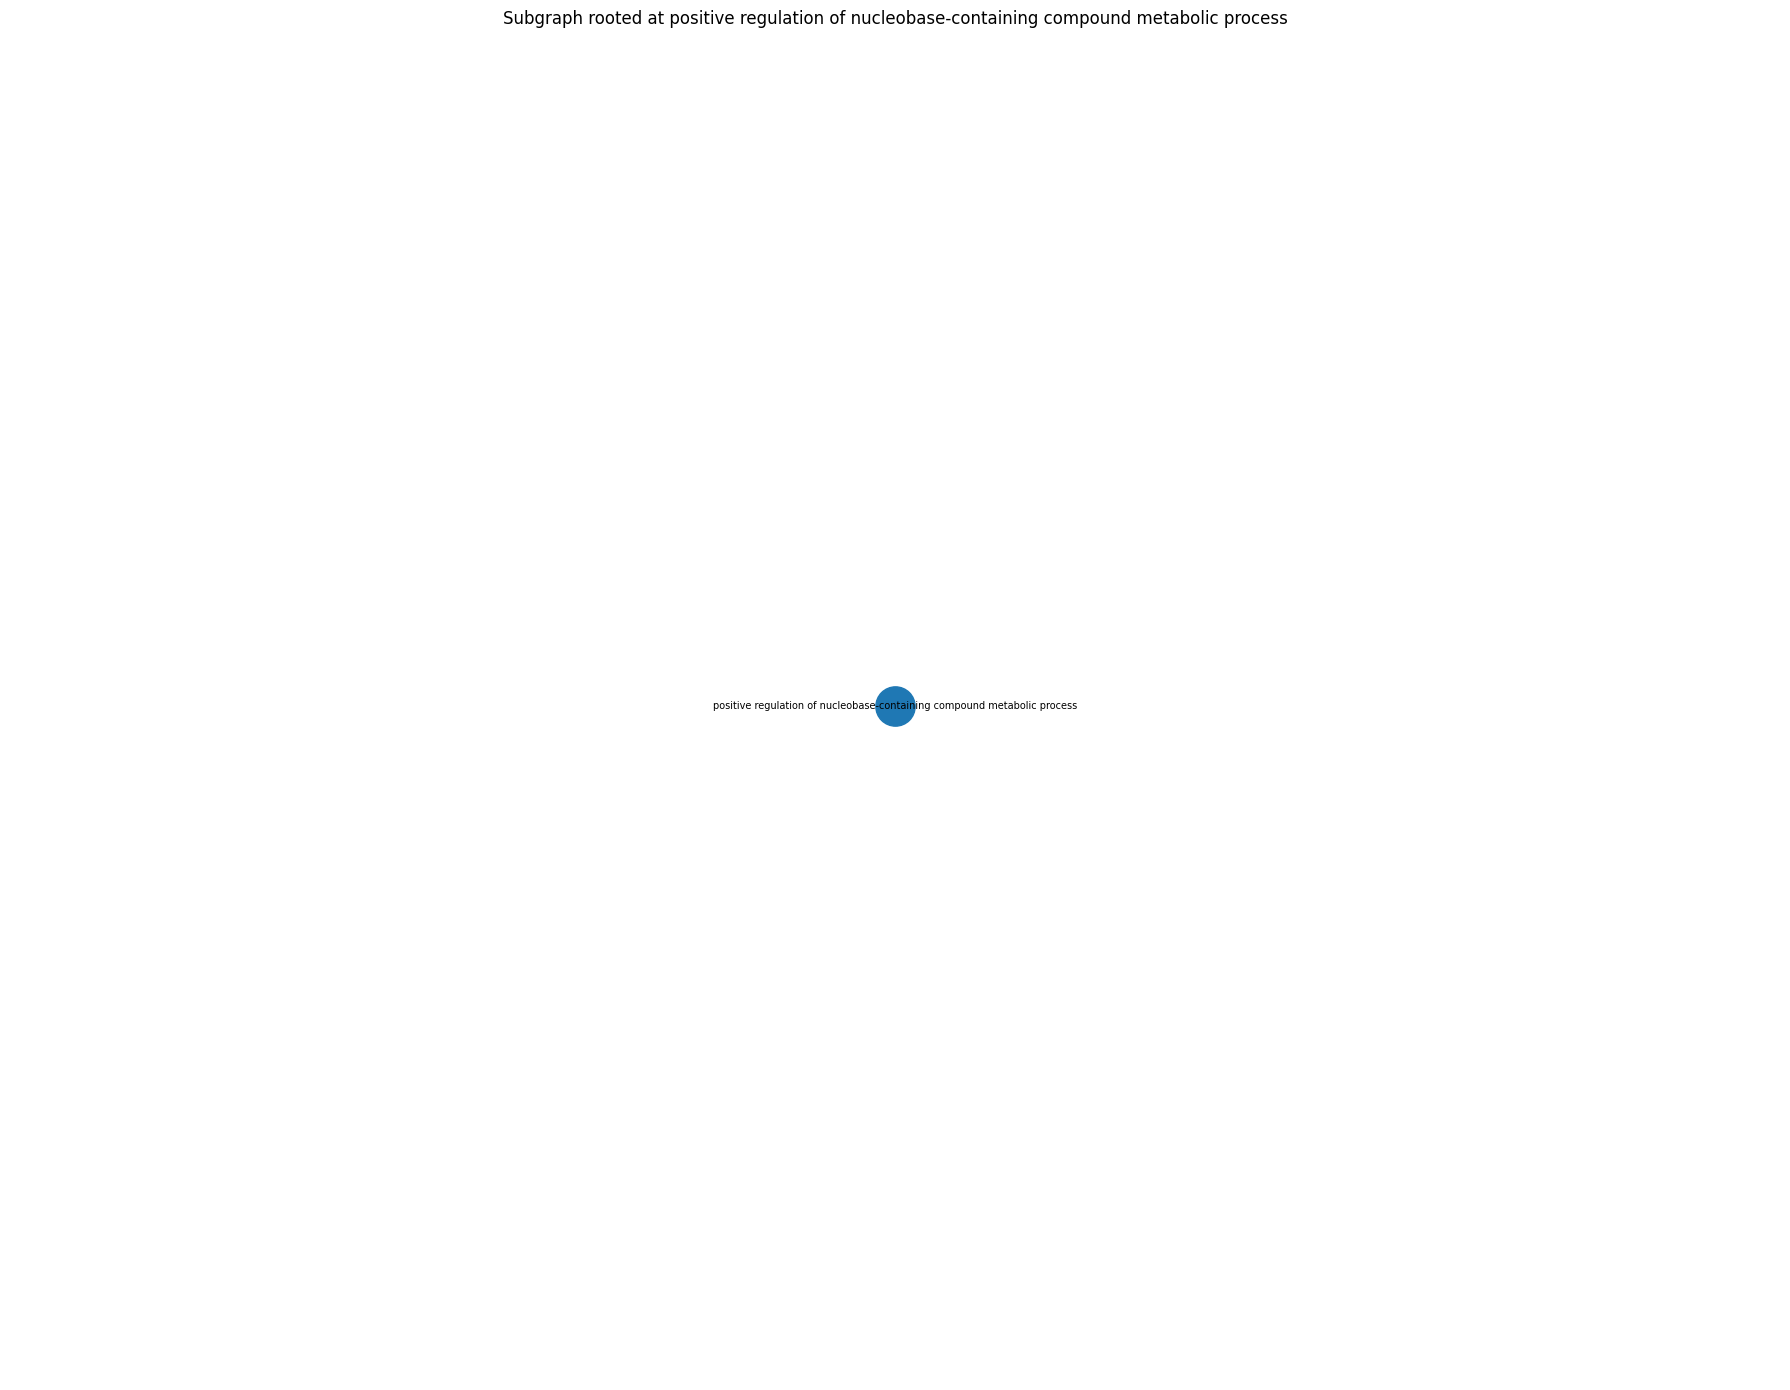

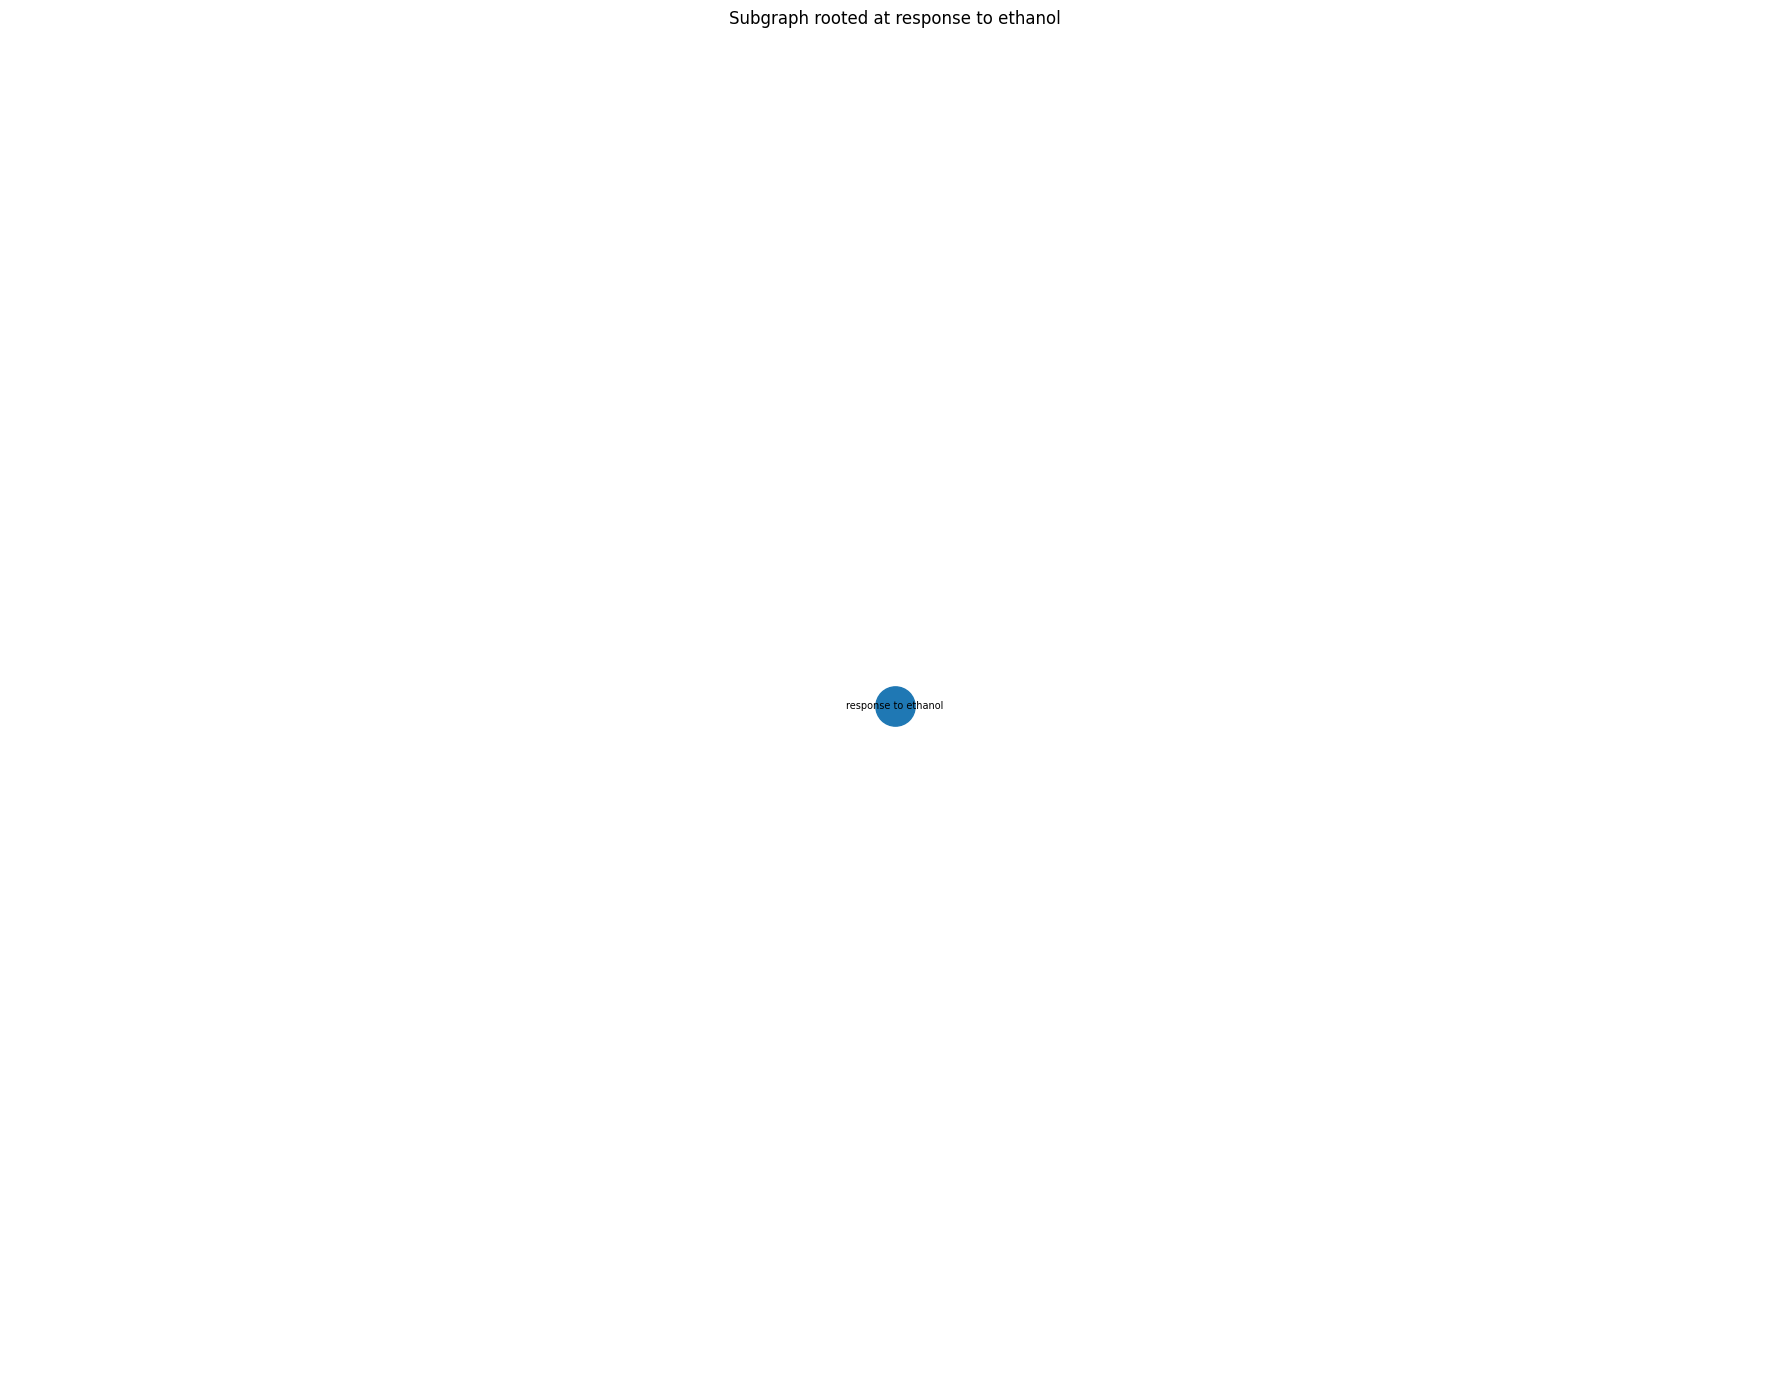

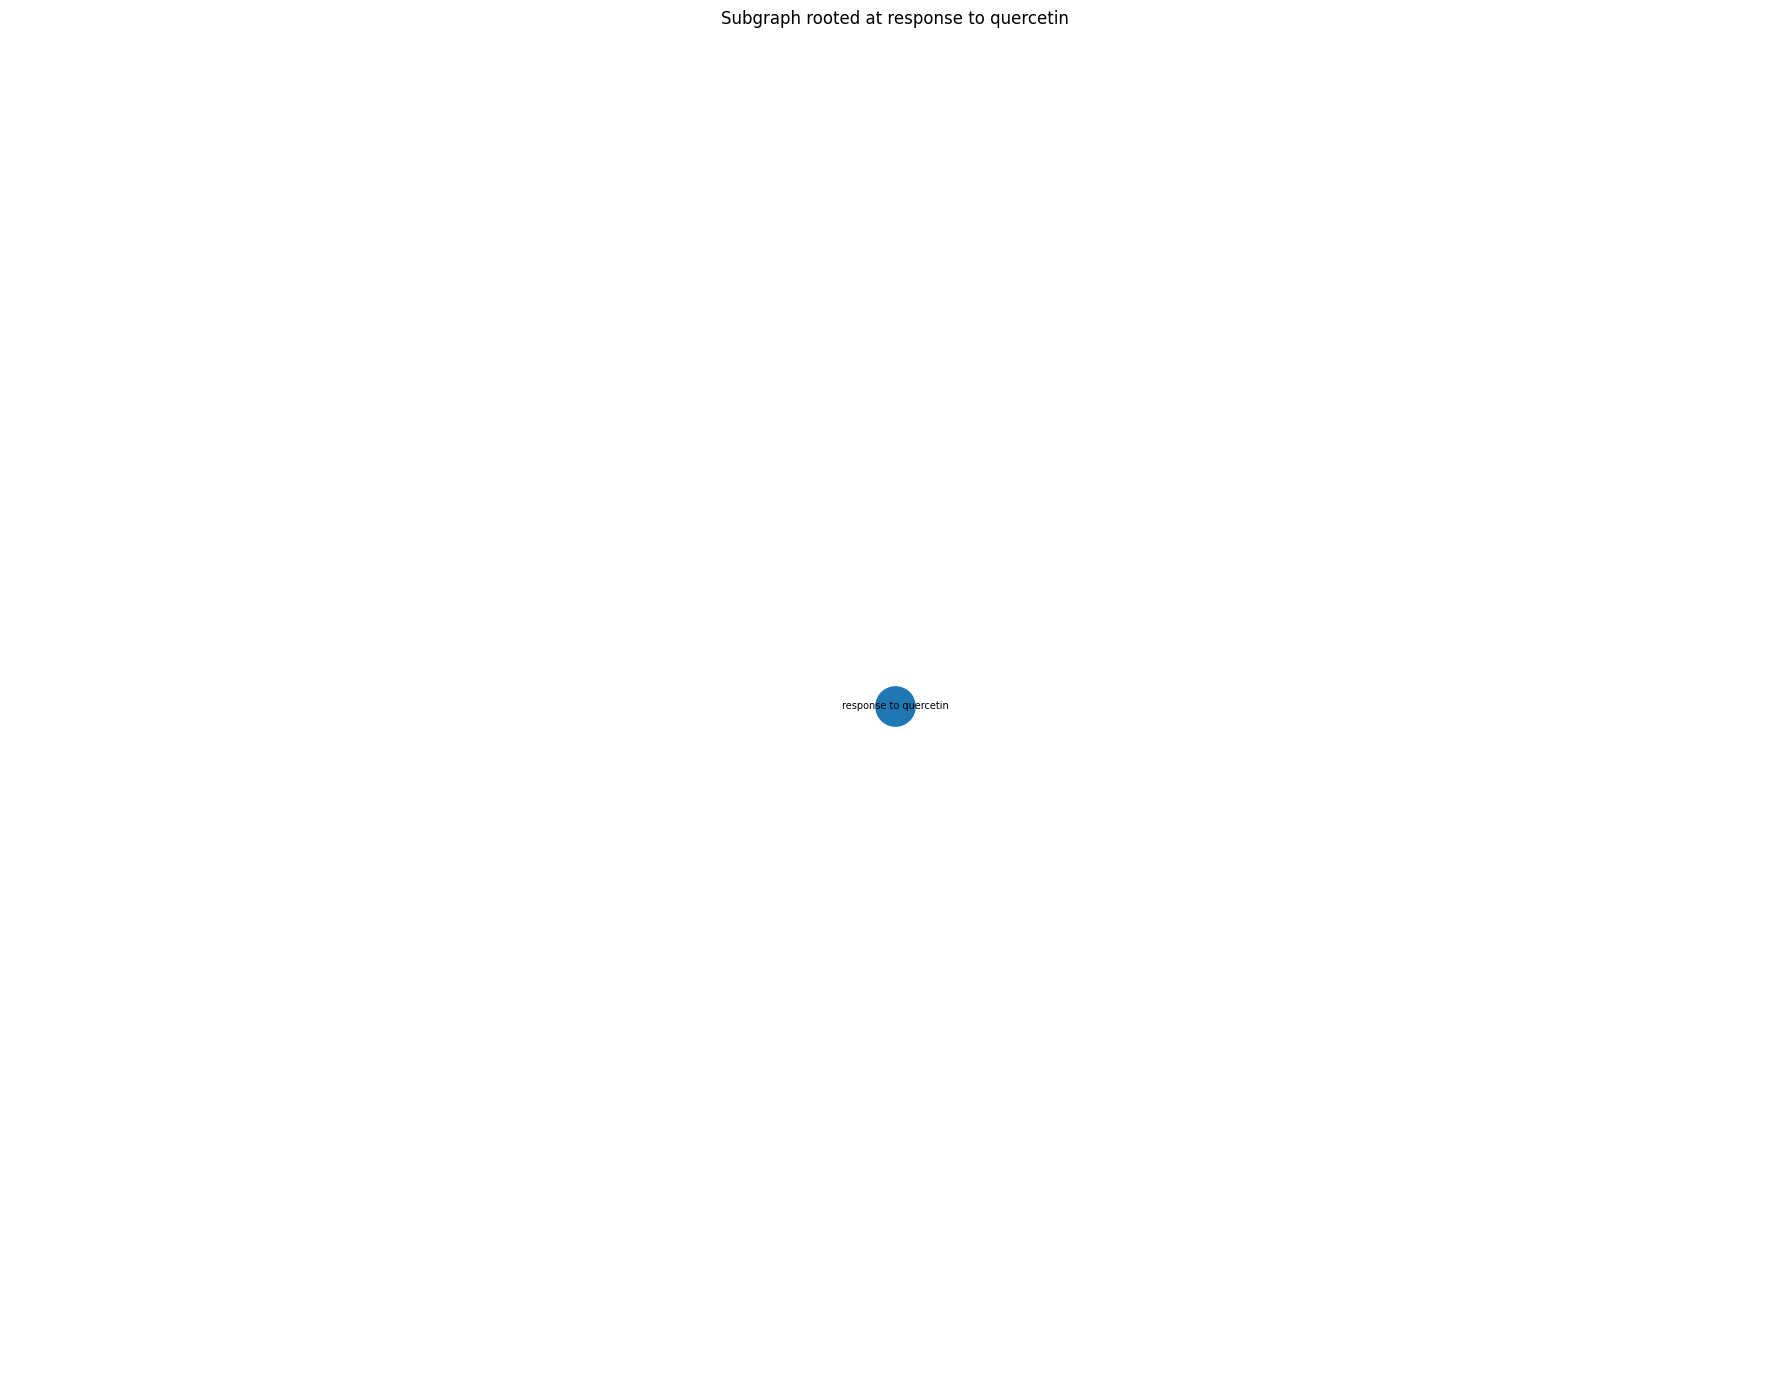

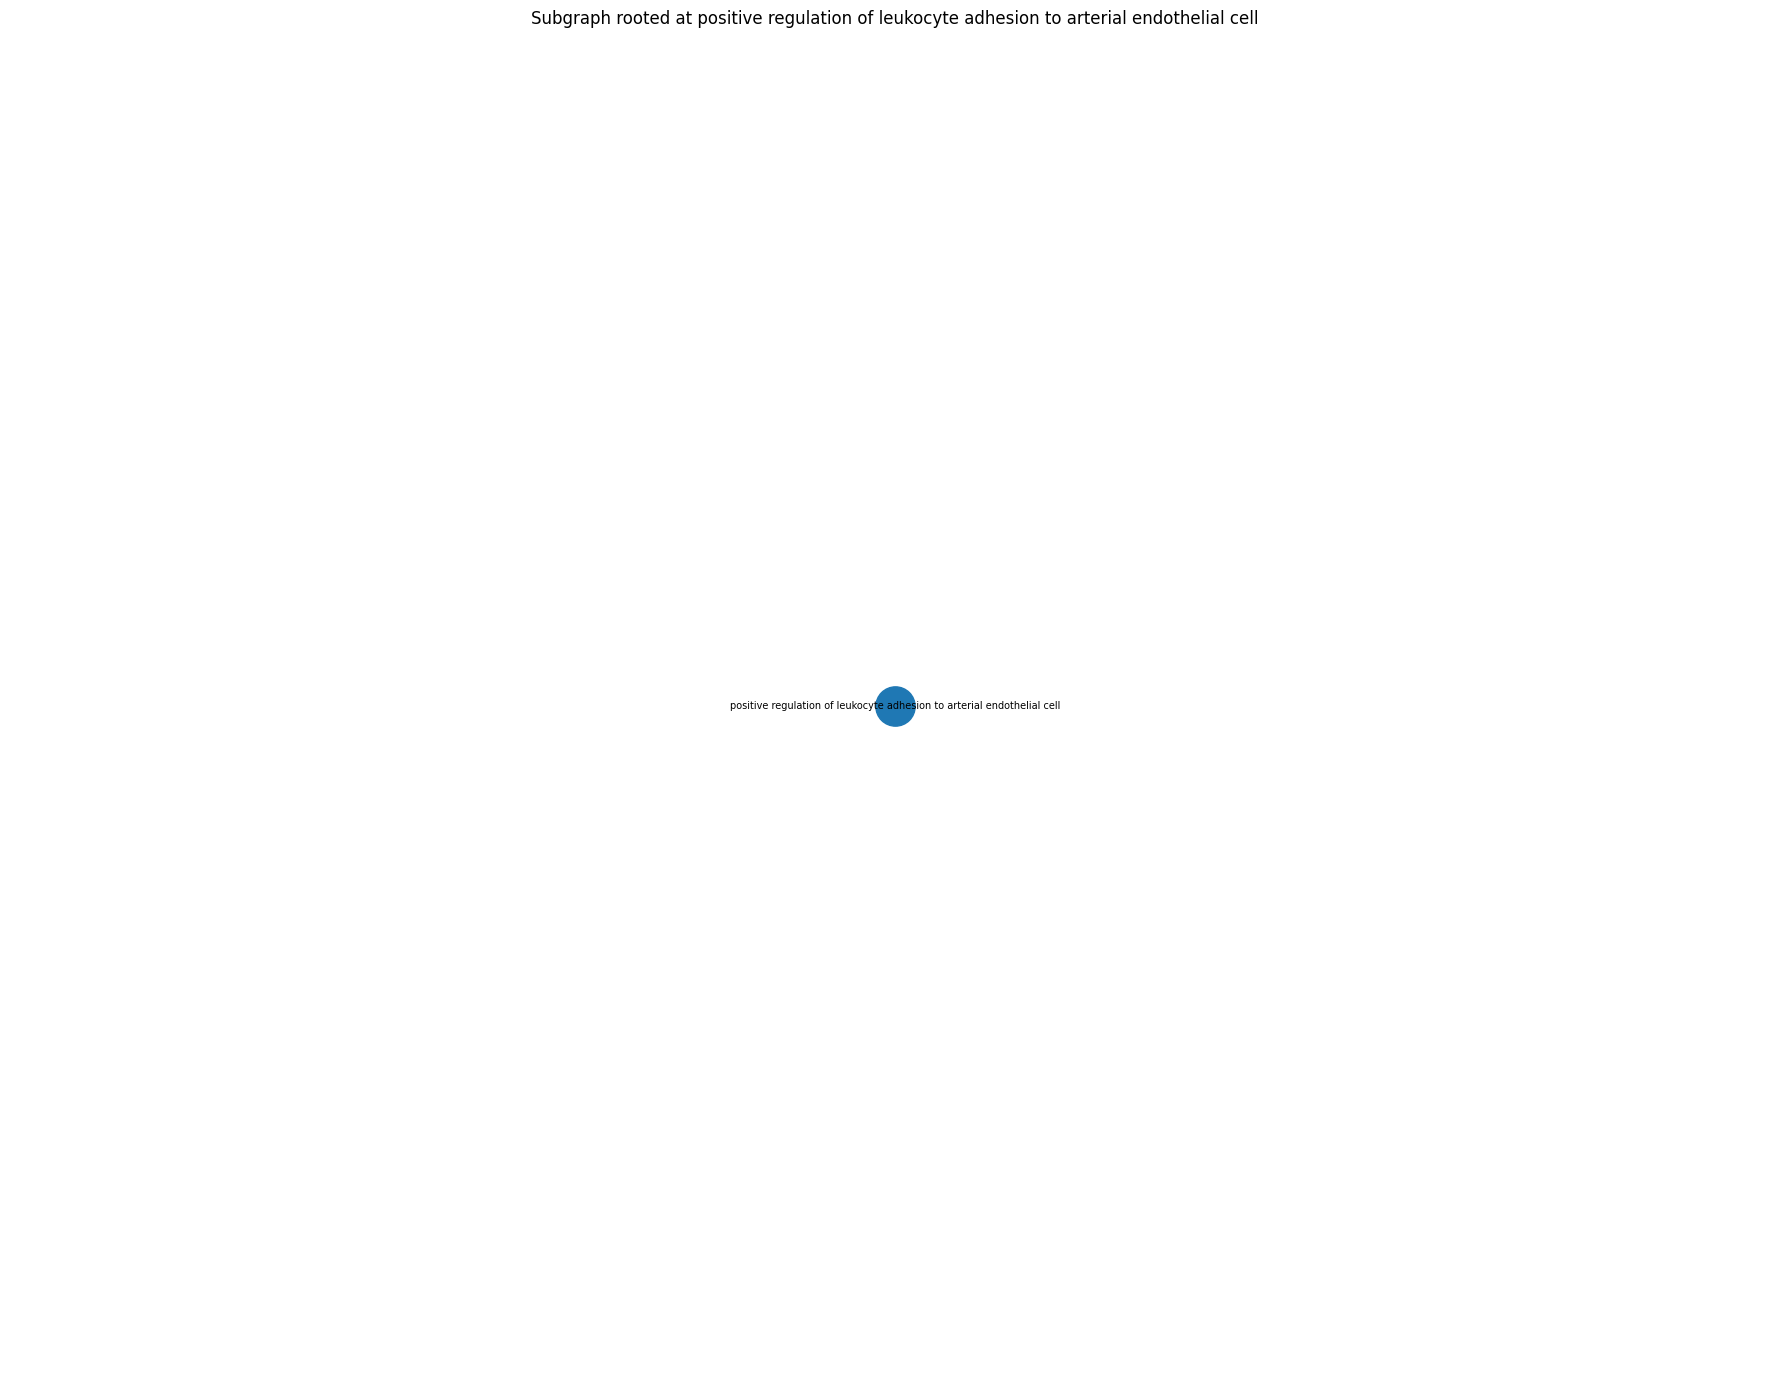

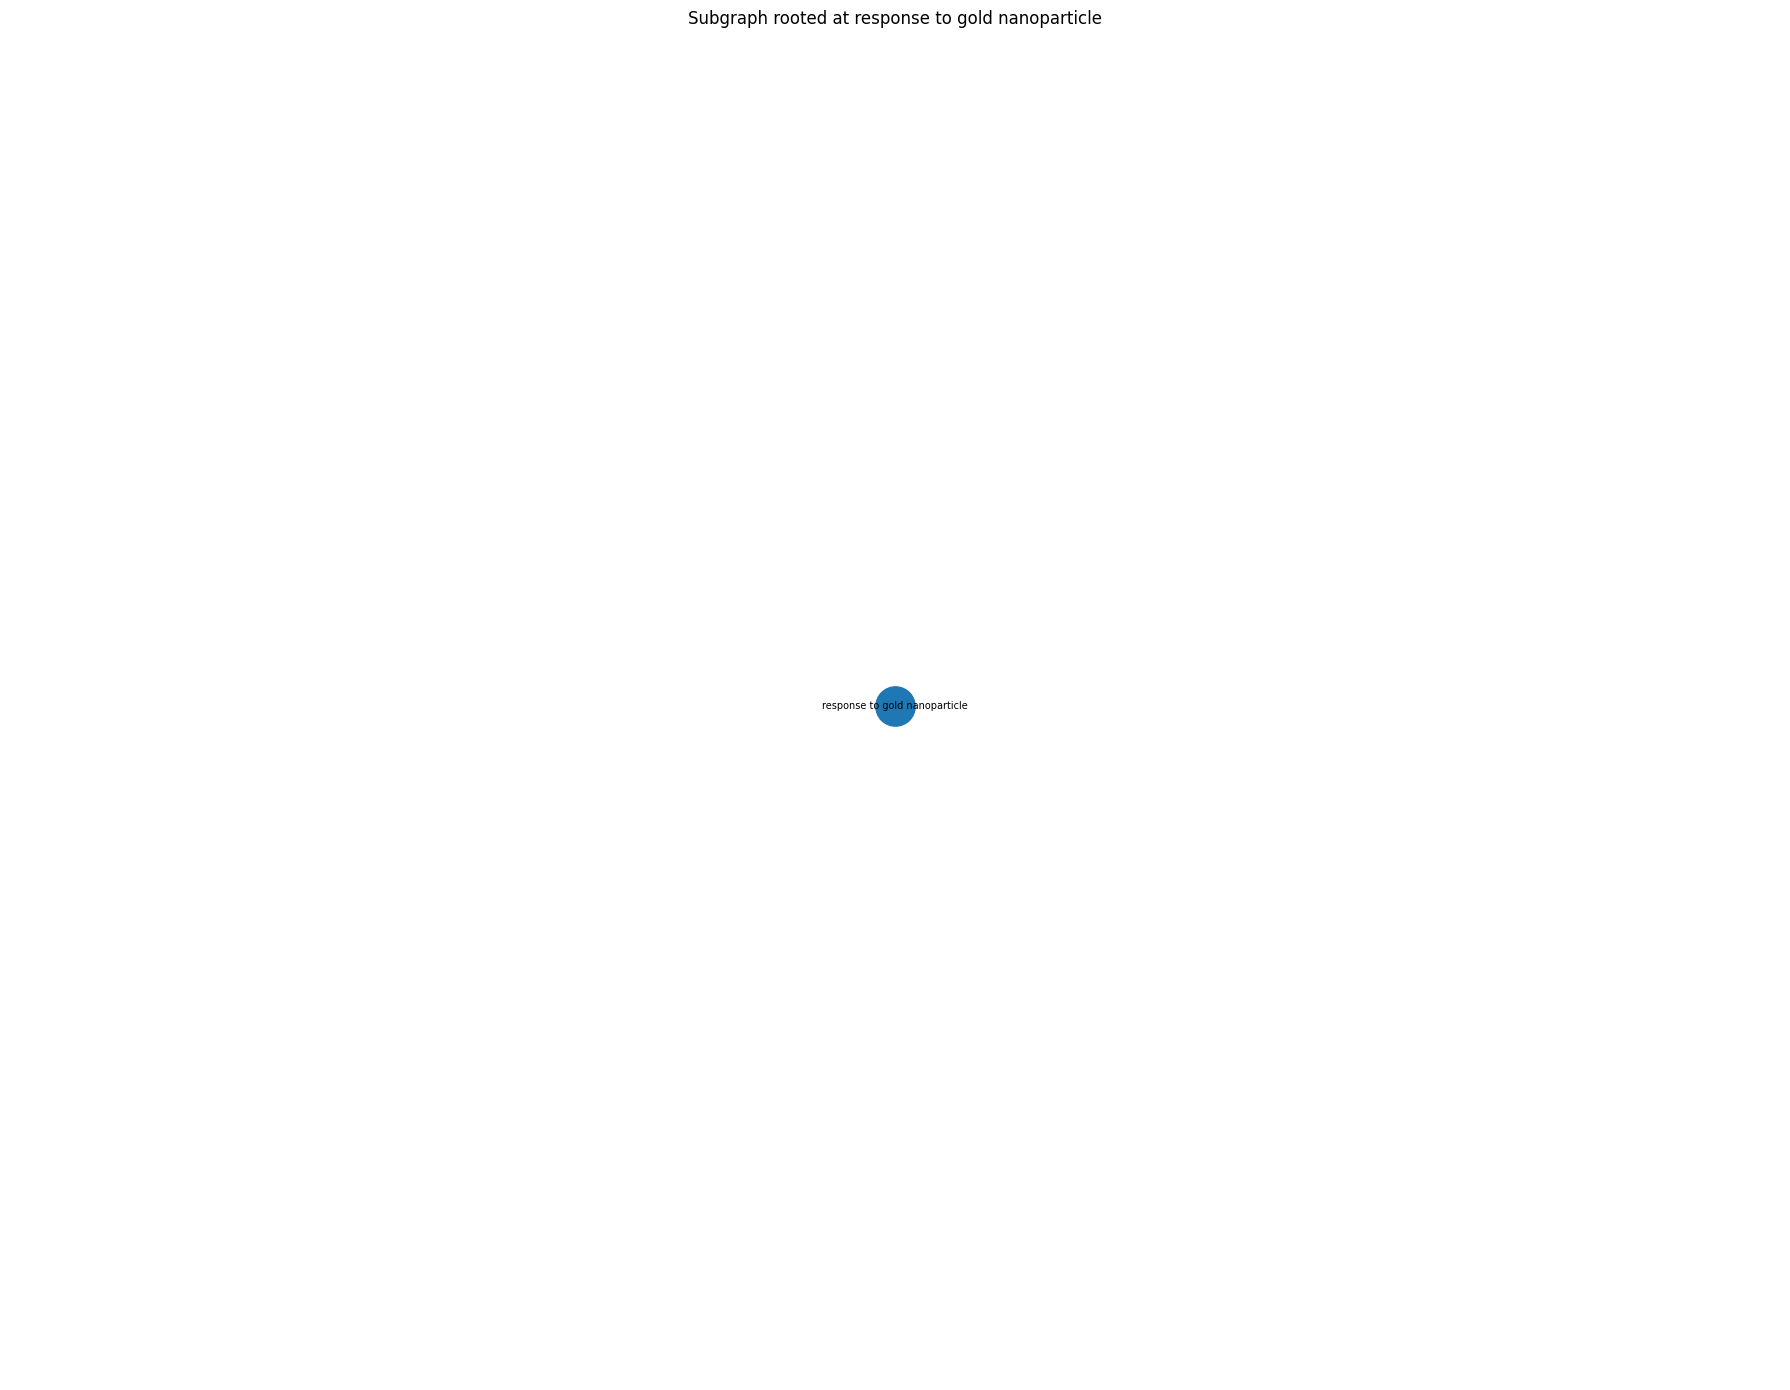

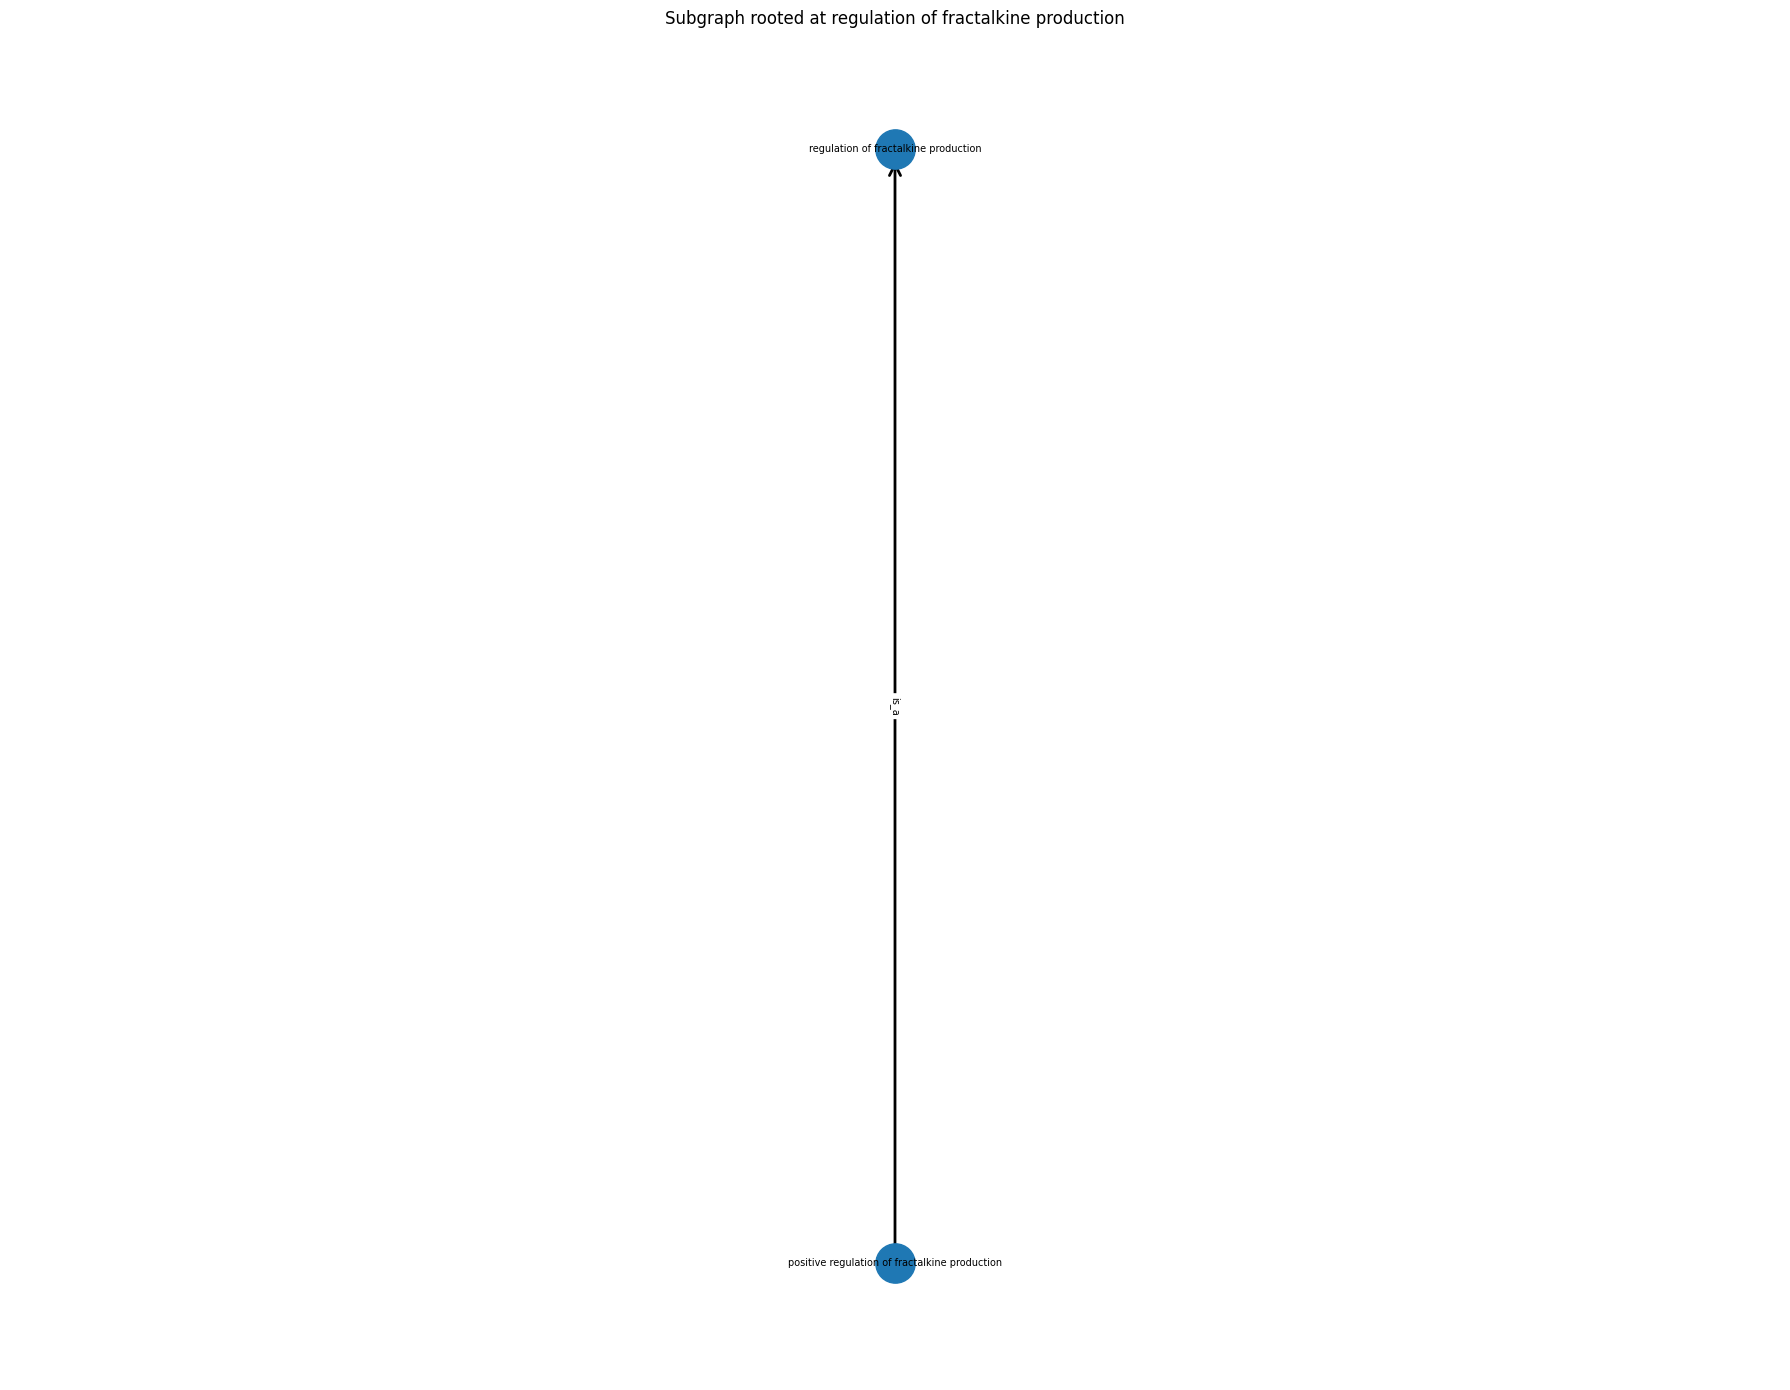

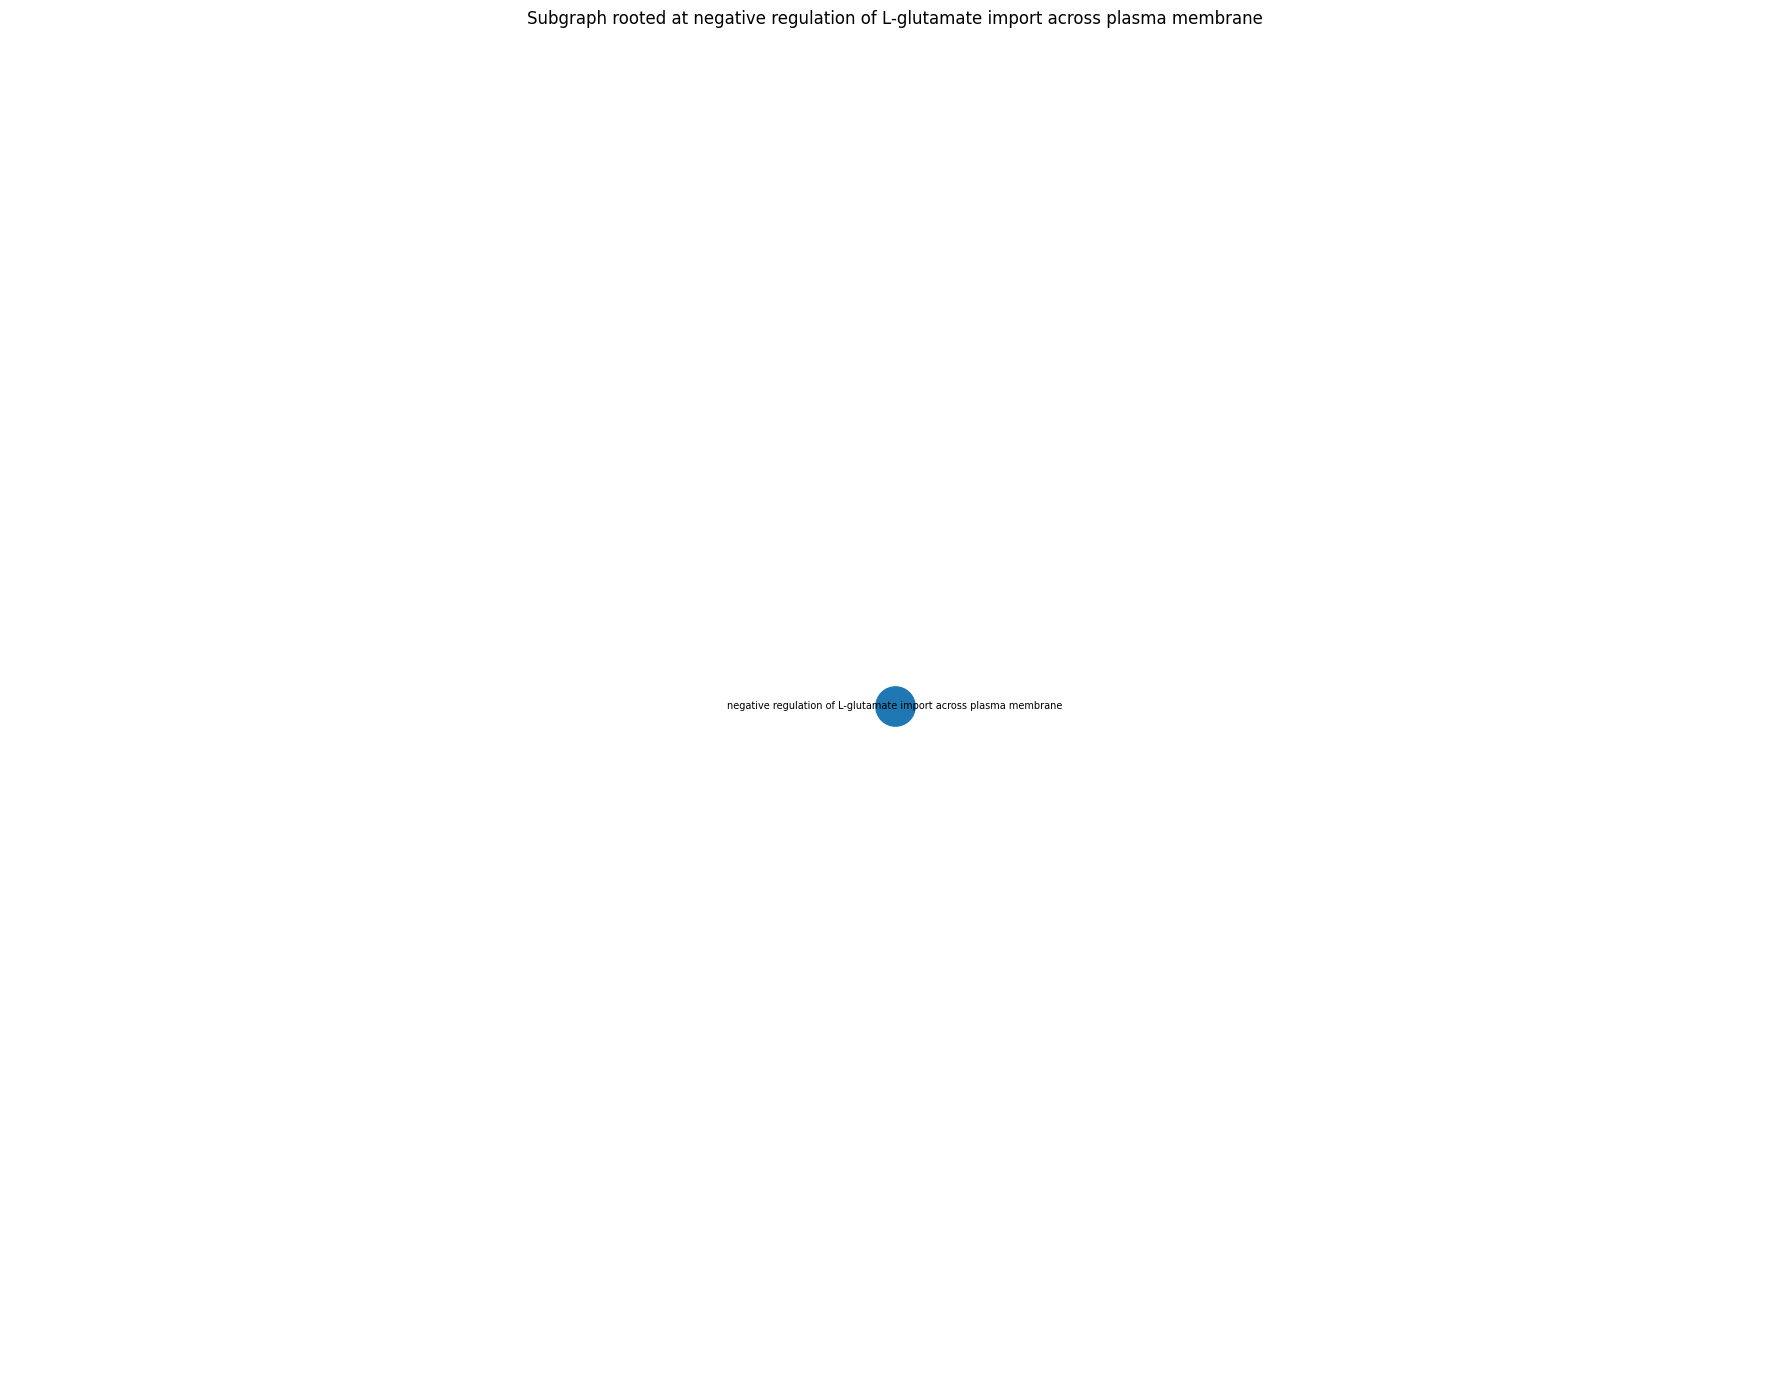

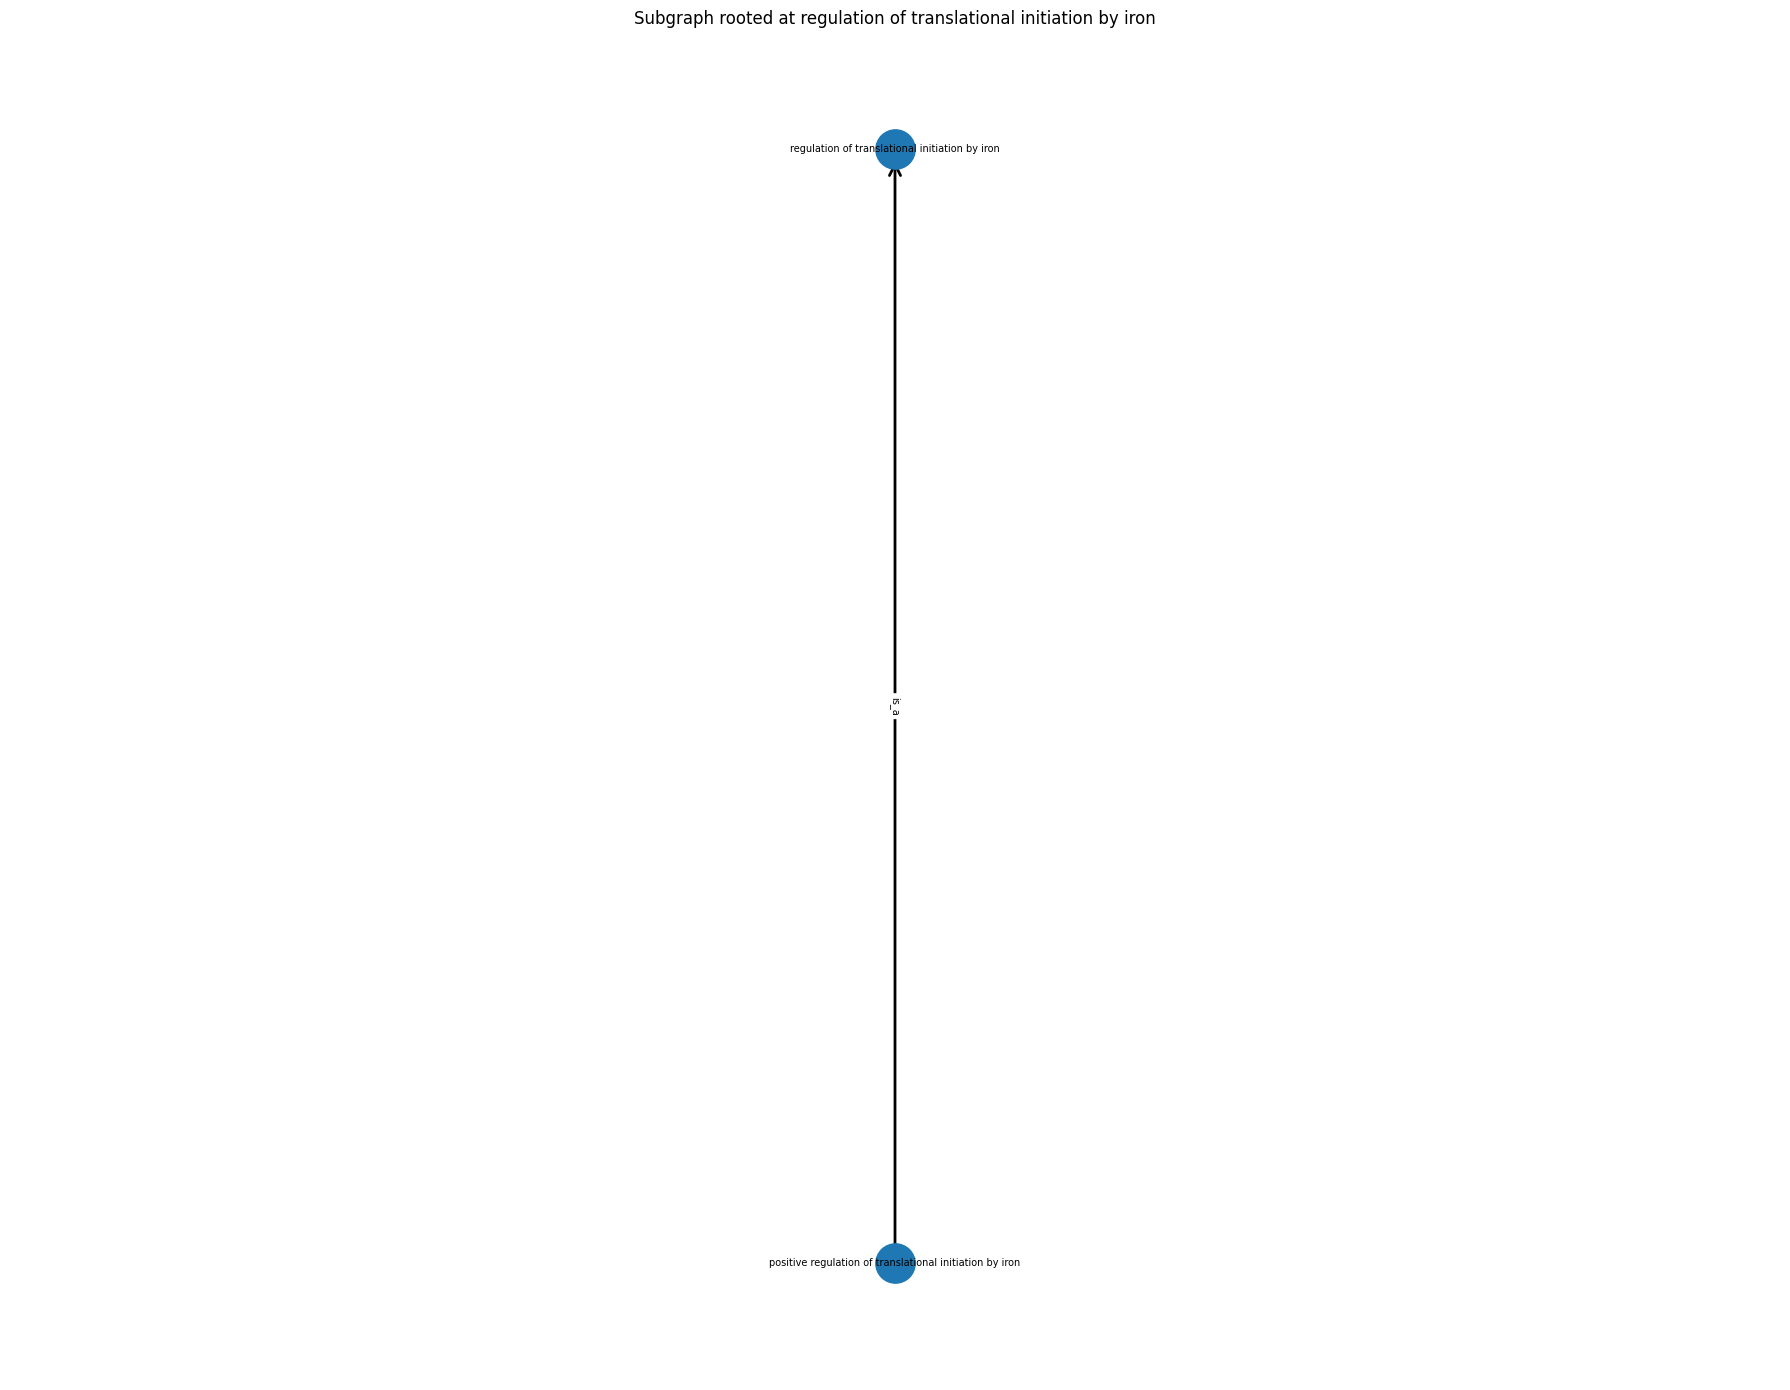

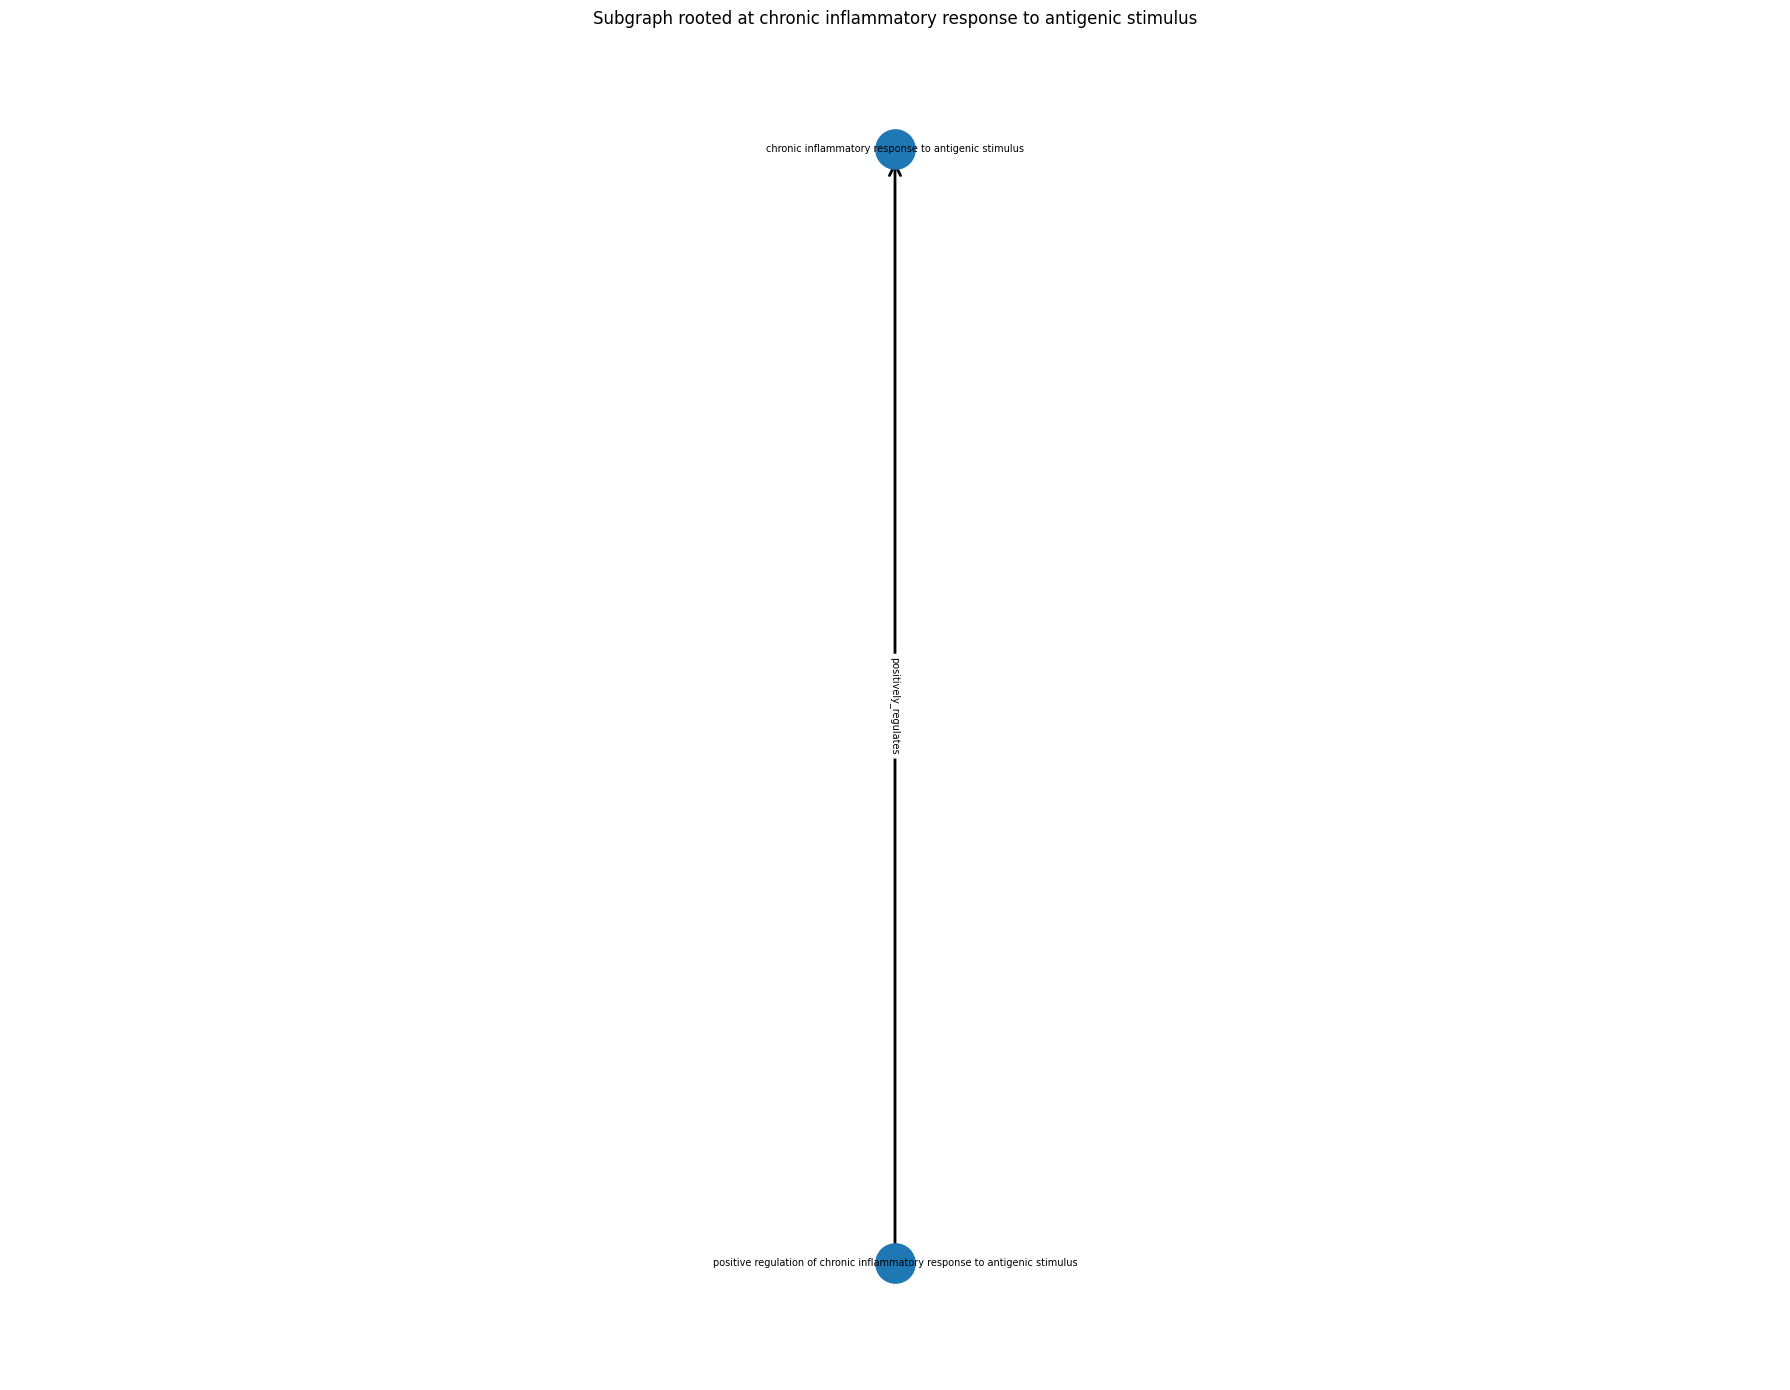

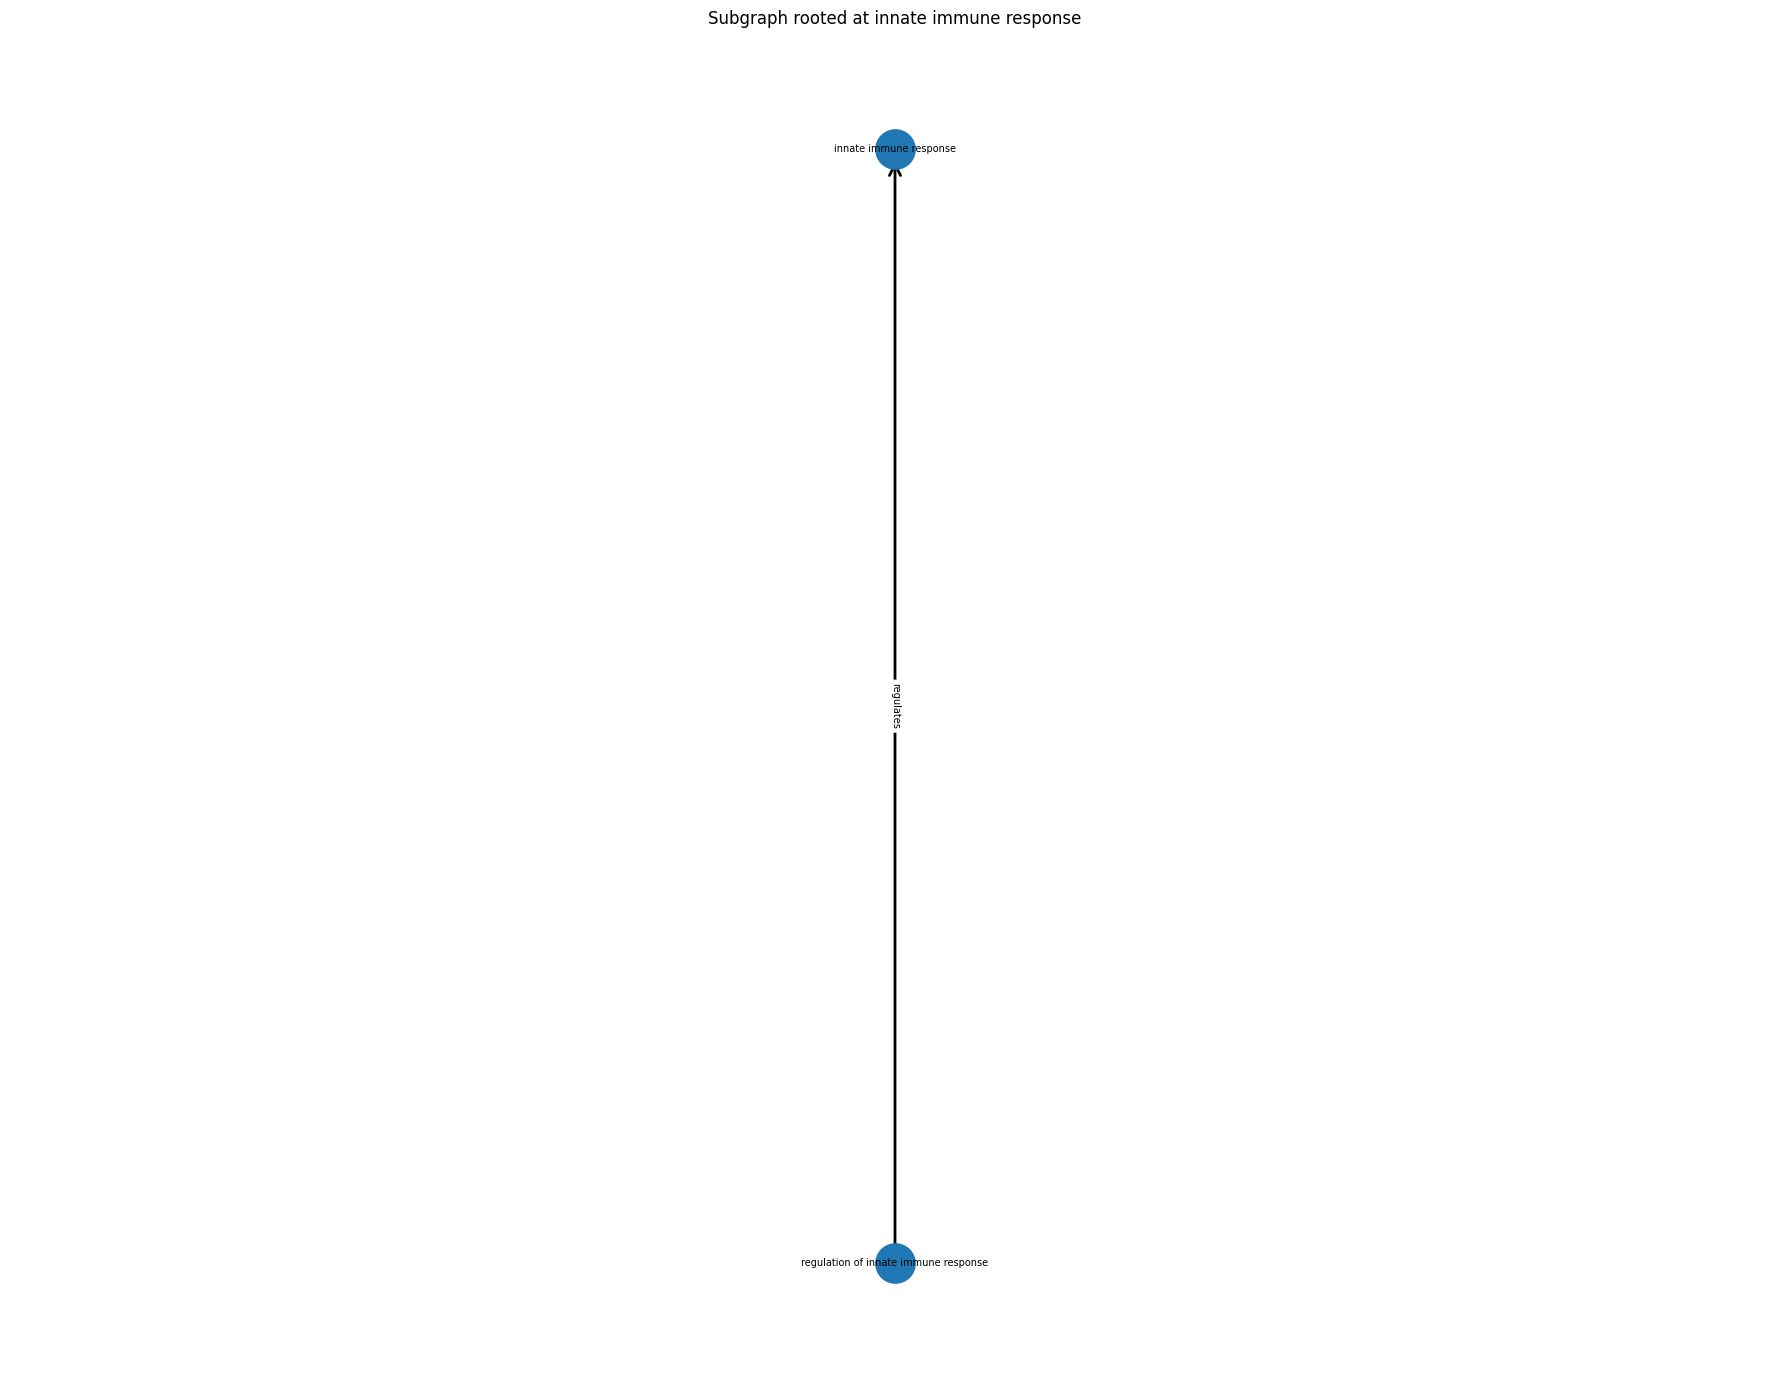

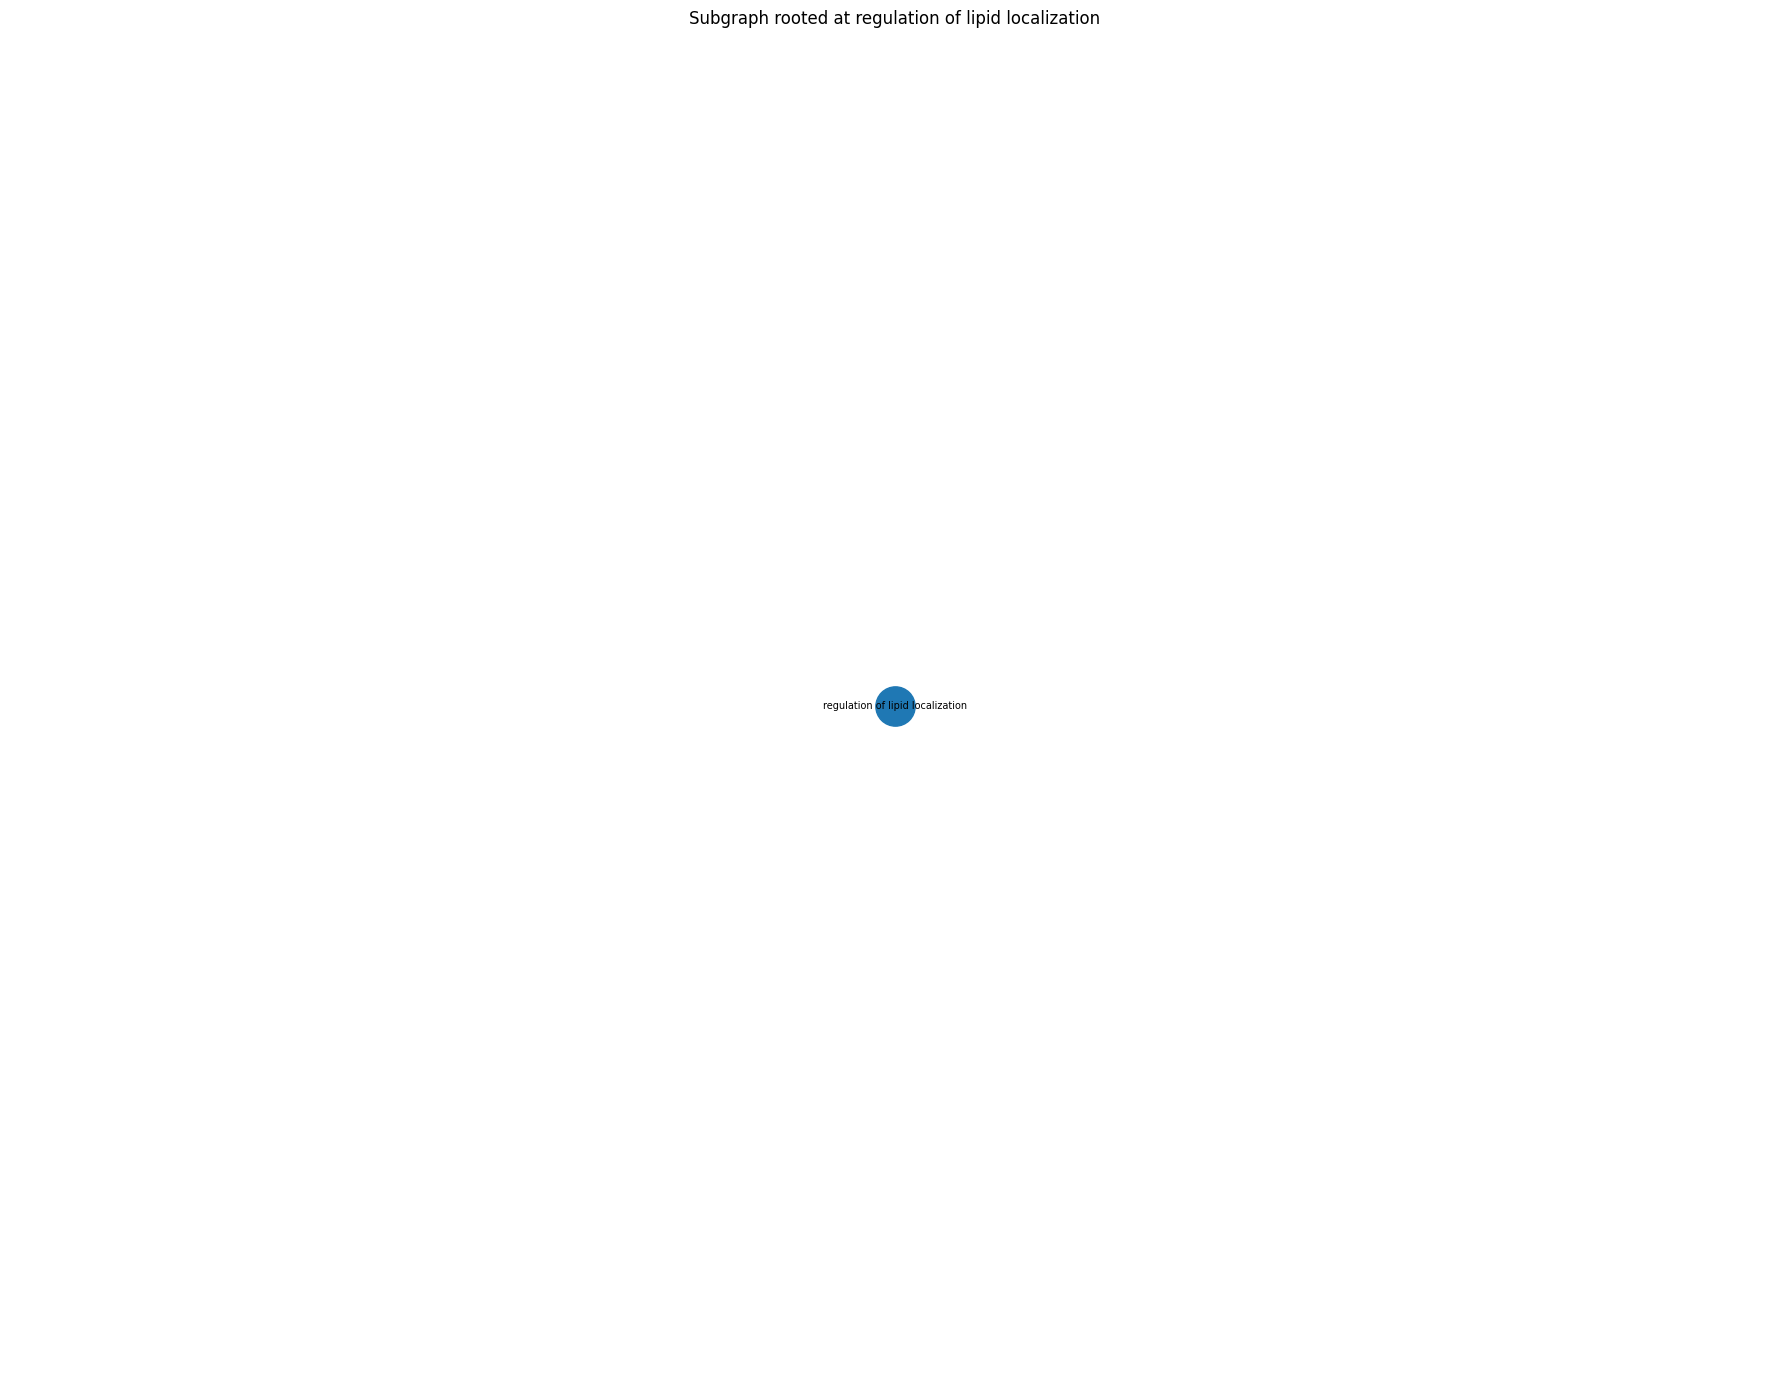

1: ColorModel({'Infliximab_drug': 'true'})


In [13]:
visualize_subgraphs_on_each_instance(psbn)

## Roots and leafs

In [14]:
print_roots_and_leafs_on_whole_net(psbn)

0 leafs: []
0 roots: []


In [15]:
print_roots_and_leafs_per_instance(psbn)

ColorModel({'Infliximab_drug': 'false'})
54 leafs: [+regulation of establishment of endothelial barrier, +positive regulation of canonical NF-kappaB signal transduction, +extrinsic apoptotic signaling pathway via death domain receptors, +regulation of tumor necrosis factor-mediated signaling pathway, +cellular response to mechanical stimulus, +negative regulation of bicellular tight junction assembly, +negative regulation of canonical NF-kappaB signal transduction, +cellular response to nicotine, +toll-like receptor 3 signaling pathway, +positive regulation of execution phase of apoptosis, +protein localization to plasma membrane, +positive regulation of macrophage derived foam cell differentiation, +regulation of membrane lipid metabolic process, +positive regulation of amide metabolic process, +negative regulation of cytokine production involved in inflammatory response, +gene expression, +defense response to bacterium, +response to lipopolysaccharide, +regulation of lipid storage, +

## Unmapped ids

In [16]:
psbn.print_unmapped_ids_per_instance_per_attractor()

0: ColorModel({'Infliximab_drug': 'false'})
Apoptosis [0]
1: ColorModel({'Infliximab_drug': 'true'})
Infliximab_drug,Survival [0]


In [17]:
psbn.unmapped_ids_intersection_on_all_instances()

set()

In [18]:
print(f"Total numbers of attractors: {psbn.count_attractors()}")
psbn.count_unmapped_ids_frequencies_on_all_instances()

Total numbers of attractors: 2


{'Apoptosis': 1, 'Infliximab_drug': 1, 'Survival': 1}

In [19]:
for instance in psbn.instances:
  print(f"{instance.unmapped_ids_intersection()}")

{'Apoptosis'}
{'Infliximab_drug', 'Survival'}


In [20]:
for instance in psbn.instances:
  print(f"{instance.color}:\nNumber of attractors: {len(instance.attractors)}\n{instance.count_unmapped_ids_frequencies()}\n")

ColorModel({'Infliximab_drug': 'false'}):
Number of attractors: 1
{'Apoptosis': 1}

ColorModel({'Infliximab_drug': 'true'}):
Number of attractors: 1
{'Infliximab_drug': 1, 'Survival': 1}



## Fixed points

In [21]:
print_fixed_points_on_new_stg(network)

Total colors: 2
------
Total colored fixed points: 2
Total fixed point states: 2
Total fixed point colors: 2
------
Raw fixed point vertices projection (across all colors):
VertexModel({'Apoptosis': 0, 'CASP8': 0, 'IKBKB': 0, 'Infliximab_drug': 1, 'NFKB1': 0, 'NFKBIA': 1, 'Survival': 1, 'TNF': 0, 'TNFRSF1A': 0})
VertexModel({'Apoptosis': 1, 'CASP8': 1, 'IKBKB': 1, 'Infliximab_drug': 0, 'NFKB1': 1, 'NFKBIA': 0, 'Survival': 0, 'TNF': 1, 'TNFRSF1A': 1})
------
Fixed point combinations per model color:
1 ['111010011']
	-> ColorModel({'Infliximab_drug': 'false'})
2 ['000101100']
	-> ColorModel({'Infliximab_drug': 'true'})
------
Unique fixed point combinations:
['111010011']
['000101100']
